In [2]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split, cross_val_score
import lime
import lime.lime_tabular
import numpy as np
colors = ["#9DAFB0", "#75E6DA", '#189AB4', '#05445E', '#4D707E', '#56B66B']
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import IPython
from IPython.display import display, HTML

from IPython.display import Audio, display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')



from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from pycalib.metrics import brier_score, ECE, MCE, cross_entropy, accuracy
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from pycalib.metrics import brier_score, ECE, MCE, cross_entropy, accuracy
from sklearn.linear_model import SGDClassifier

In [4]:
# 读取数据集
data = pd.read_csv('bank-full.csv', quotechar='"', header=None)
#把列分开
data = data[0].str.split(';', expand=True)
#把引号删除
data = data.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
# 设置第一行为列名
data.columns = data.iloc[0]
# 删除现在的第一行
data = data.drop(0)


In [5]:
import IPython
from IPython.display import display, HTML

def play_sound(url):
    display(HTML(f'<audio src="{url}" autoplay="true"></audio>'))

# 当代码执行结束后播放音效
def play_sound_on_execution_end():
    play_sound("https://www.soundjay.com/misc/bell-ringing-05.mp3")

# 在异常发生时播放音效
def exception_hook(shell, etype, evalue, tb, tb_offset=None):
    play_sound("https://www.soundjay.com/misc/fail-buzzer-03.mp3")
    shell.showtraceback((etype, evalue, tb), tb_offset=tb_offset)

get_ipython().set_custom_exc((Exception,), exception_hook)
get_ipython().events.register('post_execute', play_sound_on_execution_end)

In [7]:
# 去除所有包含 'unknown' 的行
data = data[~(data == 'unknown').any(axis=1)]

In [14]:
# 保存新的 CSV 文件
data.to_csv("bank_ew.csv", index=False)

In [6]:
data

0     age           job   marital  education default balance housing loan  \
1      58    management   married   tertiary      no    2143     yes   no   
2      44    technician    single  secondary      no      29     yes   no   
3      33  entrepreneur   married  secondary      no       2     yes  yes   
4      47   blue-collar   married    unknown      no    1506     yes   no   
5      33       unknown    single    unknown      no       1      no   no   
...    ..           ...       ...        ...     ...     ...     ...  ...   
45207  51    technician   married   tertiary      no     825      no   no   
45208  71       retired  divorced    primary      no    1729      no   no   
45209  72       retired   married  secondary      no    5715      no   no   
45210  57   blue-collar   married  secondary      no     668      no   no   
45211  37  entrepreneur   married  secondary      no    2971      no   no   

0        contact day month duration campaign pdays previous poutcome    y  
1        unknown   5   may      261        1    -1        0  unknown   no  
2        unknown   5   may      151        1    -1        0  unknown   no  
3        unknown   5   may       76        1    -1        0  unknown   no  
4        unknown   5   may       92        1    -1        0  unknown   no  
5        unknown   5   may      198        1    -1        0  unknown   no  
...          ...  ..   ...      ...      ...   ...      ...      ...  ...  
45207   cellular  17   nov      977        3    -1        0  unknown  yes  
45208   cellular  17   nov      456        2    -1        0  unknown  yes  
45209   cellular  17   nov     1127        5   184        3  success  yes  
45210  telephone  17   nov      508        4    -1        0  unknown   no  
45211   cellular  17   nov      361        2   188       11    other   no  

[45211 rows x 17 columns]

In [7]:
data.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
data['y'] = data['y'].map({'yes': 1, 'no': 0})


# 处理非数值类型的特征
label_encoder = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    data[col] = label_encoder.fit_transform(data[col])

data['age'] = pd.to_numeric(data['age'])
data['balance'] = pd.to_numeric(data['balance'])
data['day'] = pd.to_numeric(data['day'])
data['duration'] = pd.to_numeric(data['duration'])
data['campaign'] = pd.to_numeric(data['campaign'])
data['pdays'] = pd.to_numeric(data['pdays'])
data['previous'] = pd.to_numeric(data['previous'])


X = data.drop("y", axis=1)
y = data["y"] 

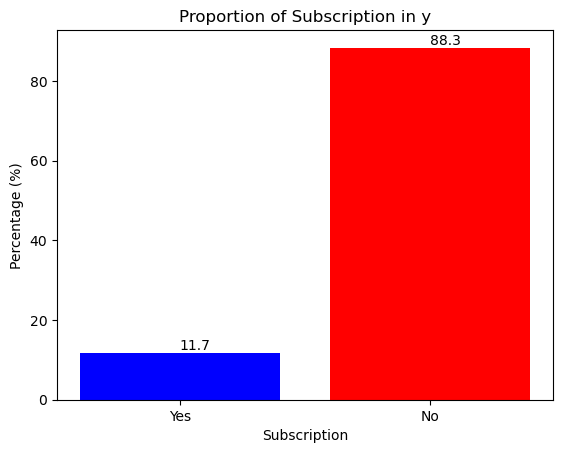

In [8]:
# 计算y中1和0的数量
count_y = y.value_counts()

# 计算1和0占总体的比例
total_y = len(y)
ratio_yes = (count_y[1] / total_y) * 100
ratio_no = (count_y[0] / total_y) * 100

# 数据准备
labels = ['Yes', 'No']
values = [ratio_yes, ratio_no]

# 绘制柱状图
fig, ax = plt.subplots()
bars = plt.bar(labels, values, color=['blue', 'red'])

# 在柱子上显示准确的数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# 设置标题和标签
plt.ylabel('Percentage (%)')
plt.xlabel('Subscription')
plt.title('Proportion of Subscription in y')

# 显示图
plt.show()


In [9]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

In [21]:
# 设置QDA模型
qda = QuadraticDiscriminantAnalysis()

# 设置要进行网格搜索的参数。这里仅为示例，具体参数需要你自己设定。
param_grid = {
    'reg_param': np.linspace(0.0, 1.0, 10),  # 正则化参数
    'tol': [1e-3, 1e-4, 1e-5]  # 公差（收敛阈值）
}

# 进行网格搜索
grid_search = GridSearchCV(qda, param_grid, cv=rskf)  # 5折交叉验证

# 在数据上训练网格搜索对象
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型的评分
print("Best score: ", grid_search.best_score_)

# 输出最优模型
best_model = grid_search.best_estimator_

Best parameters:  {'reg_param': 0.1111111111111111, 'tol': 0.001}
Best score:  0.8624228769149508


/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

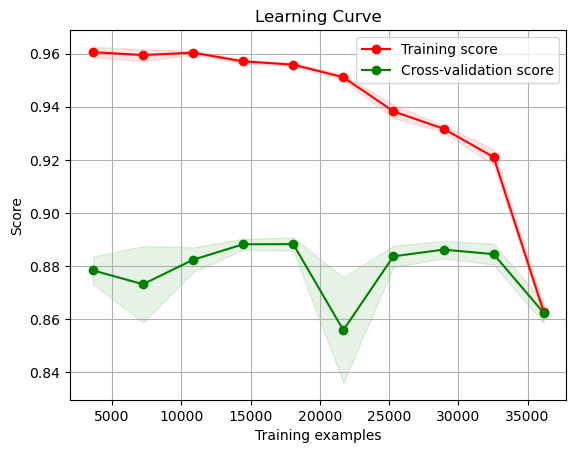

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

qda = QuadraticDiscriminantAnalysis(reg_param=0.1111111111111111, tol=0.001)

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    qda, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [23]:
# 设置LDA模型
lda = LinearDiscriminantAnalysis()

# 设置要进行网格搜索的参数
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # 求解器
    'shrinkage': [None, 'auto'],  # 收缩参数
    'priors': [None, [0.5, 0.5], [0.6, 0.4]]  # 先验概率
}

# 进行网格搜索
grid_search = GridSearchCV(lda, param_grid, cv=rskf,  n_jobs=-1)  # 5折交叉验证

# 在数据上训练网格搜索对象
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型的评分
print("Best score: ", grid_search.best_score_)

# 输出最优模型
best_model = grid_search.best_estimator_

Best parameters:  {'priors': None, 'shrinkage': None, 'solver': 'svd'}
Best score:  0.8917003663646427


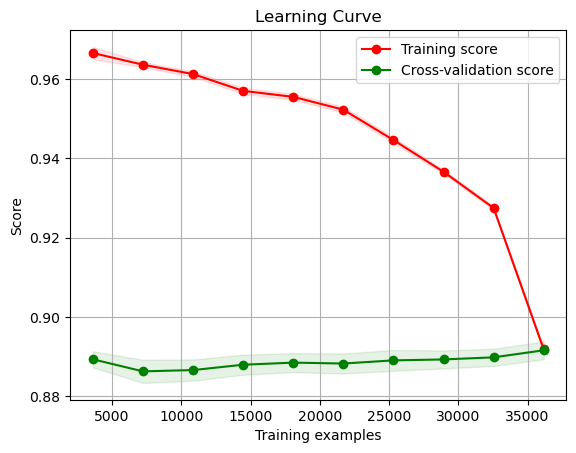

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

lda = LinearDiscriminantAnalysis(priors=None, shrinkage='auto', solver='lsqr')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    lda, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [28]:
# 创建逻辑回归模型实例
log_reg = LogisticRegression(max_iter=10000)

# 定义要搜索的参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(log_reg, param_grid, cv=rskf, n_jobs=-1)  # 使用5折交叉验证

# 在数据上执行网格搜索
grid_search.fit(X, y)

# 输出找到的最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型在交叉验证中的平均得分
print("Best score: ", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.8911400134670785
Best model:  LogisticRegression(C=0.01, max_iter=10000, solver='newton-cg')


/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Lin

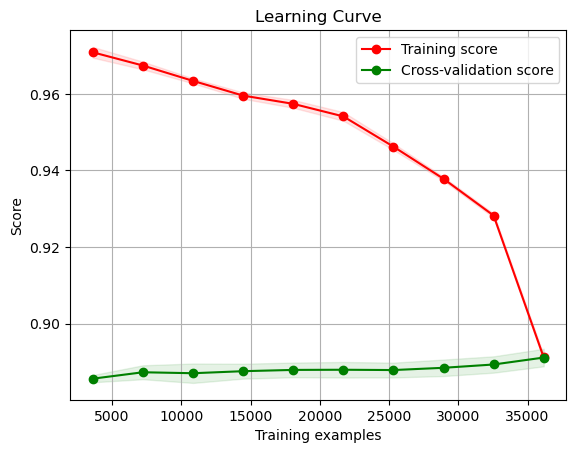

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

log_reg = LogisticRegression(max_iter=10000, C=0.01, penalty= 'l2' , solver='newton-cg')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [30]:
# 创建决策树模型实例
dt = DecisionTreeClassifier()

# 定义要搜索的参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# 创建GridSearchCV对象
grid_search = GridSearchCV(dt, param_grid, cv=rskf, n_jobs=-1)  # 使用5折交叉验证

# 在数据上执行网格搜索
grid_search.fit(X, y)

# 输出找到的最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型在交叉验证中的平均得分
print("Best score: ", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}
Best score:  0.8999506058729995
Best model:  DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=5)


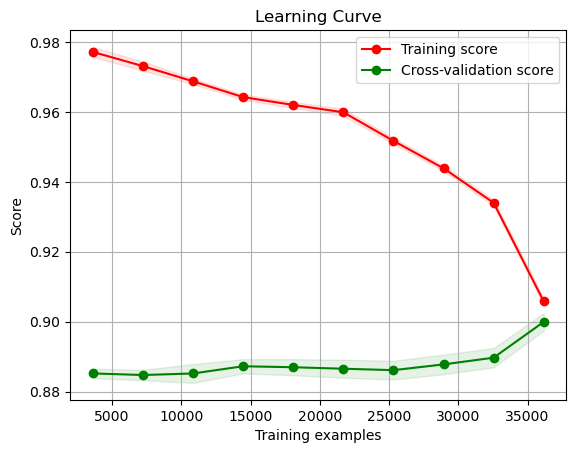

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10, min_samples_split=5, splitter='best')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    dt, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [34]:
# 定义超参数网格
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 4, 5],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 6, 8]
}

# 创建随机森林分类器实例
rf = RandomForestClassifier()

# 创建网格搜索实例
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=rskf, n_jobs=-1, verbose=1)

# 进行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)

# 输出最优模型的评分
print("Best score:", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Fitting 15 folds for each of 81 candidates, totalling 1215 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 10}
Best score: 0.8947822494130443
Best model:  RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=10)


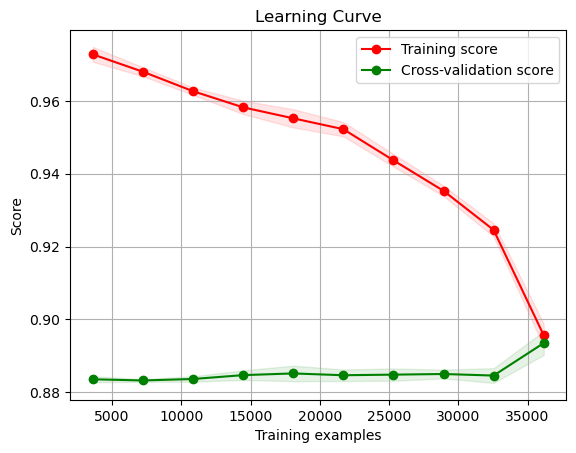

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10)

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [31]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# 创建K-NN分类器实例
knn = KNeighborsClassifier(algorithm='ball_tree')

# 定义超参数网格
param_grid = {
    'n_neighbors': [50, 70],
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['ball_tree']
}



# 创建网格搜索实例
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=rskf, n_jobs=-1, verbose=2)

# 执行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)

# 输出最优模型的评分
print("Best score:", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best parameters: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'}
Best score: 0.8879402284589666
Best model:  KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=50)


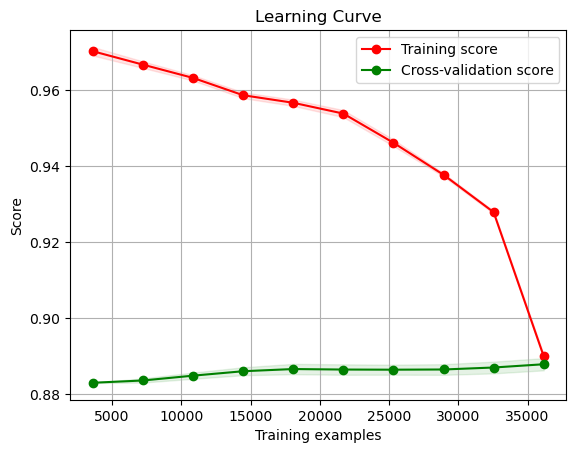

In [30]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, metric= 'manhattan', weights='uniform')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [38]:
# 定义超参数网格
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# 定义模型
gnb = GaussianNB()

# 创建 RepeatedStratifiedKFold 实例，可用作cv参数
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# 创建网格搜索实例
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=rskf, n_jobs=-1, verbose=2)

# 进行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)

# 输出最优模型的评分
print("Best score:", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Fitting 15 folds for each of 5 candidates, totalling 75 fits
Best parameters: {'var_smoothing': 1e-05}
Best score: 0.8811793268122355
Best model:  GaussianNB(var_smoothing=1e-05)


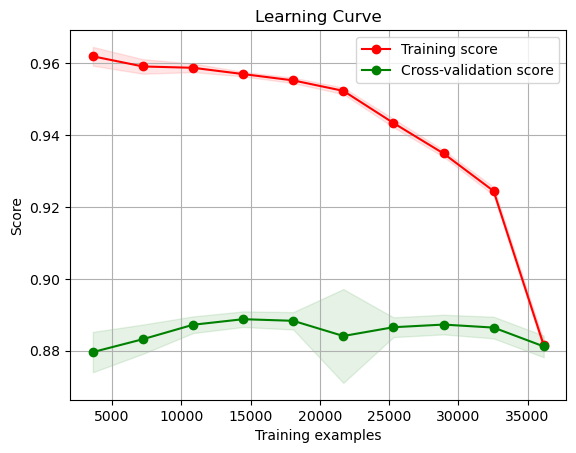

[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.4s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.7s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.4s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=30, weights=uniform; total time=   1.4s


[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.7s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.7s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   2.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.3s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.3s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.6s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.6s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   2.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=30, weights=uniform; total time=   1.5s


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels
gnb = GaussianNB(var_smoothing=1e-05)
# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    gnb, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [10]:
raw_base_learners_new = [
    ('Random Forest', RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, n_jobs=-1)),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10, min_samples_split=5, splitter='best')),
    ('Logistic Regression', LogisticRegression(max_iter=10000, C=0.01, penalty= 'l2' , solver='newton-cg', n_jobs=-1)),
    ('KNN', KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, metric= 'manhattan', weights='uniform')),
    ('Naive Bayes', GaussianNB(var_smoothing=1e-05)),
    ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis(reg_param=0.1111111111111111, tol=0.001)),
    ('LinearDiscriminant', LinearDiscriminantAnalysis(priors=None, shrinkage='auto', solver='lsqr'))
]



# Names for the learners
learner_names = ['rf', 'dt', 'lr', 'knn', 'nb', 'qda', 'lda']

# Calibrate each of the base learners
calibrated_learners = [(name, CalibratedClassifierCV(learner, method='isotonic', cv=5)) 
                       for name, learner in raw_base_learners_new]


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

In [11]:
def convert_to_indicator(y):
    """Converts a binary vector to an indicator matrix."""
    n = len(y)
    indicator = np.zeros((n, 2))
    indicator[np.arange(n), y] = 1
    return indicator

In [12]:
base_qda = QuadraticDiscriminantAnalysis(reg_param=0.1111111111111111, tol=0.001)
calibrated_final_estimator_qda = CalibratedClassifierCV(base_qda, method='isotonic', cv=5)

probas_qda_dict = {
    "_qda": [],
    "cal_qda": [],
    "stack_qda_0": [],
    "stack_qda_1": [],
    "stack_qda_2": [],
    "stack_qda_3": []
}

true_qda_labels = []

stack0_qda_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_qda, n_jobs=-1)
stack1_qda_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_qda, n_jobs=-1)
stack2_qda_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_qda, n_jobs=-1)
stack3_qda_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_qda, n_jobs=-1)



results_qda = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # Train the qda
    base_qda.fit(X_train, y_train)
    probas_base_qda_test = base_qda.predict_proba(X_test)
    probas_qda_dict["_qda"].append(probas_base_qda_test)  # Store the predicted probabilities
    
    # Train the cal_qda
    calibrated_final_estimator_qda.fit(X_train, y_train)
    probas_cal_qda_test = calibrated_final_estimator_qda.predict_proba(X_test)
    probas_qda_dict["cal_qda"].append(probas_cal_qda_test)  # Store the predicted probabilities    
    
    # Train the stack0
    stack0_qda_uncalibrated.fit(X_train, y_train)
    probas_qda_test_stack0 = stack0_qda_uncalibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_0"].append(probas_qda_test_stack0)  # Store the predicted probabilities    
    
    
    # Train the stack1
    stack1_qda_partially_calibrated.fit(X_train, y_train)
    probas_qda_test_stack1 = stack1_qda_partially_calibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_1"].append(probas_qda_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_qda_partially_calibrated.fit(X_train, y_train)
    probas_qda_test_stack2 = stack2_qda_partially_calibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_2"].append(probas_qda_test_stack2)  # Store the predicted probabilities
    
    
    # Train the stack3
    stack3_qda_fully_calibrated.fit(X_train, y_train)
    probas_qda_test_stack3 = stack3_qda_fully_calibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_3"].append(probas_qda_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_qda_labels.extend(y_test.tolist())
    
    
    # Calculate evaluation metrics for qda
    
    acc_cal_qda = accuracy_score(y_test, np.argmax(probas_base_qda_test, axis=1))
    brier_cal_qda = brier_score(y_true_indicator, probas_base_qda_test)
    ece_cal_qda = ECE(y_true=y_true_indicator, probs=probas_base_qda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda = MCE(y_true=y_test.values.tolist(), probs=probas_base_qda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda = cross_entropy(y_true_indicator, probas_base_qda_test)
    roc_auc_cal_qda = roc_auc_score(y_test, probas_base_qda_test[:, 1])    
    
    # Calculate evaluation metrics for cal_qda
    
    acc_cal_cal_qda = accuracy_score(y_test, np.argmax(probas_cal_qda_test, axis=1))
    brier_cal_cal_qda = brier_score(y_true_indicator, probas_cal_qda_test)
    ece_cal_cal_qda = ECE(y_true=y_true_indicator, probs=probas_cal_qda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_qda = MCE(y_true=y_test.values.tolist(), probs=probas_cal_qda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_qda = cross_entropy(y_true_indicator, probas_cal_qda_test)
    roc_auc_cal_cal_qda = roc_auc_score(y_test, probas_cal_qda_test[:, 1])      
    
    
    

    # Calculate evaluation metrics for stack0
    acc_cal_qda_stack0 = accuracy_score(y_test, np.argmax(probas_qda_test_stack0, axis=1))
    brier_cal_qda_stack0 = brier_score(y_true_indicator, probas_qda_test_stack0)
    ece_cal_qda_stack0 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack0 = cross_entropy(y_true_indicator, probas_qda_test_stack0)
    roc_auc_cal_qda_stack0 = roc_auc_score(y_test, probas_qda_test_stack1[:, 1])    
    
        
    # Calculate evaluation metrics for stack1
    acc_cal_qda_stack1 = accuracy_score(y_test, np.argmax(probas_qda_test_stack1, axis=1))
    brier_cal_qda_stack1 = brier_score(y_true_indicator, probas_qda_test_stack1)
    ece_cal_qda_stack1 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack1 = cross_entropy(y_true_indicator, probas_qda_test_stack1)
    roc_auc_cal_qda_stack1 = roc_auc_score(y_test, probas_qda_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_qda_stack2 = accuracy_score(y_test, np.argmax(probas_qda_test_stack2, axis=1))
    brier_cal_qda_stack2 = brier_score(y_true_indicator, probas_qda_test_stack2)
    ece_cal_qda_stack2 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack2 = cross_entropy(y_true_indicator, probas_qda_test_stack2)
    roc_auc_cal_qda_stack2 = roc_auc_score(y_test, probas_qda_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_qda_stack3 = accuracy_score(y_test, np.argmax(probas_qda_test_stack3, axis=1))
    brier_cal_qda_stack3 = brier_score(y_true_indicator, probas_qda_test_stack3)
    ece_cal_qda_stack3 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack3 = cross_entropy(y_true_indicator, probas_qda_test_stack3)
    roc_auc_cal_qda_stack3 = roc_auc_score(y_test, probas_qda_test_stack3[:, 1])

    results_qda.append({    
        'Brier Score (base_qda)': brier_cal_qda,
        'ECE (base_qda)': ece_cal_qda,
        'MCE (base_qda)': mce_cal_qda,
        'Cross-Entropy (base_qda)': ce_cal_qda,
        'Accuracy (base_qda)': acc_cal_qda,
        'ROC AUC (base_qda)': roc_auc_cal_qda,
        
        'Brier Score (cal_qda)': brier_cal_cal_qda,
        'ECE (cal_qda)': ece_cal_cal_qda,
        'MCE (cal_qda)': mce_cal_cal_qda,
        'Cross-Entropy (cal_qda)': ce_cal_cal_qda,
        'Accuracy (cal_qda)': acc_cal_cal_qda,
        'ROC AUC (cal_qda)': roc_auc_cal_cal_qda,
        
        
        'Brier Score (stack0_qda_partially_calibrated)': brier_cal_qda_stack0,
        'ECE (stack0_qda_partially_calibrated)': ece_cal_qda_stack0,
        'MCE (stack0_qda_partially_calibrated)': mce_cal_qda_stack0,
        'Cross-Entropy (stack0_qda_partially_calibrated)': ce_cal_qda_stack0,
        'Accuracy (stack0_qda_partially_calibrated)': acc_cal_qda_stack0,
        'ROC AUC (stack0_qda_partially_calibrated)': roc_auc_cal_qda_stack0,
        
        
        'Brier Score (stack1_qda_partially_calibrated)': brier_cal_qda_stack1,
        'ECE (stack1_qda_partially_calibrated)': ece_cal_qda_stack1,
        'MCE (stack1_qda_partially_calibrated)': mce_cal_qda_stack1,
        'Cross-Entropy (stack1_qda_partially_calibrated)': ce_cal_qda_stack1,
        'Accuracy (stack1_qda_partially_calibrated)': acc_cal_qda_stack1,
        'ROC AUC (stack1_qda_partially_calibrated)': roc_auc_cal_qda_stack1,

        'Brier Score (stack2_qda_partially_calibrated)': brier_cal_qda_stack2,
        'ECE (stack2_qda_partially_calibrated)': ece_cal_qda_stack2,
        'MCE (stack2_qda_partially_calibrated)': mce_cal_qda_stack2,
        'Cross-Entropy (stack2_qda_partially_calibrated)': ce_cal_qda_stack2,
        'Accuracy (stack2_qda_partially_calibrated)': acc_cal_qda_stack2,
        'ROC AUC (stack2_qda_partially_calibrated)': roc_auc_cal_qda_stack2,

        'Brier Score (stack3_qda_fully_calibrated)': brier_cal_qda_stack3,
        'ECE (stack3_qda_fully_calibrated)': ece_cal_qda_stack3,
        'MCE (stack3_qda_fully_calibrated)': mce_cal_qda_stack3,
        'Cross-Entropy (stack3_qda_fully_calibrated)': ce_cal_qda_stack3,
        'Accuracy (stack3_qda_fully_calibrated)': acc_cal_qda_stack3,
        'ROC AUC (stack3_qda_fully_calibrated)': roc_auc_cal_qda_stack3,
    })

# Display results
results_qda_df = pd.DataFrame(results_qda)
print("Results for each fold:")
print(results_qda_df)

# Calculate and display the average
avg_results_qda = results_qda_df.mean()
print("\nAverage results:")
print(avg_results_qda)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_qda)  ECE (base_qda)  MCE (base_qda)  \
0                 0.113098        0.241162        0.141987   
1                 0.107848        0.236031        0.134915   
2                 0.103537        0.236140        0.089966   
3                 0.105108        0.233163        0.138864   
4                 0.106409        0.233743        0.124122   
5                 0.108806        0.236810        0.159570   
6                 0.109634        0.236002        0.151727   
7                 0.111597        0.241458        0.151826   
8                 0.106135        0.235515        0.093402   
9                 0.101256        0.236421        0.099796   
10                0.102590        0.236686        0.119804   
11                0.101774        0.234075        0.114558   
12                0.117256        0.240435        0.137632   
13                0.108084        0.237040        0.134182   
14                0.108936        0.236229     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


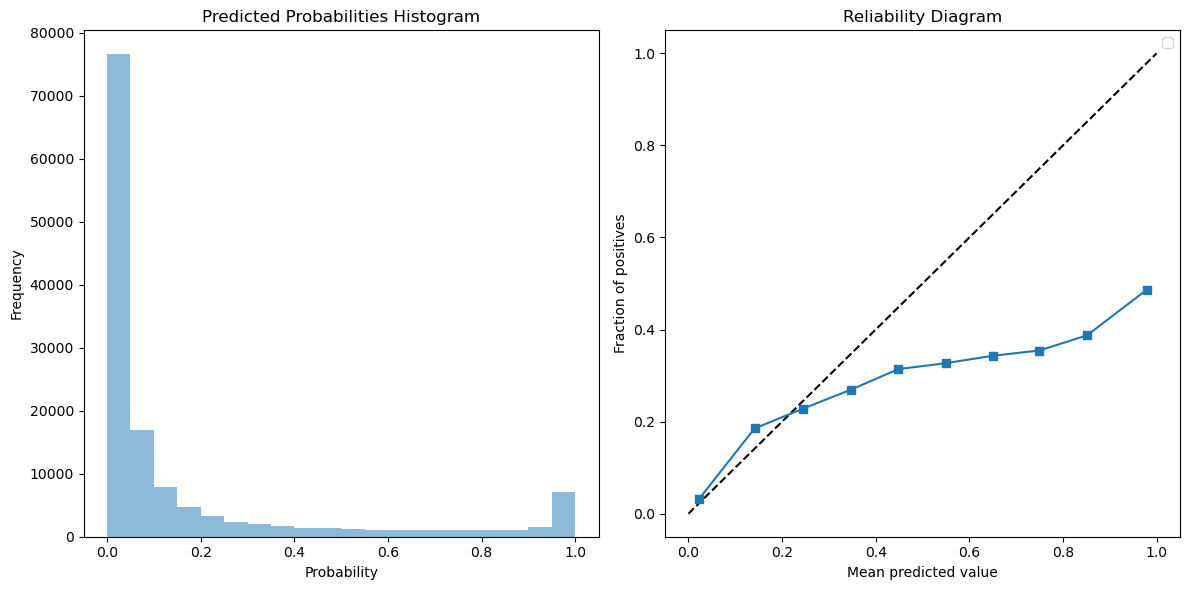

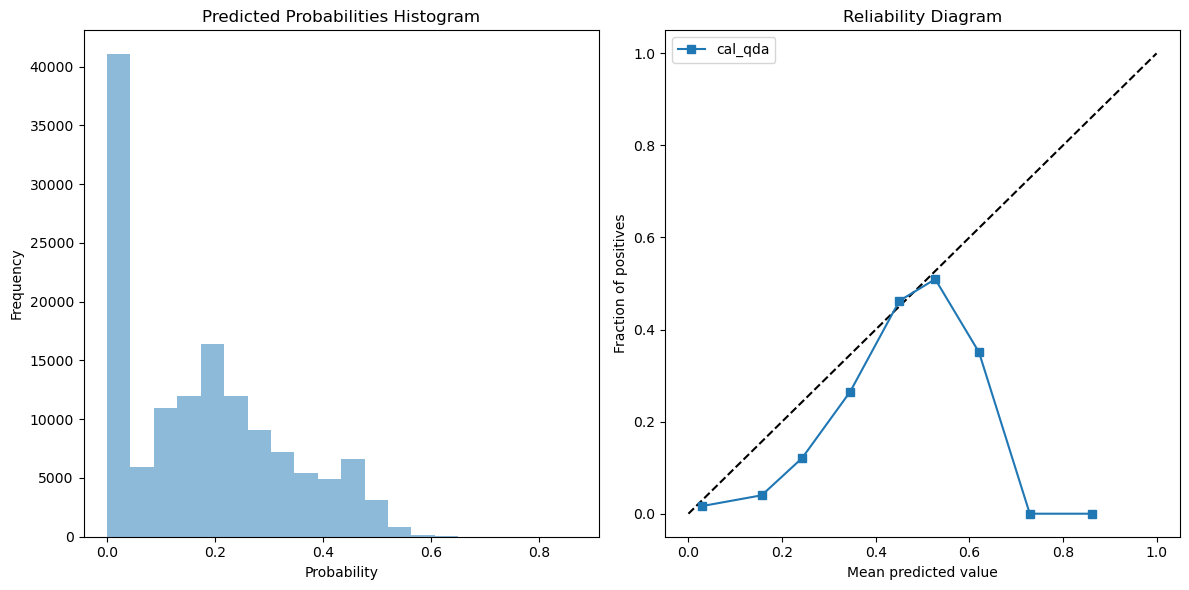

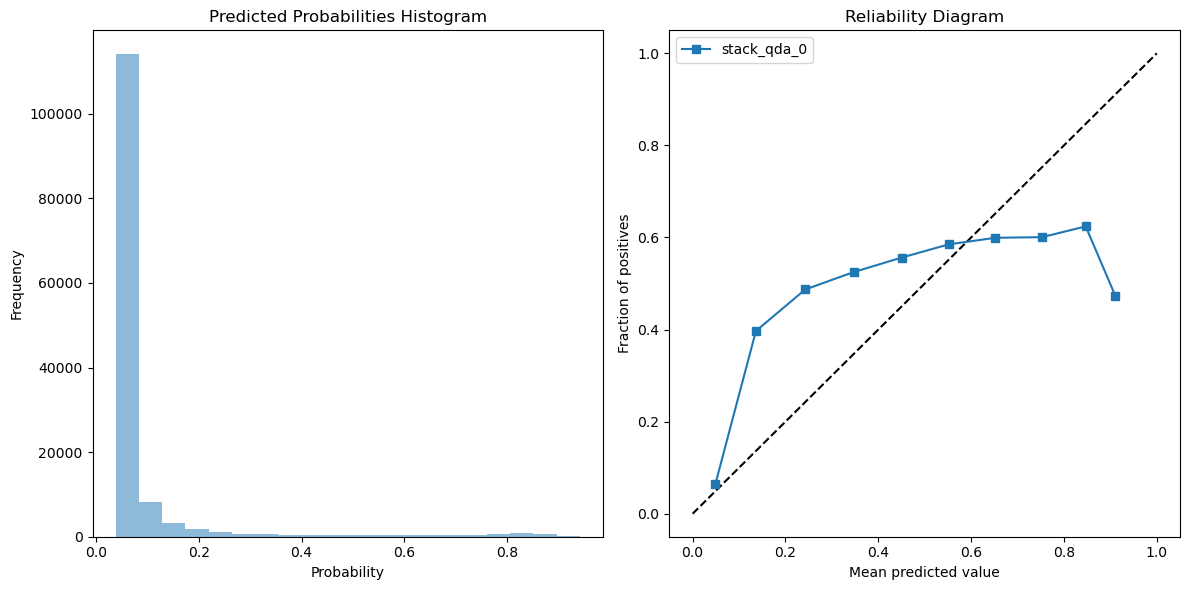

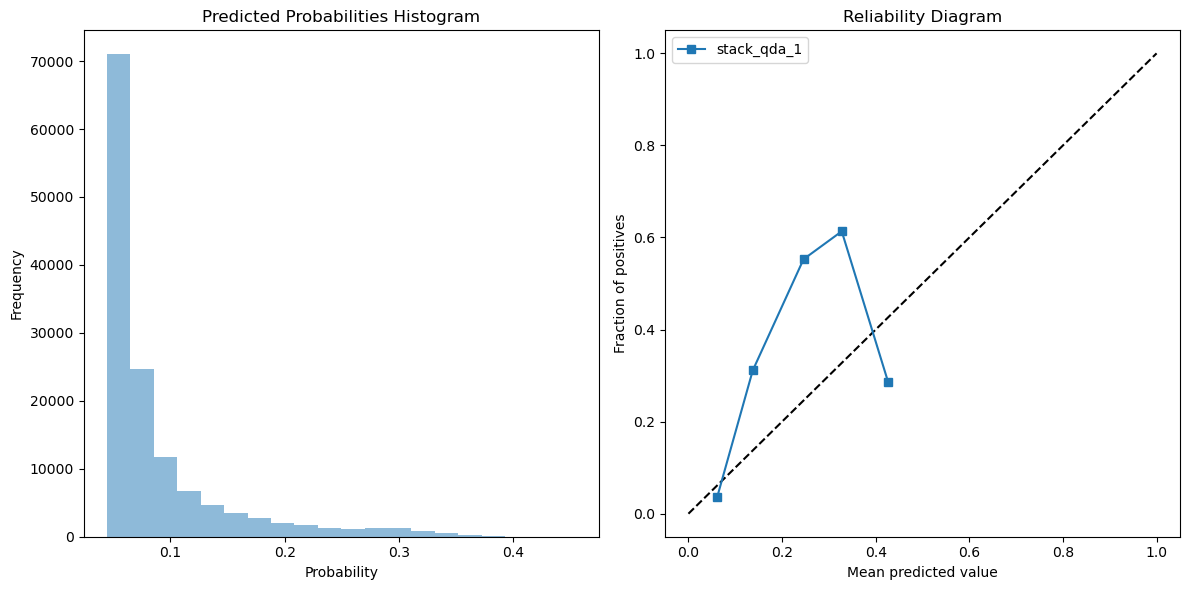

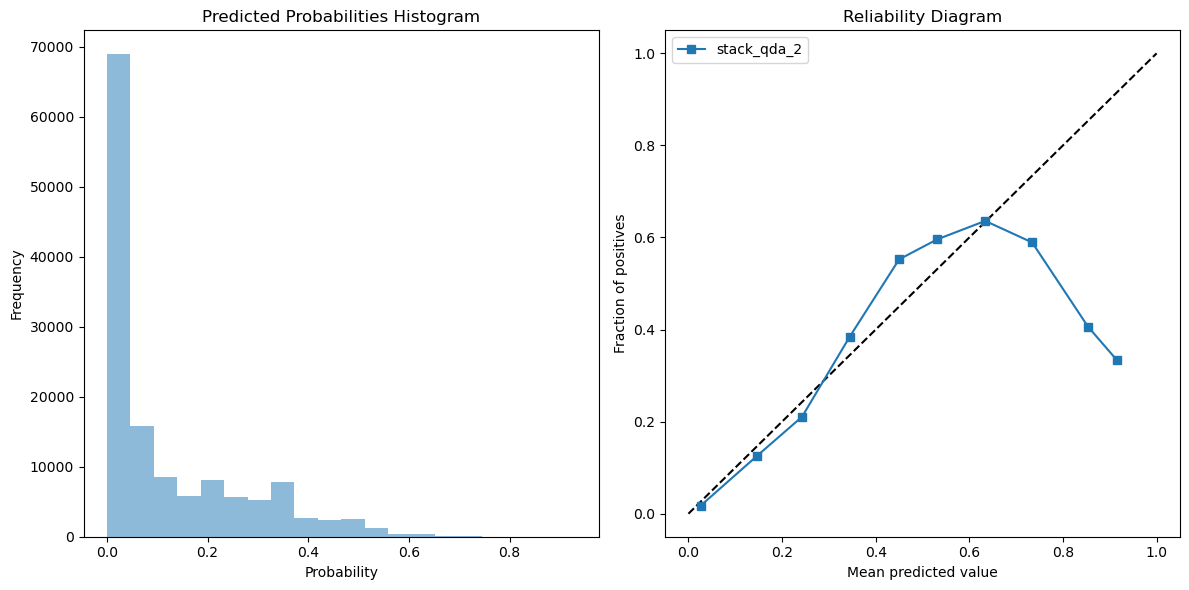

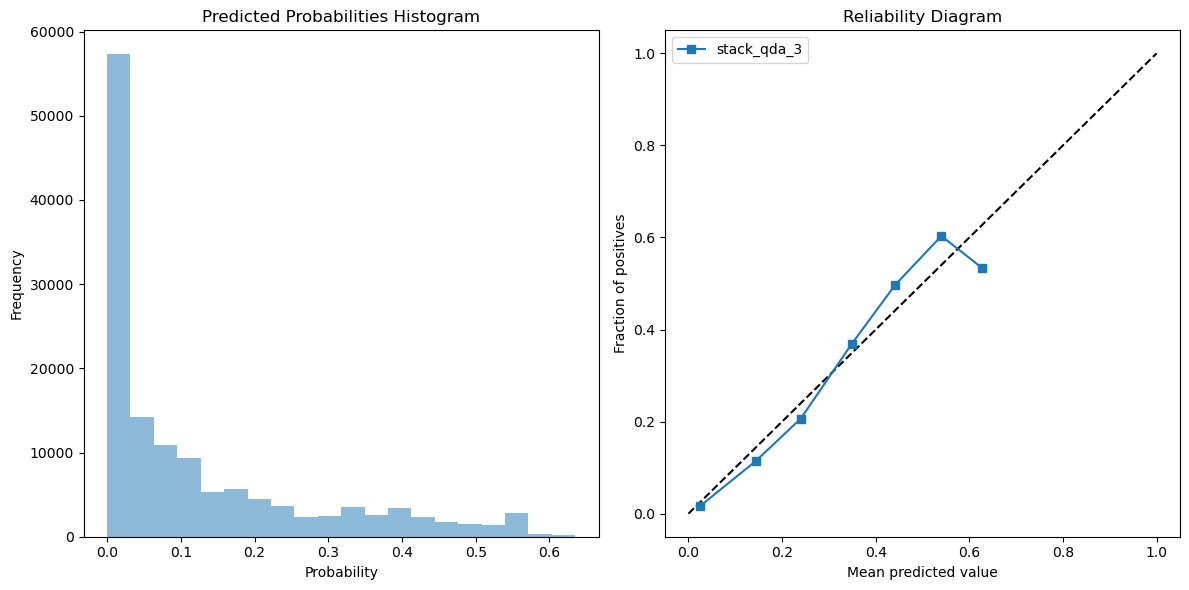

In [39]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_qda_dict.keys():
    all_probas = np.concatenate(probas_qda_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_qda_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [14]:
base_lda = LinearDiscriminantAnalysis(priors=None, shrinkage='auto', solver='lsqr')
calibrated_final_estimator_lda = CalibratedClassifierCV(base_lda, method='isotonic', cv=5)


probas_lda_dict = {
    "_lda": [],
    "cal_lda": [],
    "stack_lda_0": [],
    "stack_lda_1": [],
    "stack_lda_2": [],
    "stack_lda_3": []
}

true_lda_labels = []

stack0_lda_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_lda, n_jobs=-1)
stack1_lda_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_lda, n_jobs=-1)
stack2_lda_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_lda, n_jobs=-1)
stack3_lda_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_lda, n_jobs=-1)



results_lda = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the lda
    base_lda.fit(X_train, y_train)
    probas_base_lda_test = base_lda.predict_proba(X_test)
    probas_lda_dict["_lda"].append(probas_base_lda_test)  # Store the predicted probabilities
    
    # Train the cal_lda
    calibrated_final_estimator_lda.fit(X_train, y_train)
    probas_cal_lda_test = calibrated_final_estimator_lda.predict_proba(X_test)
    probas_lda_dict["cal_lda"].append(probas_cal_lda_test)  # Store the predicted probabilities  
    
    # Train the stack0
    stack0_lda_uncalibrated.fit(X_train, y_train)
    probas_lda_test_stack0 = stack0_lda_uncalibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_0"].append(probas_lda_test_stack0)  # Store the predicted probabilities

    # Train the stack1
    stack1_lda_partially_calibrated.fit(X_train, y_train)
    probas_lda_test_stack1 = stack1_lda_partially_calibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_1"].append(probas_lda_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_lda_partially_calibrated.fit(X_train, y_train)
    probas_lda_test_stack2 = stack2_lda_partially_calibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_2"].append(probas_lda_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_lda_fully_calibrated.fit(X_train, y_train)
    probas_lda_test_stack3 = stack3_lda_fully_calibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_3"].append(probas_lda_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_lda_labels.extend(y_test.tolist())

    # Calculate evaluation metrics for lda
    acc_cal_lda = accuracy_score(y_test, np.argmax(probas_base_lda_test, axis=1))
    brier_cal_lda = brier_score(y_true_indicator, probas_base_lda_test)
    ece_cal_lda = ECE(y_true=y_true_indicator, probs=probas_base_lda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda = MCE(y_true=y_test.values.tolist(), probs=probas_base_lda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda = cross_entropy(y_true_indicator, probas_base_lda_test)
    roc_auc_cal_lda = roc_auc_score(y_test, probas_base_lda_test[:, 1])    

        # Calculate evaluation metrics for cal_lda
    
    acc_cal_cal_lda = accuracy_score(y_test, np.argmax(probas_cal_lda_test, axis=1))
    brier_cal_cal_lda = brier_score(y_true_indicator, probas_cal_lda_test)
    ece_cal_cal_lda = ECE(y_true=y_true_indicator, probs=probas_cal_lda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_lda = MCE(y_true=y_test.values.tolist(), probs=probas_cal_lda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_lda = cross_entropy(y_true_indicator, probas_cal_lda_test)
    roc_auc_cal_cal_lda = roc_auc_score(y_test, probas_cal_lda_test[:, 1])    
    
    # Calculate evaluation metrics for stack0
    acc_cal_lda_stack0 = accuracy_score(y_test, np.argmax(probas_lda_test_stack0, axis=1))
    brier_cal_lda_stack0 = brier_score(y_true_indicator, probas_lda_test_stack0)
    ece_cal_lda_stack0 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack0 = cross_entropy(y_true_indicator, probas_lda_test_stack0)
    roc_auc_cal_lda_stack0 = roc_auc_score(y_test, probas_lda_test_stack0[:, 1])    

    
    # Calculate evaluation metrics for stack1
    acc_cal_lda_stack1 = accuracy_score(y_test, np.argmax(probas_lda_test_stack1, axis=1))
    brier_cal_lda_stack1 = brier_score(y_true_indicator, probas_lda_test_stack1)
    ece_cal_lda_stack1 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack1 = cross_entropy(y_true_indicator, probas_lda_test_stack1)
    roc_auc_cal_lda_stack1 = roc_auc_score(y_test, probas_lda_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_lda_stack2 = accuracy_score(y_test, np.argmax(probas_lda_test_stack2, axis=1))
    brier_cal_lda_stack2 = brier_score(y_true_indicator, probas_lda_test_stack2)
    ece_cal_lda_stack2 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack2 = cross_entropy(y_true_indicator, probas_lda_test_stack2)
    roc_auc_cal_lda_stack2 = roc_auc_score(y_test, probas_lda_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_lda_stack3 = accuracy_score(y_test, np.argmax(probas_lda_test_stack3, axis=1))
    brier_cal_lda_stack3 = brier_score(y_true_indicator, probas_lda_test_stack3)
    ece_cal_lda_stack3 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack3 = cross_entropy(y_true_indicator, probas_lda_test_stack3)
    roc_auc_cal_lda_stack3 = roc_auc_score(y_test, probas_lda_test_stack3[:, 1])

    results_lda.append({    
        'Brier Score (base_lda)': brier_cal_lda,
        'ECE (base_lda)': ece_cal_lda,
        'MCE (base_lda)': mce_cal_lda,
        'Cross-Entropy (base_lda)': ce_cal_lda,
        'Accuracy (base_lda)': acc_cal_lda,
        'ROC AUC (base_lda)': roc_auc_cal_lda,
        
        'Brier Score (cal_lda)': brier_cal_cal_lda,
        'ECE (cal_lda)': ece_cal_cal_lda,
        'MCE (cal_lda)': mce_cal_cal_lda,
        'Cross-Entropy (cal_lda)': ce_cal_cal_lda,
        'Accuracy (cal_lda)': acc_cal_cal_lda,
        'ROC AUC (cal_lda)': roc_auc_cal_cal_lda,        
        
        
        'Brier Score (stack0_lda_partially_calibrated)': brier_cal_lda_stack0,
        'ECE (stack0_lda_partially_calibrated)': ece_cal_lda_stack0,
        'MCE (stack0_lda_partially_calibrated)': mce_cal_lda_stack0,
        'Cross-Entropy (stack0_lda_partially_calibrated)': ce_cal_lda_stack0,
        'Accuracy (stack0_lda_partially_calibrated)': acc_cal_lda_stack0,
        'ROC AUC (stack0_lda_partially_calibrated)': roc_auc_cal_lda_stack0,
        
        
        'Brier Score (stack1_lda_partially_calibrated)': brier_cal_lda_stack1,
        'ECE (stack1_lda_partially_calibrated)': ece_cal_lda_stack1,
        'MCE (stack1_lda_partially_calibrated)': mce_cal_lda_stack1,
        'Cross-Entropy (stack1_lda_partially_calibrated)': ce_cal_lda_stack1,
        'Accuracy (stack1_lda_partially_calibrated)': acc_cal_lda_stack1,
        'ROC AUC (stack1_lda_partially_calibrated)': roc_auc_cal_lda_stack1,

        'Brier Score (stack2_lda_partially_calibrated)': brier_cal_lda_stack2,
        'ECE (stack2_lda_partially_calibrated)': ece_cal_lda_stack2,
        'MCE (stack2_lda_partially_calibrated)': mce_cal_lda_stack2,
        'Cross-Entropy (stack2_lda_partially_calibrated)': ce_cal_lda_stack2,
        'Accuracy (stack2_lda_partially_calibrated)': acc_cal_lda_stack2,
        'ROC AUC (stack2_lda_partially_calibrated)': roc_auc_cal_lda_stack2,

        'Brier Score (stack3_lda_fully_calibrated)': brier_cal_lda_stack3,
        'ECE (stack3_lda_fully_calibrated)': ece_cal_lda_stack3,
        'MCE (stack3_lda_fully_calibrated)': mce_cal_lda_stack3,
        'Cross-Entropy (stack3_lda_fully_calibrated)': ce_cal_lda_stack3,
        'Accuracy (stack3_lda_fully_calibrated)': acc_cal_lda_stack3,
        'ROC AUC (stack3_lda_fully_calibrated)': roc_auc_cal_lda_stack3,
    })

# Display results
results_lda_df = pd.DataFrame(results_lda)
print("Results for each fold:")
print(results_lda_df)

# Calculate and display the average
avg_results_lda = results_lda_df.mean()
print("\nAverage results:")
print(avg_results_lda)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_lda)  ECE (base_lda)  MCE (base_lda)  \
0                 0.080722        0.230999        0.123626   
1                 0.084031        0.228764        0.126957   
2                 0.082551        0.228265        0.122382   
3                 0.078406        0.227627        0.108056   
4                 0.086167        0.228206        0.144795   
5                 0.083104        0.229905        0.114054   
6                 0.084221        0.228174        0.175375   
7                 0.082692        0.232097        0.130475   
8                 0.081230        0.229015        0.120702   
9                 0.080412        0.229635        0.144427   
10                0.080498        0.228920        0.146420   
11                0.081703        0.227010        0.143297   
12                0.083944        0.230942        0.120783   
13                0.082380        0.229772        0.133511   
14                0.082562        0.228528     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


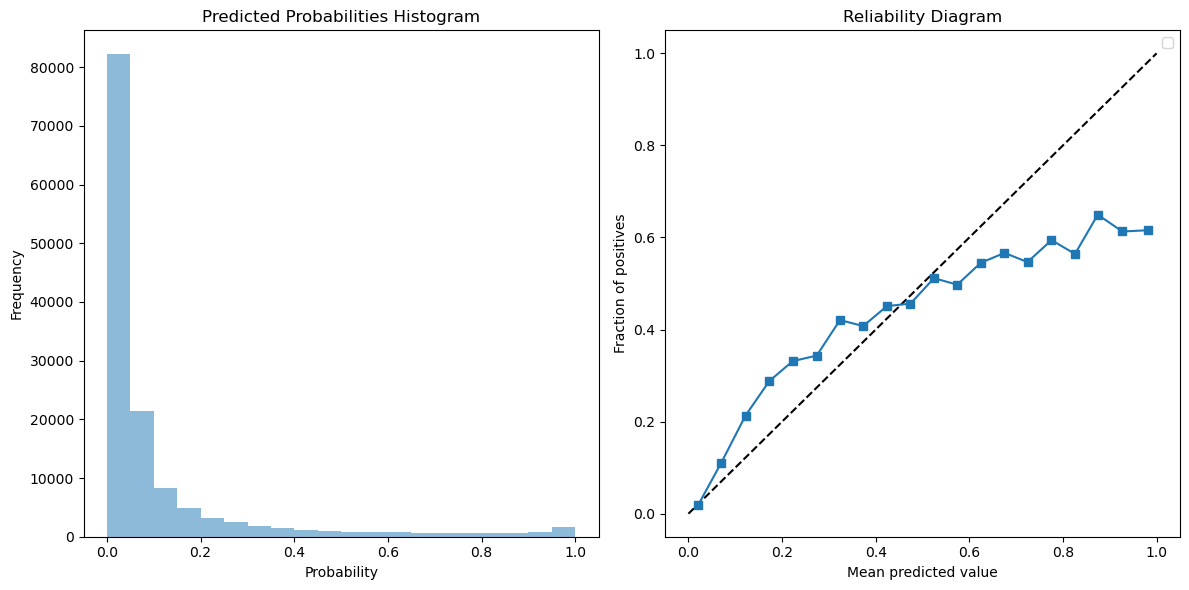

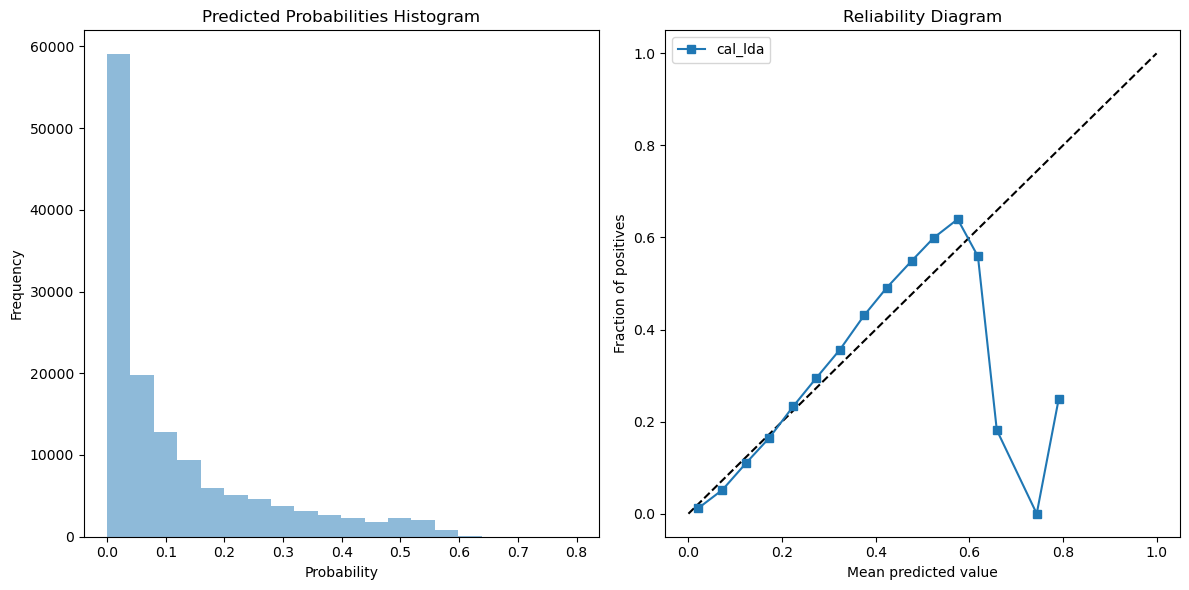

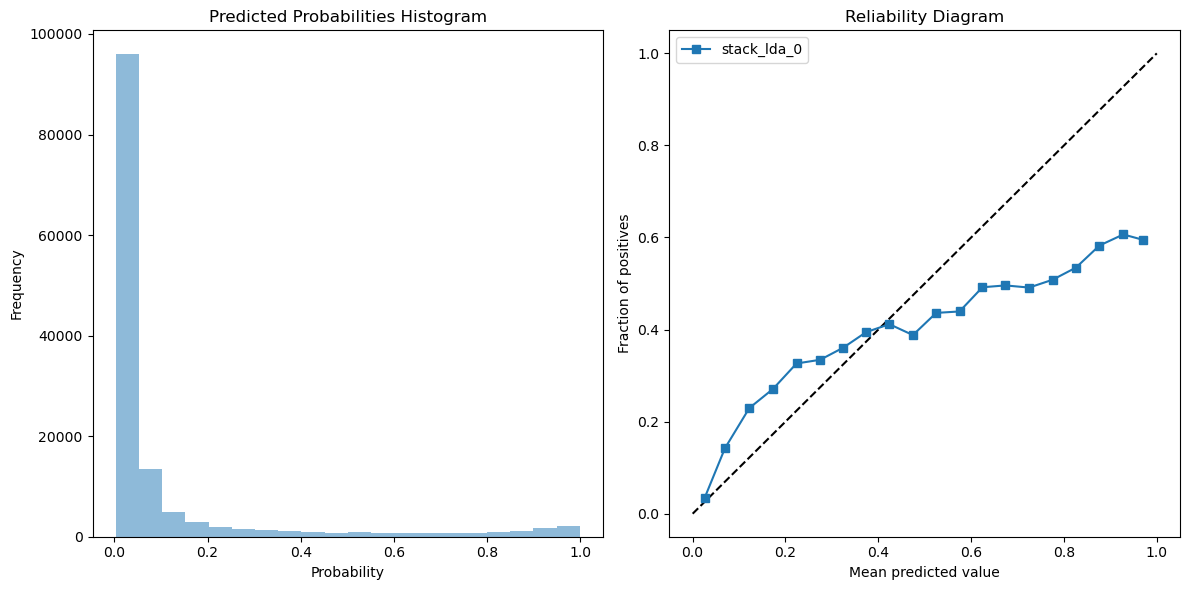

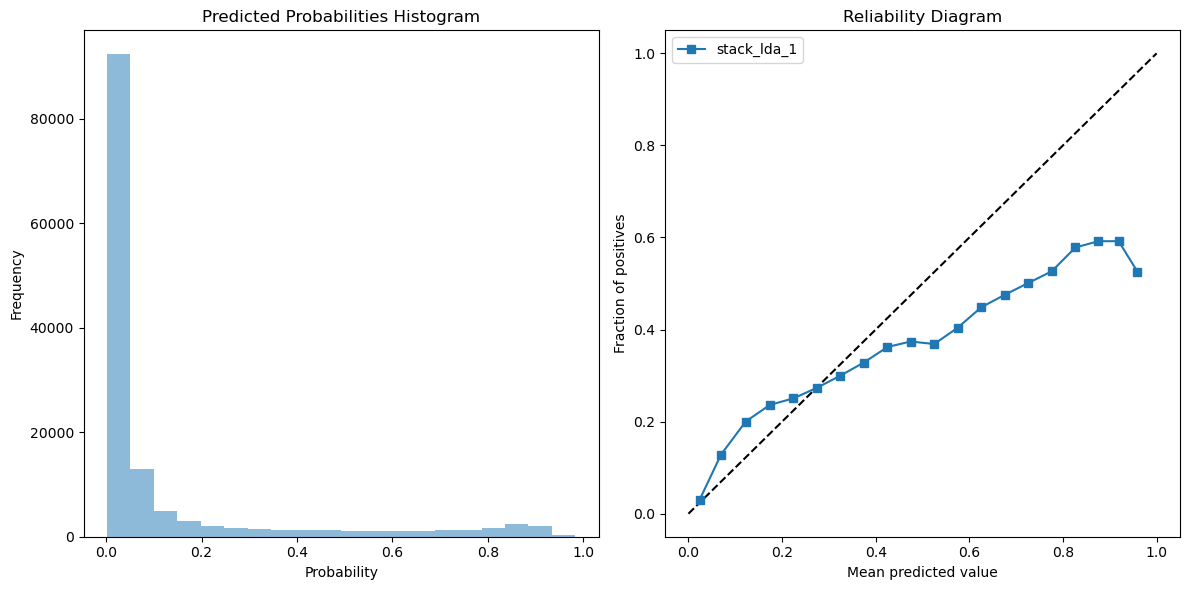

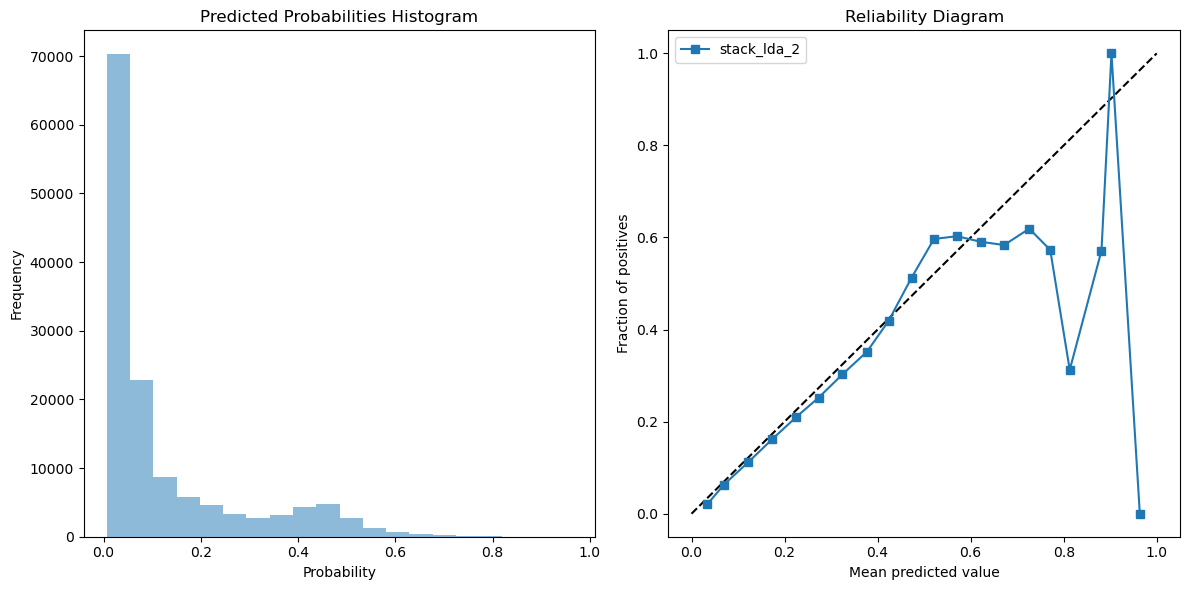

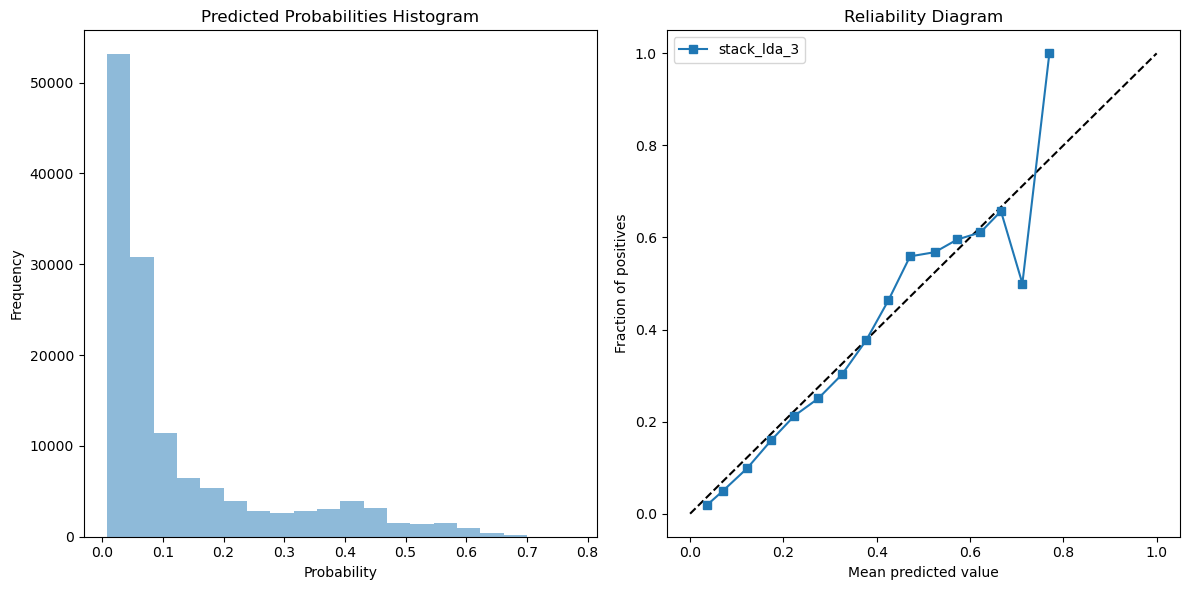

In [15]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_lda_dict.keys():
    all_probas = np.concatenate(probas_lda_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_lda_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=20)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [16]:
base_lr = LogisticRegression(max_iter=10000, C=0.01, penalty= 'l2' , solver='newton-cg', n_jobs=-1)
calibrated_final_estimator_lr = CalibratedClassifierCV(base_lr, method='isotonic', cv=5)


probas_lr_dict = {
    "_lr": [],
    "cal_lr": [],
    "stack_lr_0": [],
    "stack_lr_1": [],
    "stack_lr_2": [],
    "stack_lr_3": []
}

true_lr_labels = []

stack0_lr_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_lr, n_jobs=-1)
stack1_lr_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_lr, n_jobs=-1)
stack2_lr_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_lr, n_jobs=-1)
stack3_lr_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_lr, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_lr = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the lr
    base_lr.fit(X_train, y_train)
    probas_base_lr_test = base_lr.predict_proba(X_test)
    probas_lr_dict["_lr"].append(probas_base_lr_test)  # Store the predicted probabilities
    
    # Train the cal_lr
    calibrated_final_estimator_lr.fit(X_train, y_train)
    probas_cal_lr_test = calibrated_final_estimator_lr.predict_proba(X_test)
    probas_lr_dict["cal_lr"].append(probas_cal_lr_test)  # Store the predicted probabilities 
    
    # Train the stack0
    stack0_lr_uncalibrated.fit(X_train, y_train)
    probas_lr_test_stack0 = stack0_lr_uncalibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_0"].append(probas_lr_test_stack0)  # Store the predicted probabilities    
    # Train the stack1
    stack1_lr_partially_calibrated.fit(X_train, y_train)
    probas_lr_test_stack1 = stack1_lr_partially_calibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_1"].append(probas_lr_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_lr_partially_calibrated.fit(X_train, y_train)
    probas_lr_test_stack2 = stack2_lr_partially_calibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_2"].append(probas_lr_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_lr_fully_calibrated.fit(X_train, y_train)
    probas_lr_test_stack3 = stack3_lr_fully_calibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_3"].append(probas_lr_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_lr_labels.extend(y_test.tolist())

    # Calculate evaluation metrics for lr
    acc_cal_lr = accuracy_score(y_test, np.argmax(probas_base_lr_test, axis=1))
    brier_cal_lr = brier_score(y_true_indicator, probas_base_lr_test)
    ece_cal_lr = ECE(y_true=y_true_indicator, probs=probas_base_lr_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr = MCE(y_true=y_test.values.tolist(), probs=probas_base_lr_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr = cross_entropy(y_true_indicator, probas_base_lr_test)
    roc_auc_cal_lr = roc_auc_score(y_test, probas_base_lr_test[:, 1])    

    # Calculate evaluation metrics for cal_lr
    
    acc_cal_cal_lr = accuracy_score(y_test, np.argmax(probas_cal_lr_test, axis=1))
    brier_cal_cal_lr = brier_score(y_true_indicator, probas_cal_lr_test)
    ece_cal_cal_lr = ECE(y_true=y_true_indicator, probs=probas_cal_lr_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_lr = MCE(y_true=y_test.values.tolist(), probs=probas_cal_lr_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_lr = cross_entropy(y_true_indicator, probas_cal_lr_test)
    roc_auc_cal_cal_lr = roc_auc_score(y_test, probas_cal_lr_test[:, 1])    
    
    
    
    # Calculate evaluation metrics for stack0
    acc_cal_lr_stack0 = accuracy_score(y_test, np.argmax(probas_lr_test_stack0, axis=1))
    brier_cal_lr_stack0 = brier_score(y_true_indicator, probas_lr_test_stack0)
    ece_cal_lr_stack0 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack0 = cross_entropy(y_true_indicator, probas_lr_test_stack0)
    roc_auc_cal_lr_stack0 = roc_auc_score(y_test, probas_lr_test_stack0[:, 1])    
    
   
    # Calculate evaluation metrics for stack1
    acc_cal_lr_stack1 = accuracy_score(y_test, np.argmax(probas_lr_test_stack1, axis=1))
    brier_cal_lr_stack1 = brier_score(y_true_indicator, probas_lr_test_stack1)
    ece_cal_lr_stack1 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack1 = cross_entropy(y_true_indicator, probas_lr_test_stack1)
    roc_auc_cal_lr_stack1 = roc_auc_score(y_test, probas_lr_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_lr_stack2 = accuracy_score(y_test, np.argmax(probas_lr_test_stack2, axis=1))
    brier_cal_lr_stack2 = brier_score(y_true_indicator, probas_lr_test_stack2)
    ece_cal_lr_stack2 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack2 = cross_entropy(y_true_indicator, probas_lr_test_stack2)
    roc_auc_cal_lr_stack2 = roc_auc_score(y_test, probas_lr_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_lr_stack3 = accuracy_score(y_test, np.argmax(probas_lr_test_stack3, axis=1))
    brier_cal_lr_stack3 = brier_score(y_true_indicator, probas_lr_test_stack3)
    ece_cal_lr_stack3 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack3 = cross_entropy(y_true_indicator, probas_lr_test_stack3)
    roc_auc_cal_lr_stack3 = roc_auc_score(y_test, probas_lr_test_stack3[:, 1])

    results_lr.append({
        'Brier Score (base_lr)': brier_cal_lr,
        'ECE (base_lr)': ece_cal_lr,
        'MCE (base_lr)': mce_cal_lr,
        'Cross-Entropy (base_lr)': ce_cal_lr,
        'Accuracy (base_lr)': acc_cal_lr,
        'ROC AUC (base_lr)': roc_auc_cal_lr,
        
        'Brier Score (cal_lr)': brier_cal_cal_lr,
        'ECE (cal_lr)': ece_cal_cal_lr,
        'MCE (cal_lr)': mce_cal_cal_lr,
        'Cross-Entropy (cal_lr)': ce_cal_cal_lr,
        'Accuracy (cal_lr)': acc_cal_cal_lr,
        'ROC AUC (cal_lr)': roc_auc_cal_cal_lr,     
        
        'Brier Score (stack0_lr_partially_calibrated)': brier_cal_lr_stack0,
        'ECE (stack0_lr_partially_calibrated)': ece_cal_lr_stack0,
        'MCE (stack0_lr_partially_calibrated)': mce_cal_lr_stack0,
        'Cross-Entropy (stack0_lr_partially_calibrated)': ce_cal_lr_stack0,
        'Accuracy (stack0_lr_partially_calibrated)': acc_cal_lr_stack0,
        'ROC AUC (stack0_lr_partially_calibrated)': roc_auc_cal_lr_stack0,
        
        'Brier Score (stack1_lr_partially_calibrated)': brier_cal_lr_stack1,
        'ECE (stack1_lr_partially_calibrated)': ece_cal_lr_stack1,
        'MCE (stack1_lr_partially_calibrated)': mce_cal_lr_stack1,
        'Cross-Entropy (stack1_lr_partially_calibrated)': ce_cal_lr_stack1,
        'Accuracy (stack1_lr_partially_calibrated)': acc_cal_lr_stack1,
        'ROC AUC (stack1_lr_partially_calibrated)': roc_auc_cal_lr_stack1,

        'Brier Score (stack2_lr_partially_calibrated)': brier_cal_lr_stack2,
        'ECE (stack2_lr_partially_calibrated)': ece_cal_lr_stack2,
        'MCE (stack2_lr_partially_calibrated)': mce_cal_lr_stack2,
        'Cross-Entropy (stack2_lr_partially_calibrated)': ce_cal_lr_stack2,
        'Accuracy (stack2_lr_partially_calibrated)': acc_cal_lr_stack2,
        'ROC AUC (stack2_lr_partially_calibrated)': roc_auc_cal_lr_stack2,

        'Brier Score (stack3_lr_fully_calibrated)': brier_cal_lr_stack3,
        'ECE (stack3_lr_fully_calibrated)': ece_cal_lr_stack3,
        'MCE (stack3_lr_fully_calibrated)': mce_cal_lr_stack3,
        'Cross-Entropy (stack3_lr_fully_calibrated)': ce_cal_lr_stack3,
        'Accuracy (stack3_lr_fully_calibrated)': acc_cal_lr_stack3,
        'ROC AUC (stack3_lr_fully_calibrated)': roc_auc_cal_lr_stack3,
    })

# Display results
results_lr_df = pd.DataFrame(results_lr)
print("Results for each fold:")
print(results_lr_df)

# Calculate and display the average
avg_results_lr = results_lr_df.mean()
print("\nAverage results:")
print(avg_results_lr)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_lr)  ECE (base_lr)  MCE (base_lr)  \
0                0.081272       0.221488       0.102487   
1                0.083911       0.218517       0.099098   
2                0.083297       0.219504       0.099450   
3                0.079393       0.218320       0.183042   
4                0.084397       0.218623       0.081804   
5                0.082100       0.220405       0.093012   
6                0.084048       0.217109       0.079634   
7                0.083477       0.222354       0.094529   
8                0.080725       0.220072       0.075615   
9                0.080065       0.219487       0.124941   
10               0.081223       0.218333       0.095381   
11               0.081522       0.217943       0.146371   
12               0.080939       0.223186       0.136967   
13               0.083856       0.217602       0.069697   
14               0.083725       0.217382       0.076835   

    Cross-Entropy (base_lr)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


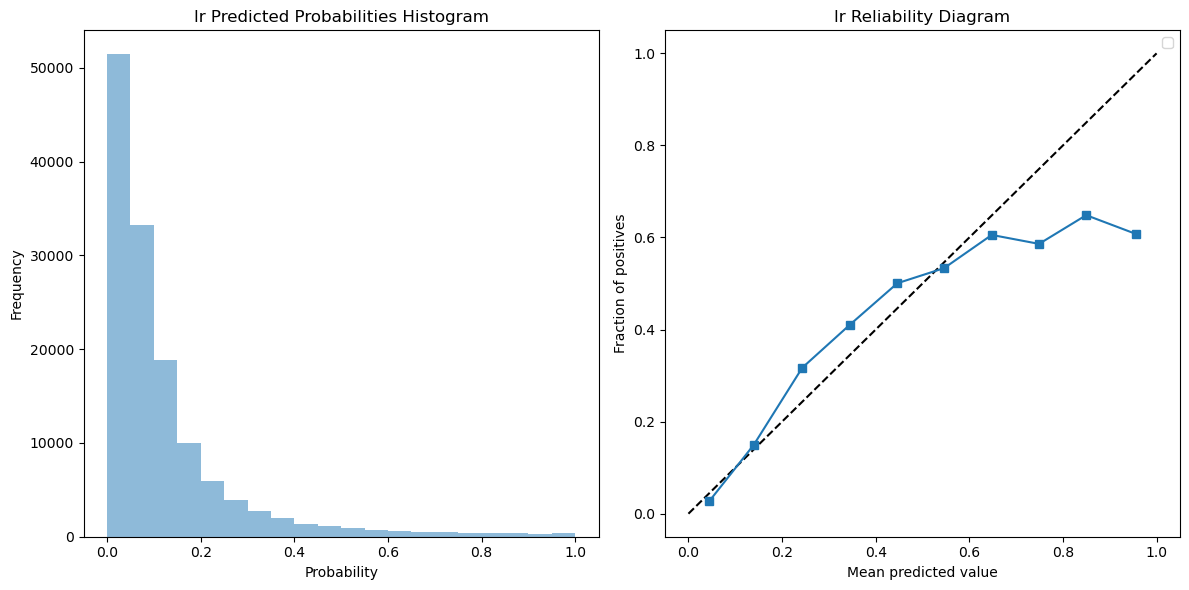

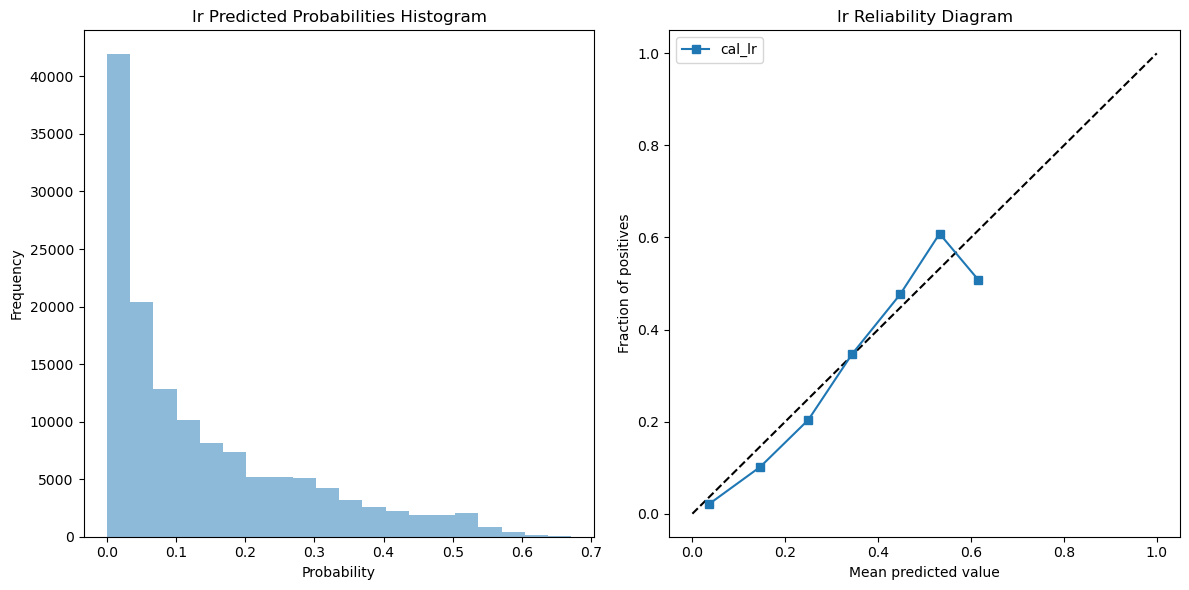

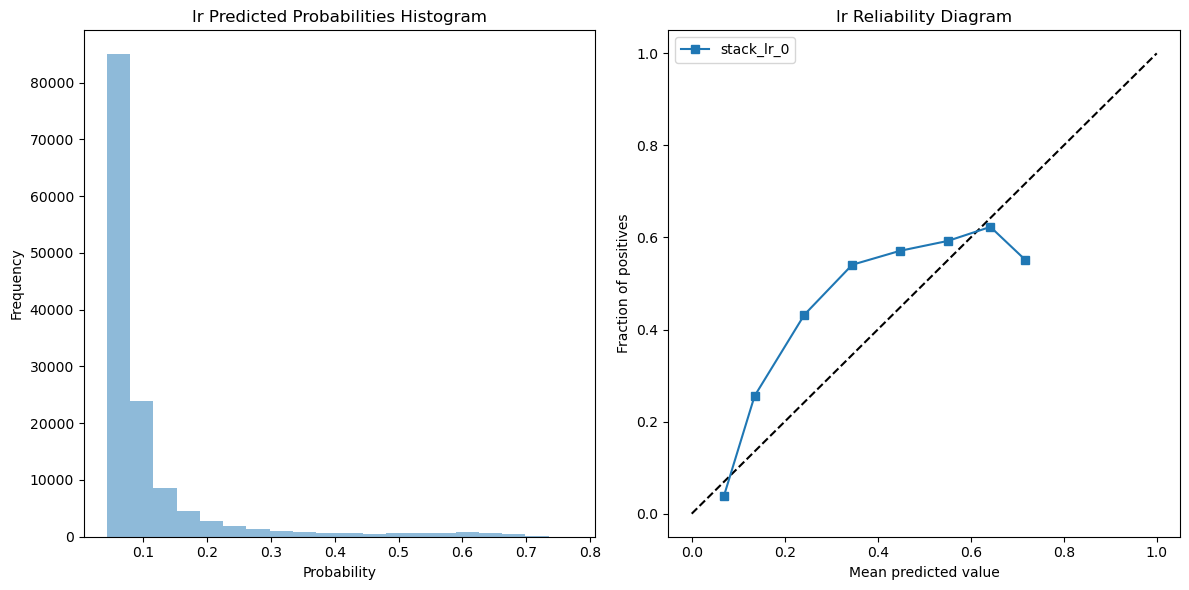

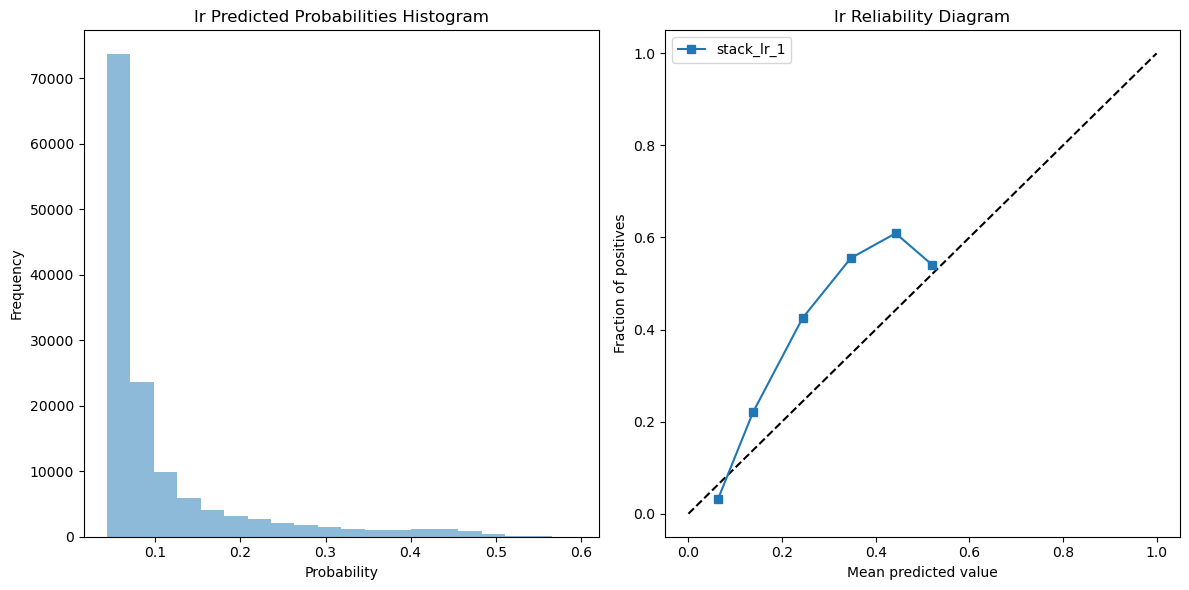

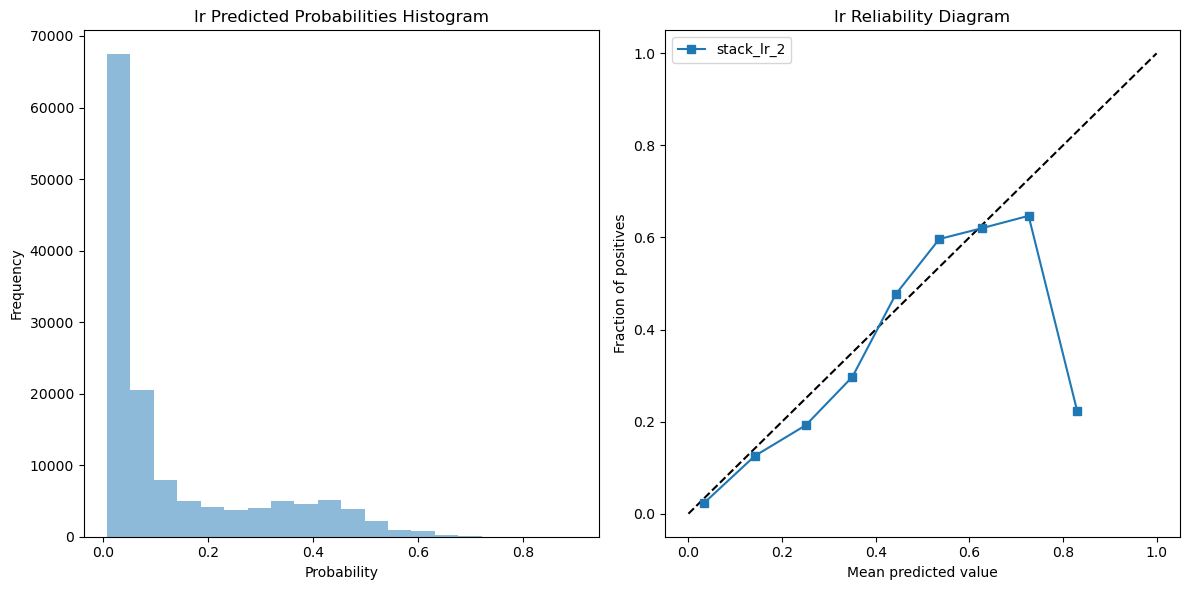

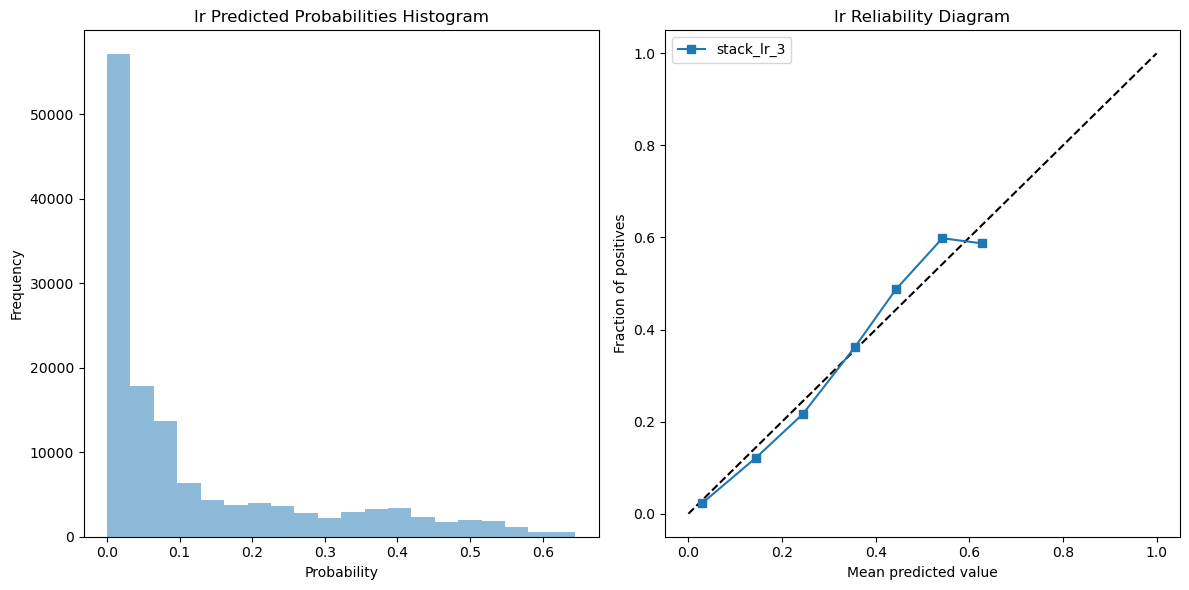

In [17]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_lr_dict.keys():
    all_probas = np.concatenate(probas_lr_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_lr_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('lr Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('lr Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [18]:
base_dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10, min_samples_split=5, splitter='best')
calibrated_final_estimator_dt = CalibratedClassifierCV(base_dt, method='isotonic', cv=5)
stack1_dt_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_dt, n_jobs=-1)
stack2_dt_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_dt, n_jobs=-1) 
stack3_dt_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_dt, n_jobs=-1)

probas_dt_dict = {
    "_dt": [],
    "cal_dt": [],
    "stack_dt_0": [],
    "stack_dt_1": [],
    "stack_dt_2": [],
    "stack_dt_3": []
}

true_dt_labels = []

stack0_dt_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_dt, n_jobs=-1)
stack1_dt_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_dt, n_jobs=-1)
stack2_dt_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_dt, n_jobs=-1)
stack3_dt_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_dt, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_dt = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the dt
    base_dt.fit(X_train, y_train)
    probas_base_dt_test = base_dt.predict_proba(X_test)
    probas_dt_dict["_dt"].append(probas_base_dt_test)

        # Train the cal_dt
    calibrated_final_estimator_dt.fit(X_train, y_train)
    probas_cal_dt_test = calibrated_final_estimator_dt.predict_proba(X_test)
    probas_dt_dict["cal_dt"].append(probas_cal_dt_test)  # Store the predicted probabilities  
    
    # Train the stack0
    stack0_dt_uncalibrated.fit(X_train, y_train)
    probas_dt_test_stack0 = stack0_dt_uncalibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_0"].append(probas_dt_test_stack0)
    

    # Train the stack1
    stack1_dt_partially_calibrated.fit(X_train, y_train)
    probas_dt_test_stack1 = stack1_dt_partially_calibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_1"].append(probas_dt_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_dt_partially_calibrated.fit(X_train, y_train)
    probas_dt_test_stack2 = stack2_dt_partially_calibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_2"].append(probas_dt_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_dt_fully_calibrated.fit(X_train, y_train)
    probas_dt_test_stack3 = stack3_dt_fully_calibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_3"].append(probas_dt_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_dt_labels.extend(y_test.tolist())
# Calculate evaluation metrics for dt
    acc_cal_dt = accuracy_score(y_test, np.argmax(probas_base_dt_test, axis=1))
    brier_cal_dt = brier_score(y_true_indicator, probas_base_dt_test)
    ece_cal_dt = ECE(y_true=y_true_indicator, probs=probas_base_dt_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt = MCE(y_true=y_test.values.tolist(), probs=probas_base_dt_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt = cross_entropy(y_true_indicator, probas_base_dt_test)
    roc_auc_cal_dt = roc_auc_score(y_test, probas_base_dt_test[:, 1])
    
    # Calculate evaluation metrics for cal_dt
    
    acc_cal_cal_dt = accuracy_score(y_test, np.argmax(probas_cal_dt_test, axis=1))
    brier_cal_cal_dt = brier_score(y_true_indicator, probas_cal_dt_test)
    ece_cal_cal_dt = ECE(y_true=y_true_indicator, probs=probas_cal_dt_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_dt = MCE(y_true=y_test.values.tolist(), probs=probas_cal_dt_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_dt = cross_entropy(y_true_indicator, probas_cal_dt_test)
    roc_auc_cal_cal_dt = roc_auc_score(y_test, probas_cal_dt_test[:, 1])

    # Calculate evaluation metrics for stack0
    acc_cal_dt_stack0 = accuracy_score(y_test, np.argmax(probas_dt_test_stack0, axis=1))
    brier_cal_dt_stack0 = brier_score(y_true_indicator, probas_dt_test_stack0)
    ece_cal_dt_stack0 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack0 = cross_entropy(y_true_indicator, probas_dt_test_stack0)
    roc_auc_cal_dt_stack0 = roc_auc_score(y_test, probas_dt_test_stack0[:, 1])    
    
    
    
    
    # Calculate evaluation metrics for stack1
    acc_cal_dt_stack1 = accuracy_score(y_test, np.argmax(probas_dt_test_stack1, axis=1))
    brier_cal_dt_stack1 = brier_score(y_true_indicator, probas_dt_test_stack1)
    ece_cal_dt_stack1 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack1 = cross_entropy(y_true_indicator, probas_dt_test_stack1)
    roc_auc_cal_dt_stack1 = roc_auc_score(y_test, probas_dt_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_dt_stack2 = accuracy_score(y_test, np.argmax(probas_dt_test_stack2, axis=1))
    brier_cal_dt_stack2 = brier_score(y_true_indicator, probas_dt_test_stack2)
    ece_cal_dt_stack2 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack2 = cross_entropy(y_true_indicator, probas_dt_test_stack2)
    roc_auc_cal_dt_stack2 = roc_auc_score(y_test, probas_dt_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_dt_stack3 = accuracy_score(y_test, np.argmax(probas_dt_test_stack3, axis=1))
    brier_cal_dt_stack3 = brier_score(y_true_indicator, probas_dt_test_stack3)
    ece_cal_dt_stack3 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack3 = cross_entropy(y_true_indicator, probas_dt_test_stack3)
    roc_auc_cal_dt_stack3 = roc_auc_score(y_test, probas_dt_test_stack3[:, 1])

    results_dt.append({    
        'Brier Score (base_dt)': brier_cal_dt,
        'ECE (base_dt)': ece_cal_dt,
        'MCE (base_dt)': mce_cal_dt,
        'Cross-Entropy (base_dt)': ce_cal_dt,
        'Accuracy (base_dt)': acc_cal_dt,
        'ROC AUC (base_dt)': roc_auc_cal_dt,
        
        'Brier Score (cal_dt)': brier_cal_cal_dt,
        'ECE (cal_dt)': ece_cal_cal_dt,
        'MCE (cal_dt)': mce_cal_cal_dt,
        'Cross-Entropy (cal_dt)': ce_cal_cal_dt,
        'Accuracy (cal_dt)': acc_cal_cal_dt,
        'ROC AUC (cal_dt)': roc_auc_cal_cal_dt,
        
        'Brier Score (stack0_dt_partially_calibrated)': brier_cal_dt_stack0,
        'ECE (stack0_dt_partially_calibrated)': ece_cal_dt_stack0,
        'MCE (stack0_dt_partially_calibrated)': mce_cal_dt_stack0,
        'Cross-Entropy (stack0_dt_partially_calibrated)': ce_cal_dt_stack0,
        'Accuracy (stack0_dt_partially_calibrated)': acc_cal_dt_stack0,
        'ROC AUC (stack0_dt_partially_calibrated)': roc_auc_cal_dt_stack0,
        
        'Brier Score (stack1_dt_partially_calibrated)': brier_cal_dt_stack1,
        'ECE (stack1_dt_partially_calibrated)': ece_cal_dt_stack1,
        'MCE (stack1_dt_partially_calibrated)': mce_cal_dt_stack1,
        'Cross-Entropy (stack1_dt_partially_calibrated)': ce_cal_dt_stack1,
        'Accuracy (stack1_dt_partially_calibrated)': acc_cal_dt_stack1,
        'ROC AUC (stack1_dt_partially_calibrated)': roc_auc_cal_dt_stack1,

        'Brier Score (stack2_dt_partially_calibrated)': brier_cal_dt_stack2,
        'ECE (stack2_dt_partially_calibrated)': ece_cal_dt_stack2,
        'MCE (stack2_dt_partially_calibrated)': mce_cal_dt_stack2,
        'Cross-Entropy (stack2_dt_partially_calibrated)': ce_cal_dt_stack2,
        'Accuracy (stack2_dt_partially_calibrated)': acc_cal_dt_stack2,
        'ROC AUC (stack2_dt_partially_calibrated)': roc_auc_cal_dt_stack2,

        'Brier Score (stack3_dt_fully_calibrated)': brier_cal_dt_stack3,
        'ECE (stack3_dt_fully_calibrated)': ece_cal_dt_stack3,
        'MCE (stack3_dt_fully_calibrated)': mce_cal_dt_stack3,
        'Cross-Entropy (stack3_dt_fully_calibrated)': ce_cal_dt_stack3,
        'Accuracy (stack3_dt_fully_calibrated)': acc_cal_dt_stack3,
        'ROC AUC (stack3_dt_fully_calibrated)': roc_auc_cal_dt_stack3,
    })

# Display results
results_dt_df = pd.DataFrame(results_dt)
print("Results for each fold:")
print(results_dt_df)

# Calculate and display the average
avg_results_dt = results_dt_df.mean()
print("\nAverage results:")
print(avg_results_dt)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_dt)  ECE (base_dt)  MCE (base_dt)  \
0                0.070534       0.231973       0.067297   
1                0.074335       0.228726       0.099557   
2                0.073050       0.229617       0.119459   
3                0.071217       0.228041       0.080999   
4                0.074375       0.228262       0.049986   
5                0.075207       0.229774       0.103742   
6                0.072844       0.227805       0.183716   
7                0.073294       0.231480       0.108624   
8                0.073459       0.229232       0.104128   
9                0.072150       0.230222       0.097792   
10               0.071392       0.229145       0.058955   
11               0.071844       0.226394       0.038055   
12               0.074055       0.229216       0.051593   
13               0.071422       0.229919       0.218112   
14               0.074456       0.229729       0.099610   

    Cross-Entropy (base_dt)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


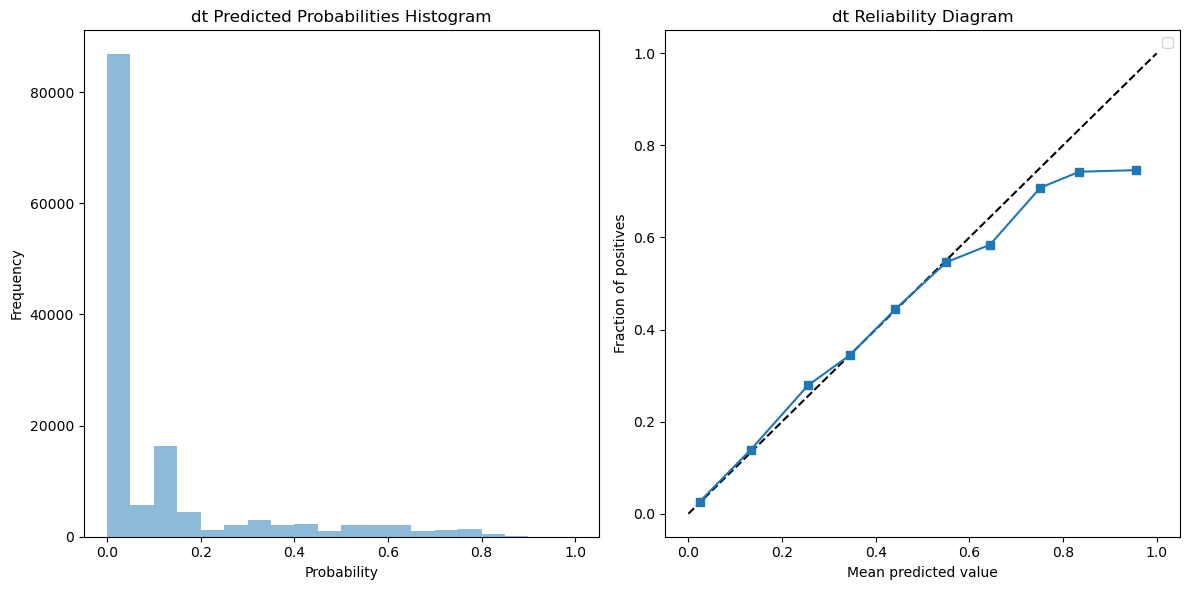

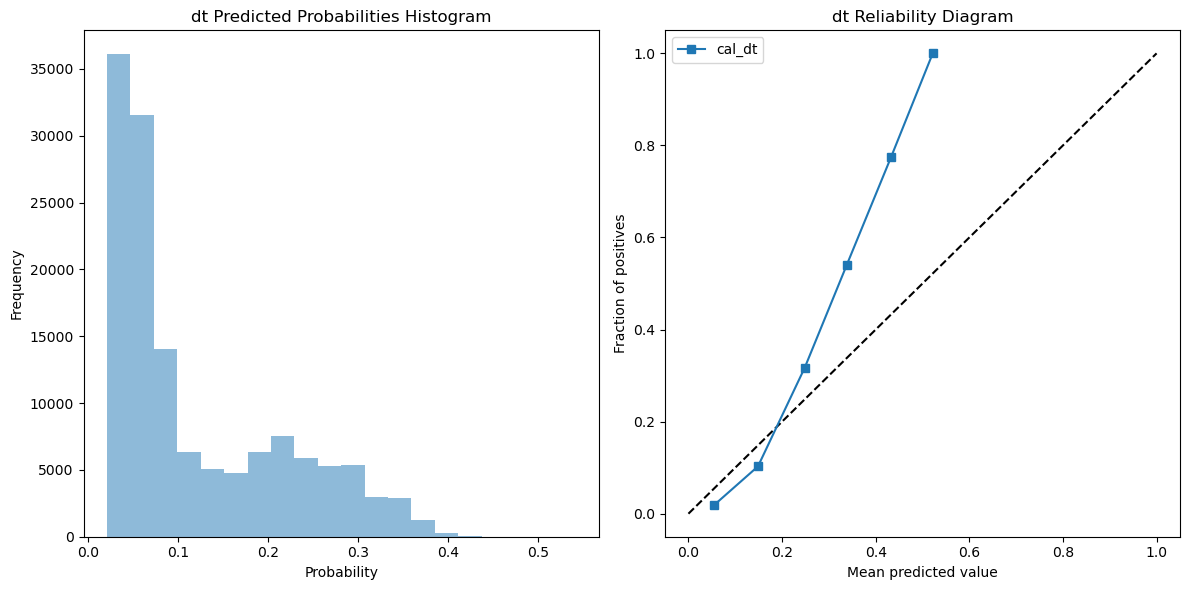

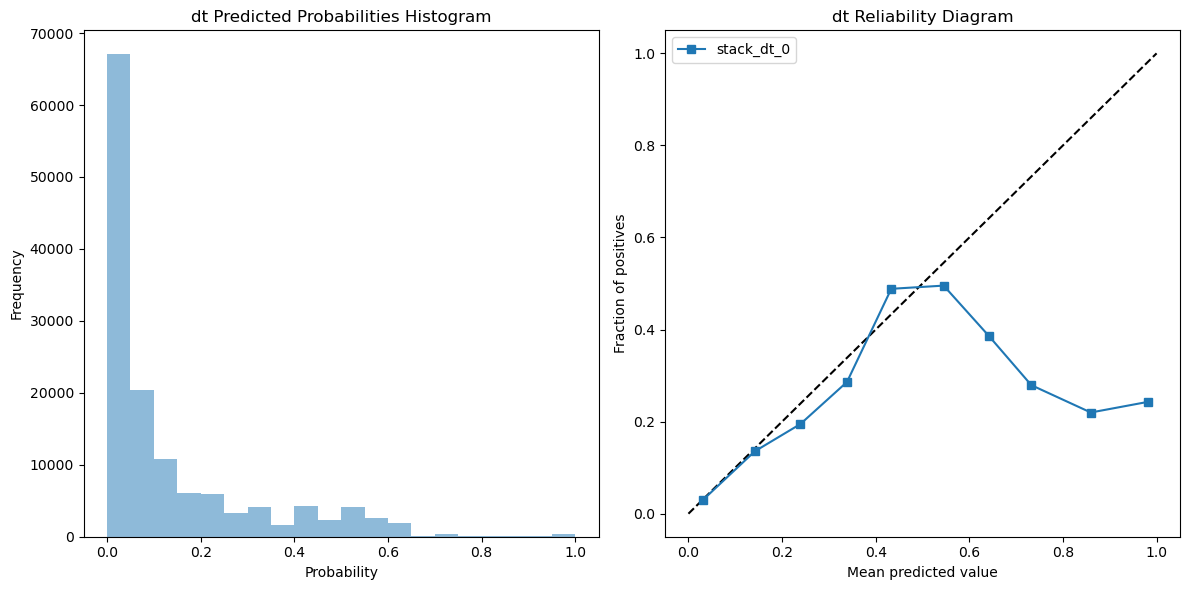

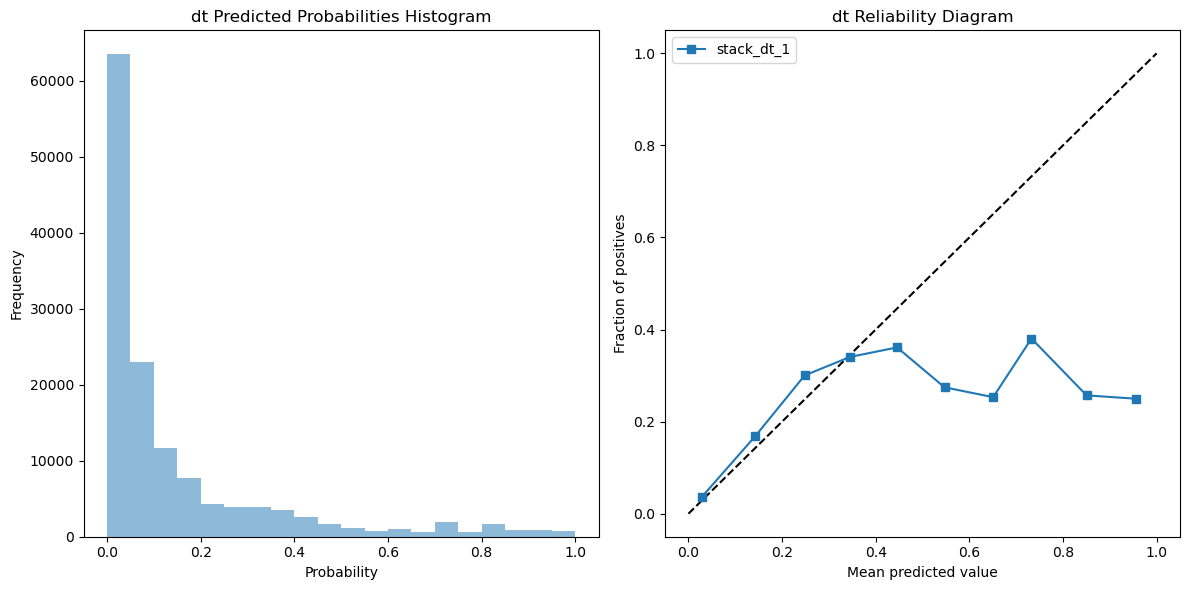

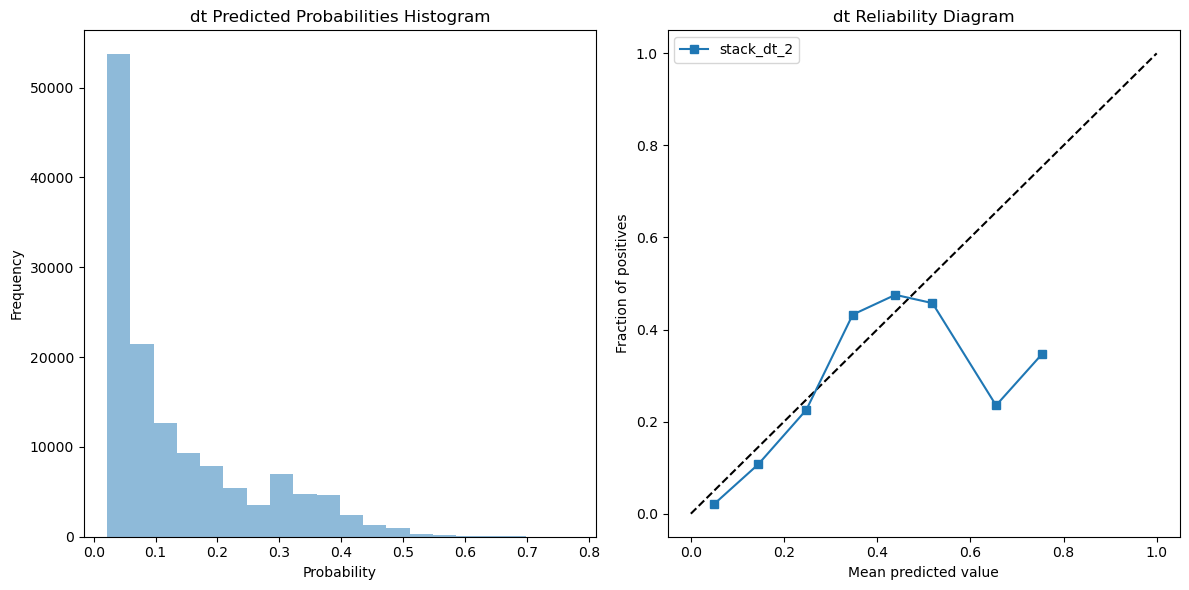

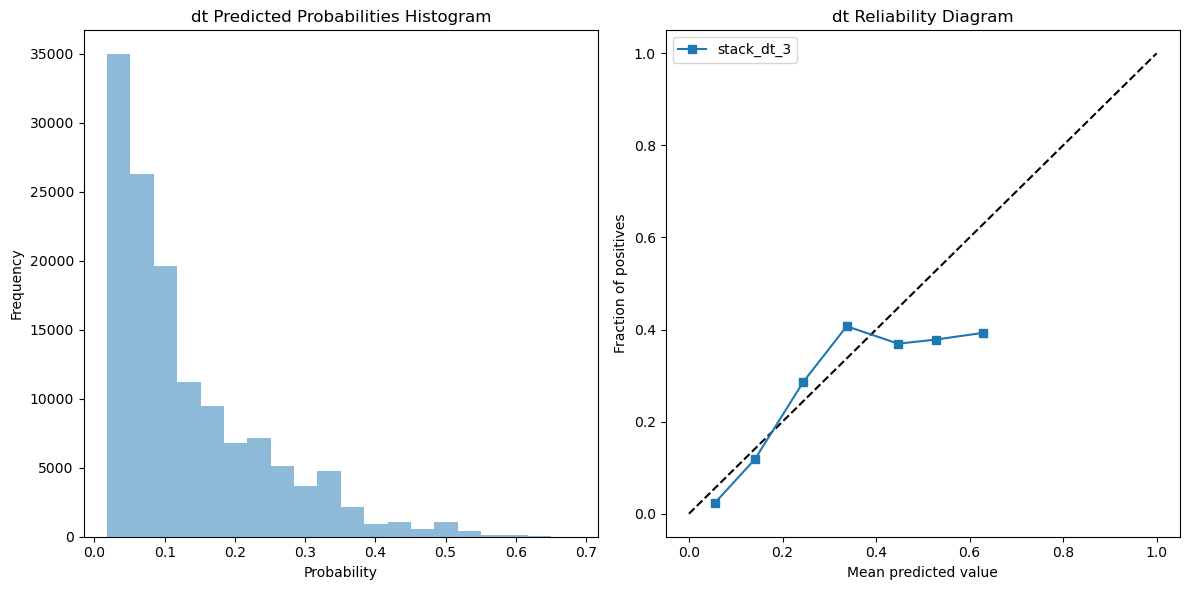

In [19]:
for key in probas_dt_dict.keys():
    all_probas = np.concatenate(probas_dt_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_dt_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('dt Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('dt Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [20]:
base_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, n_jobs=-1)
calibrated_final_estimator_rf = CalibratedClassifierCV(base_rf, method='isotonic', cv=5)

probas_rf_dict = {
    "_rf": [],
    "cal_rf": [],
    "stack_rf_0": [],
    "stack_rf_1": [],
    "stack_rf_2": [],
    "stack_rf_3": []
}

true_rf_labels = []

stack0_rf_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_rf, n_jobs=-1)
stack1_rf_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_rf, n_jobs=-1)
stack2_rf_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_rf, n_jobs=-1)
stack3_rf_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_rf, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_rf = []

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the rf
    base_rf.fit(X_train, y_train)
    probas_base_rf_test = base_rf.predict_proba(X_test)
    probas_rf_dict["_rf"].append(probas_base_rf_test)

    # Train the cal_rf
    calibrated_final_estimator_rf.fit(X_train, y_train)
    probas_cal_rf_test = calibrated_final_estimator_rf.predict_proba(X_test)
    probas_rf_dict["cal_rf"].append(probas_cal_rf_test)  # Store the predicted probabilities      

    # Train the stack0
    stack0_rf_uncalibrated.fit(X_train, y_train)
    probas_rf_test_stack0 = stack0_rf_uncalibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_0"].append(probas_rf_test_stack0)


    # Train the stack1
    stack1_rf_partially_calibrated.fit(X_train, y_train)
    probas_rf_test_stack1 = stack1_rf_partially_calibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_1"].append(probas_rf_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_rf_partially_calibrated.fit(X_train, y_train)
    probas_rf_test_stack2 = stack2_rf_partially_calibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_2"].append(probas_rf_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_rf_fully_calibrated.fit(X_train, y_train)
    probas_rf_test_stack3 = stack3_rf_fully_calibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_3"].append(probas_rf_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_rf_labels.extend(y_test.tolist())
    
    # Calculate evaluation metrics for rf
    acc_cal_rf = accuracy_score(y_test, np.argmax(probas_base_rf_test, axis=1))
    brier_cal_rf = brier_score(y_true_indicator, probas_base_rf_test)
    ece_cal_rf = ECE(y_true=y_true_indicator, probs=probas_base_rf_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf = MCE(y_true=y_test.values.tolist(), probs=probas_base_rf_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf = cross_entropy(y_true_indicator, probas_base_rf_test)
    roc_auc_cal_rf = roc_auc_score(y_test, probas_base_rf_test[:, 1])
    
    # Calculate evaluation metrics for cal_rf
    
    acc_cal_cal_rf = accuracy_score(y_test, np.argmax(probas_cal_rf_test, axis=1))
    brier_cal_cal_rf = brier_score(y_true_indicator, probas_cal_rf_test)
    ece_cal_cal_rf = ECE(y_true=y_true_indicator, probs=probas_cal_rf_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_rf = MCE(y_true=y_test.values.tolist(), probs=probas_cal_rf_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_rf = cross_entropy(y_true_indicator, probas_cal_rf_test)
    roc_auc_cal_cal_rf = roc_auc_score(y_test, probas_cal_rf_test[:, 1])

    # Calculate evaluation metrics for stack0
    acc_cal_rf_stack0 = accuracy_score(y_test, np.argmax(probas_rf_test_stack0, axis=1))
    brier_cal_rf_stack0 = brier_score(y_true_indicator, probas_rf_test_stack0)
    ece_cal_rf_stack0 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack0 = cross_entropy(y_true_indicator, probas_rf_test_stack0)
    roc_auc_cal_rf_stack0 = roc_auc_score(y_test, probas_rf_test_stack0[:, 1])

    
    # Calculate evaluation metrics for stack1
    acc_cal_rf_stack1 = accuracy_score(y_test, np.argmax(probas_rf_test_stack1, axis=1))
    brier_cal_rf_stack1 = brier_score(y_true_indicator, probas_rf_test_stack1)
    ece_cal_rf_stack1 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack1 = cross_entropy(y_true_indicator, probas_rf_test_stack1)
    roc_auc_cal_rf_stack1 = roc_auc_score(y_test, probas_rf_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_rf_stack2 = accuracy_score(y_test, np.argmax(probas_rf_test_stack2, axis=1))
    brier_cal_rf_stack2 = brier_score(y_true_indicator, probas_rf_test_stack2)
    ece_cal_rf_stack2 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack2 = cross_entropy(y_true_indicator, probas_rf_test_stack2)
    roc_auc_cal_rf_stack2 = roc_auc_score(y_test, probas_rf_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_rf_stack3 = accuracy_score(y_test, np.argmax(probas_rf_test_stack3, axis=1))
    brier_cal_rf_stack3 = brier_score(y_true_indicator, probas_rf_test_stack3)
    ece_cal_rf_stack3 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack3 = cross_entropy(y_true_indicator, probas_rf_test_stack3)
    roc_auc_cal_rf_stack3 = roc_auc_score(y_test, probas_rf_test_stack3[:, 1])

    results_rf.append({    
        'Brier Score (base_rf)': brier_cal_rf,
        'ECE (base_rf)': ece_cal_rf,
        'MCE (base_rf)': mce_cal_rf,
        'Cross-Entropy (base_rf)': ce_cal_rf,
        'Accuracy (base_rf)': acc_cal_rf,
        'ROC AUC (base_rf)': roc_auc_cal_rf,
        
        'Brier Score (cal_rf)': brier_cal_cal_rf,
        'ECE (cal_rf)': ece_cal_cal_rf,
        'MCE (cal_rf)': mce_cal_cal_rf,
        'Cross-Entropy (cal_rf)': ce_cal_cal_rf,
        'Accuracy (cal_rf)': acc_cal_cal_rf,
        'ROC AUC (cal_rf)': roc_auc_cal_cal_rf,
        
        'Brier Score (stack0_rf_partially_calibrated)': brier_cal_rf_stack0,
        'ECE (stack0_rf_partially_calibrated)': ece_cal_rf_stack0,
        'MCE (stack0_rf_partially_calibrated)': mce_cal_rf_stack0,
        'Cross-Entropy (stack0_rf_partially_calibrated)': ce_cal_rf_stack0,
        'Accuracy (stack0_rf_partially_calibrated)': acc_cal_rf_stack0,
        'ROC AUC (stack0_rf_partially_calibrated)': roc_auc_cal_rf_stack0,
        
        'Brier Score (stack1_rf_partially_calibrated)': brier_cal_rf_stack1,
        'ECE (stack1_rf_partially_calibrated)': ece_cal_rf_stack1,
        'MCE (stack1_rf_partially_calibrated)': mce_cal_rf_stack1,
        'Cross-Entropy (stack1_rf_partially_calibrated)': ce_cal_rf_stack1,
        'Accuracy (stack1_rf_partially_calibrated)': acc_cal_rf_stack1,
        'ROC AUC (stack1_rf_partially_calibrated)': roc_auc_cal_rf_stack1,

        'Brier Score (stack2_rf_partially_calibrated)': brier_cal_rf_stack2,
        'ECE (stack2_rf_partially_calibrated)': ece_cal_rf_stack2,
        'MCE (stack2_rf_partially_calibrated)': mce_cal_rf_stack2,
        'Cross-Entropy (stack2_rf_partially_calibrated)': ce_cal_rf_stack2,
        'Accuracy (stack2_rf_partially_calibrated)': acc_cal_rf_stack2,
        'ROC AUC (stack2_rf_partially_calibrated)': roc_auc_cal_rf_stack2,

        'Brier Score (stack3_rf_fully_calibrated)': brier_cal_rf_stack3,
        'ECE (stack3_rf_fully_calibrated)': ece_cal_rf_stack3,
        'MCE (stack3_rf_fully_calibrated)': mce_cal_rf_stack3,
        'Cross-Entropy (stack3_rf_fully_calibrated)': ce_cal_rf_stack3,
        'Accuracy (stack3_rf_fully_calibrated)': acc_cal_rf_stack3,
        'ROC AUC (stack3_rf_fully_calibrated)': roc_auc_cal_rf_stack3,
    })

# Display results
results_rf_df = pd.DataFrame(results_rf)
print("Results for each fold:")
print(results_rf_df)

# Calculate and display the average
avg_results_rf = results_rf_df.mean()
print("\nAverage results:")
print(avg_results_rf)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_rf)  ECE (base_rf)  MCE (base_rf)  \
0                0.073231       0.222650       0.127454   
1                0.074827       0.219064       0.124163   
2                0.074495       0.218908       0.098176   
3                0.073976       0.221027       0.131208   
4                0.074343       0.219938       0.078898   
5                0.074440       0.225672       0.037842   
6                0.072880       0.220205       0.104296   
7                0.074108       0.225088       0.111818   
8                0.074170       0.223978       0.074729   
9                0.073630       0.221150       0.148495   
10               0.073157       0.222943       0.113025   
11               0.074610       0.218794       0.090931   
12               0.075000       0.222725       0.092025   
13               0.071366       0.225449       0.051532   
14               0.074641       0.221405       0.111323   

    Cross-Entropy (base_rf)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


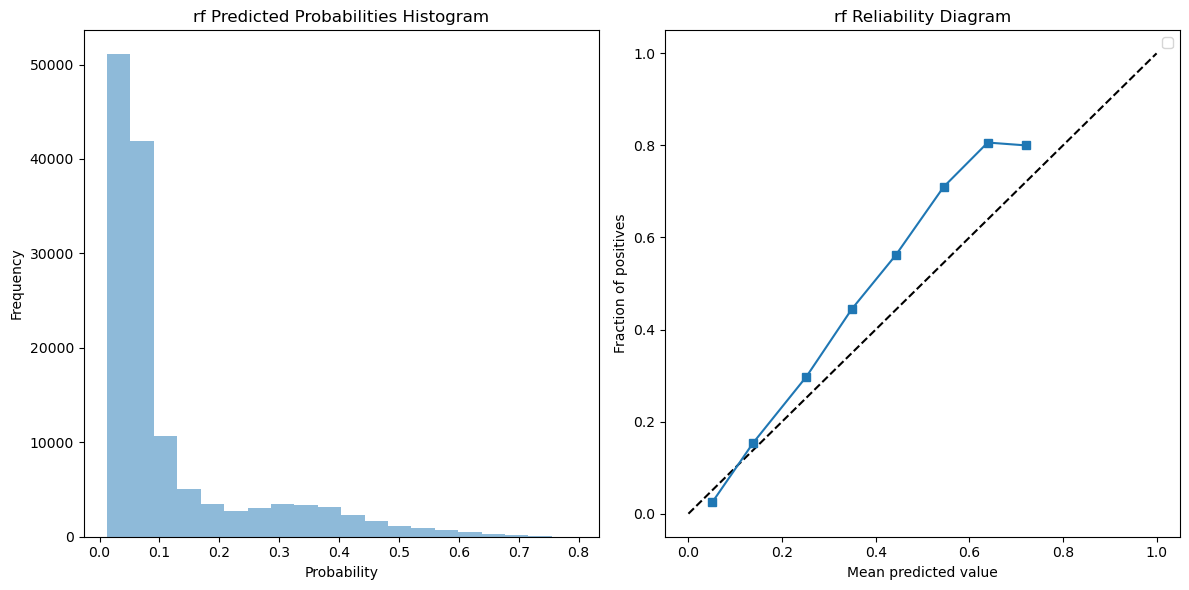

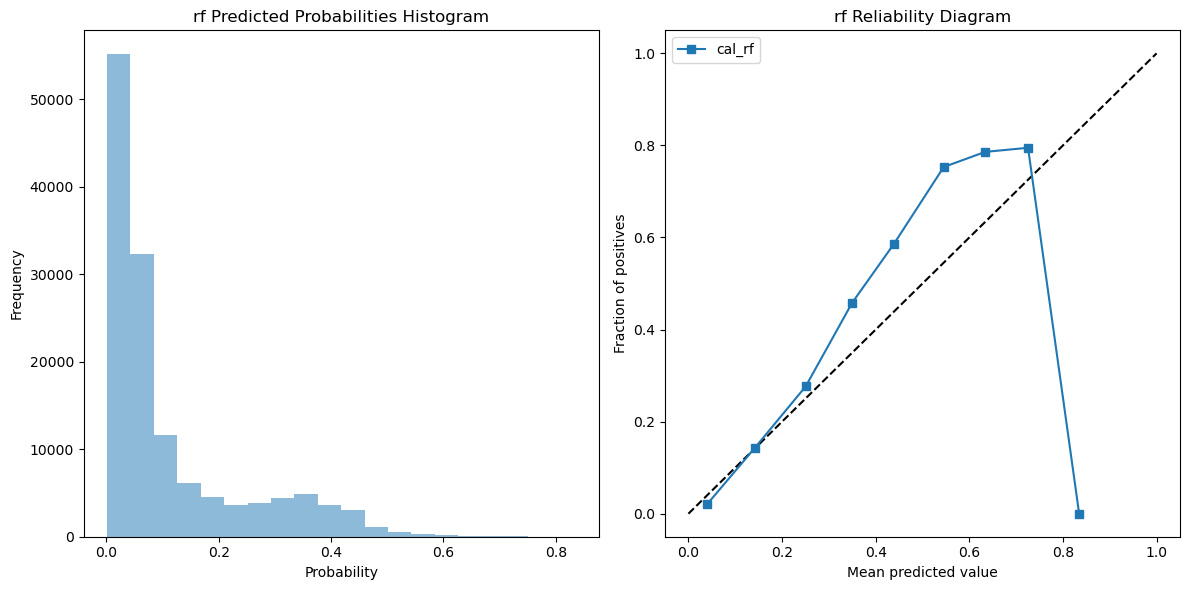

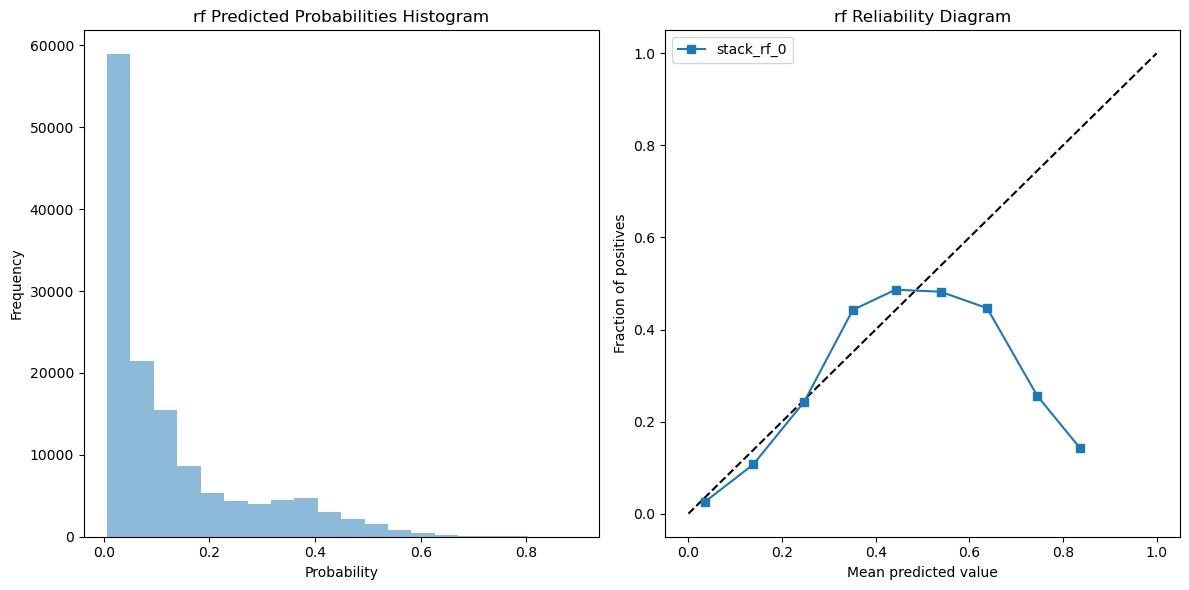

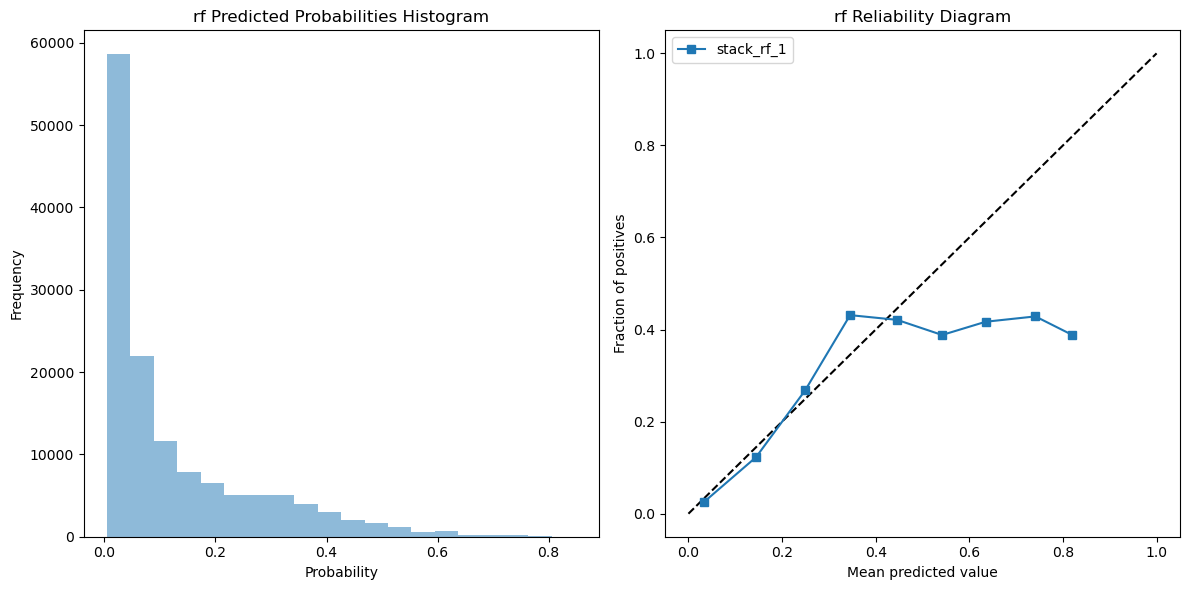

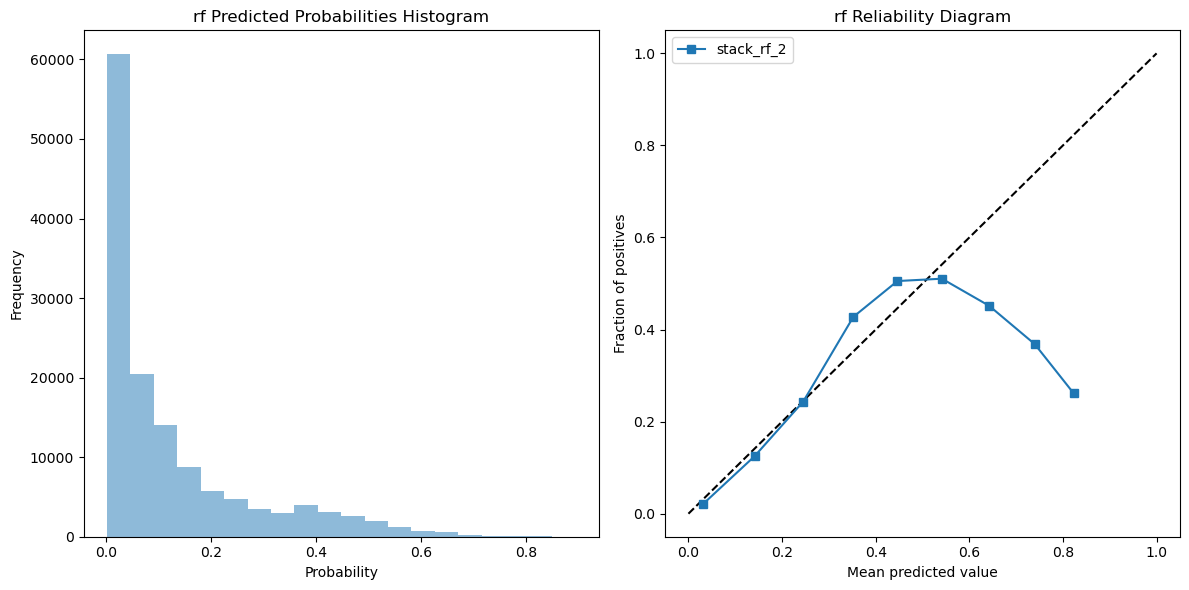

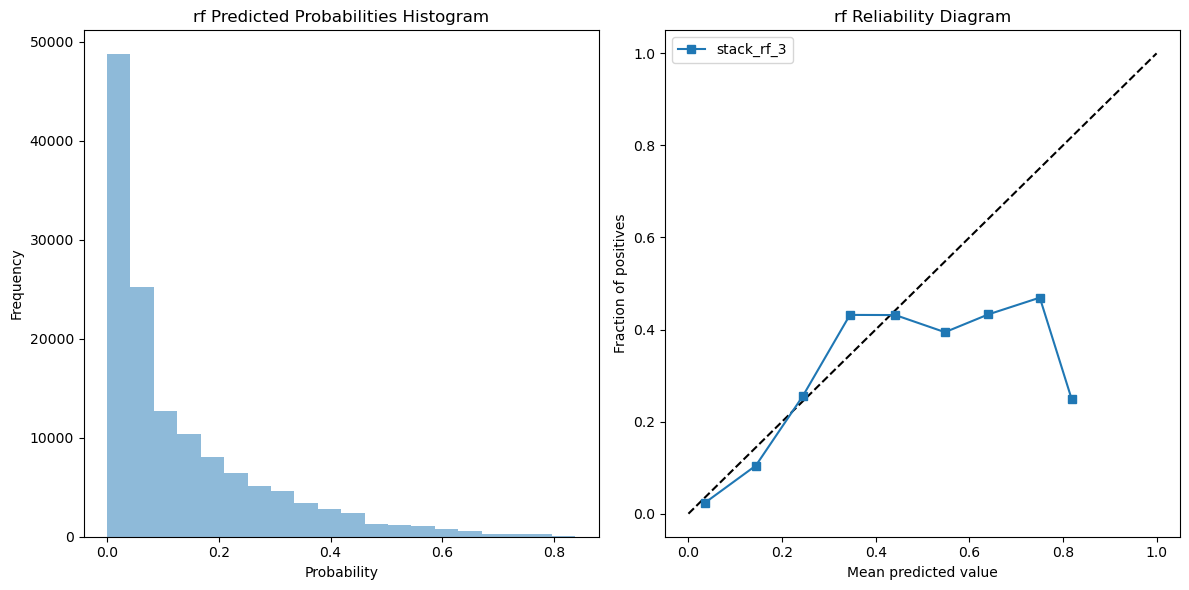

In [21]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_rf_dict.keys():
    all_probas = np.concatenate(probas_rf_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_rf_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('rf Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('rf Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [33]:
base_knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, metric= 'manhattan', weights='uniform', n_jobs=-1)


calibrated_final_estimator_knn = CalibratedClassifierCV(base_knn, method='isotonic', cv=5)
probas_knn_dict = {
    "_knn": [],
    "cal_knn": [],
    "stack_knn_0": [],
    "stack_knn_1": [],
    "stack_knn_2": [],
    "stack_knn_3": []
}

true_knn_labels = []

stack0_knn_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_knn, n_jobs=-1)
stack1_knn_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_knn, n_jobs=-1)
stack2_knn_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_knn, n_jobs=-1)
stack3_knn_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_knn, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_knn = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the knn
    base_knn.fit(X_train, y_train)
    probas_base_knn_test = base_knn.predict_proba(X_test)
    probas_knn_dict["_knn"].append(probas_base_knn_test)  # Store the predicted probabilities

    # Train the cal_knn
    calibrated_final_estimator_knn.fit(X_train, y_train)
    probas_cal_knn_test = calibrated_final_estimator_knn.predict_proba(X_test)
    probas_knn_dict["cal_knn"].append(probas_cal_knn_test)  # Store the predicted probabilities      
    
    # Train the stack0
    stack0_knn_uncalibrated.fit(X_train, y_train)
    probas_knn_test_stack0 = stack0_knn_uncalibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_0"].append(probas_knn_test_stack0)  # Store the predicted probabilities    

    # Train the stack1
    stack1_knn_partially_calibrated.fit(X_train, y_train)
    probas_knn_test_stack1 = stack1_knn_partially_calibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_1"].append(probas_knn_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_knn_partially_calibrated.fit(X_train, y_train)
    probas_knn_test_stack2 = stack2_knn_partially_calibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_2"].append(probas_knn_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_knn_fully_calibrated.fit(X_train, y_train)
    probas_knn_test_stack3 = stack3_knn_fully_calibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_3"].append(probas_knn_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_knn_labels.extend(y_test.tolist())
    
    # Calculate evaluation metrics for knn
    acc_cal_knn = accuracy_score(y_test, np.argmax(probas_base_knn_test, axis=1))
    brier_cal_knn = brier_score(y_true_indicator, probas_base_knn_test)
    ece_cal_knn = ECE(y_true=y_true_indicator, probs=probas_base_knn_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn = MCE(y_true=y_test.values.tolist(), probs=probas_base_knn_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn = cross_entropy(y_true_indicator, probas_base_knn_test)
    roc_auc_cal_knn = roc_auc_score(y_test, probas_base_knn_test[:, 1])    

    # Calculate evaluation metrics for cal_knn
    
    acc_cal_cal_knn = accuracy_score(y_test, np.argmax(probas_cal_knn_test, axis=1))
    brier_cal_cal_knn = brier_score(y_true_indicator, probas_cal_knn_test)
    ece_cal_cal_knn = ECE(y_true=y_true_indicator, probs=probas_cal_knn_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_knn = MCE(y_true=y_test.values.tolist(), probs=probas_cal_knn_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_knn = cross_entropy(y_true_indicator, probas_cal_knn_test)
    roc_auc_cal_cal_knn = roc_auc_score(y_test, probas_cal_knn_test[:, 1])
    
    # Calculate evaluation metrics for stack0
    acc_cal_knn_stack0 = accuracy_score(y_test, np.argmax(probas_knn_test_stack0, axis=1))
    brier_cal_knn_stack0 = brier_score(y_true_indicator, probas_knn_test_stack0)
    ece_cal_knn_stack0 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack0 = cross_entropy(y_true_indicator, probas_knn_test_stack0)
    roc_auc_cal_knn_stack0 = roc_auc_score(y_test, probas_knn_test_stack0[:, 1])

    
    
    # Calculate evaluation metrics for stack1
    acc_cal_knn_stack1 = accuracy_score(y_test, np.argmax(probas_knn_test_stack1, axis=1))
    brier_cal_knn_stack1 = brier_score(y_true_indicator, probas_knn_test_stack1)
    ece_cal_knn_stack1 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack1 = cross_entropy(y_true_indicator, probas_knn_test_stack1)
    roc_auc_cal_knn_stack1 = roc_auc_score(y_test, probas_knn_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_knn_stack2 = accuracy_score(y_test, np.argmax(probas_knn_test_stack2, axis=1))
    brier_cal_knn_stack2 = brier_score(y_true_indicator, probas_knn_test_stack2)
    ece_cal_knn_stack2 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack2 = cross_entropy(y_true_indicator, probas_knn_test_stack2)
    roc_auc_cal_knn_stack2 = roc_auc_score(y_test, probas_knn_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_knn_stack3 = accuracy_score(y_test, np.argmax(probas_knn_test_stack3, axis=1))
    brier_cal_knn_stack3 = brier_score(y_true_indicator, probas_knn_test_stack3)
    ece_cal_knn_stack3 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack3 = cross_entropy(y_true_indicator, probas_knn_test_stack3)
    roc_auc_cal_knn_stack3 = roc_auc_score(y_test, probas_knn_test_stack3[:, 1])
    
    
    
    results_knn.append({
        'Brier Score (base_knn)': brier_cal_knn,
        'ECE (base_knn)': ece_cal_knn,
        'MCE (base_knn)': mce_cal_knn,
        'Cross-Entropy (base_knn)': ce_cal_knn,
        'Accuracy (base_knn)': acc_cal_knn,
        'ROC AUC (base_knn)': roc_auc_cal_knn,

        'Brier Score (cal_knn)': brier_cal_cal_knn,
        'ECE (cal_knn)': ece_cal_cal_knn,
        'MCE (cal_knn)': mce_cal_cal_knn,
        'Cross-Entropy (cal_knn)': ce_cal_cal_knn,
        'Accuracy (cal_knn)': acc_cal_cal_knn,
        'ROC AUC (cal_knn)': roc_auc_cal_cal_knn,
        
        'Brier Score (stack0_knn_partially_calibrated)': brier_cal_knn_stack0,
        'ECE (stack0_knn_partially_calibrated)': ece_cal_knn_stack0,
        'MCE (stack0_knn_partially_calibrated)': mce_cal_knn_stack0,
        'Cross-Entropy (stack0_knn_partially_calibrated)': ce_cal_knn_stack0,
        'Accuracy (stack0_knn_partially_calibrated)': acc_cal_knn_stack0,
        'ROC AUC (stack0_knn_partially_calibrated)': roc_auc_cal_knn_stack0,
        
        
        'Brier Score (stack1_knn_partially_calibrated)': brier_cal_knn_stack1,
        'ECE (stack1_knn_partially_calibrated)': ece_cal_knn_stack1,
        'MCE (stack1_knn_partially_calibrated)': mce_cal_knn_stack1,
        'Cross-Entropy (stack1_knn_partially_calibrated)': ce_cal_knn_stack1,
        'Accuracy (stack1_knn_partially_calibrated)': acc_cal_knn_stack1,
        'ROC AUC (stack1_knn_partially_calibrated)': roc_auc_cal_knn_stack1,

        'Brier Score (stack2_knn_partially_calibrated)': brier_cal_knn_stack2,
        'ECE (stack2_knn_partially_calibrated)': ece_cal_knn_stack2,
        'MCE (stack2_knn_partially_calibrated)': mce_cal_knn_stack2,
        'Cross-Entropy (stack2_knn_partially_calibrated)': ce_cal_knn_stack2,
        'Accuracy (stack2_knn_partially_calibrated)': acc_cal_knn_stack2,
        'ROC AUC (stack2_knn_partially_calibrated)': roc_auc_cal_knn_stack2,

        'Brier Score (stack3_knn_fully_calibrated)': brier_cal_knn_stack3,
        'ECE (stack3_knn_fully_calibrated)': ece_cal_knn_stack3,
        'MCE (stack3_knn_fully_calibrated)': mce_cal_knn_stack3,
        'Cross-Entropy (stack3_knn_fully_calibrated)': ce_cal_knn_stack3,
        'Accuracy (stack3_knn_fully_calibrated)': acc_cal_knn_stack3,
        'ROC AUC (stack3_knn_fully_calibrated)': roc_auc_cal_knn_stack3,
    })

# Display results
results_knn_df = pd.DataFrame(results_knn)
print("Results for each fold:")
print(results_knn_df)

# Calculate and display the average
avg_results_knn = results_knn_df.mean()
print("\nAverage results:")
print(avg_results_knn)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_knn)  ECE (base_knn)  MCE (base_knn)  \
0                 0.079613        0.224264        0.058291   
1                 0.081647        0.223380        0.120125   
2                 0.081497        0.223055        0.130853   
3                 0.079988        0.222223        0.068930   
4                 0.084092        0.223302        0.057619   
5                 0.082551        0.224713        0.037514   
6                 0.081714        0.222179        0.126118   
7                 0.080612        0.226850        0.093007   
8                 0.080090        0.223698        0.065512   
9                 0.081158        0.224247        0.099930   
10                0.080151        0.222621        0.061474   
11                0.081921        0.221973        0.091937   
12                0.082203        0.224572        0.118375   
13                0.082033        0.224422        0.072529   
14                0.081061        0.222234     

[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.4s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.8s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   2.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.2s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.6s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   1.8s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=30, weights=uniform; total time=   1.4s


[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.6s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.8s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.7s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   2.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.4s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.3s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.7s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=30, weights=uniform; total time=   1.4s


[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.5s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, weights=uniform; total time=   1.4s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=50, weights=uniform; total time=   1.8s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   1.9s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=70, weights=uniform; total time=   2.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=30, weights=uniform; total time=   1.3s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=50, weights=uniform; total time=   1.6s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   1.8s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=70, weights=uniform; total time=   1.7s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=30, weights=uniform; total time=   1.4s


/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_a

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Varia

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Lin

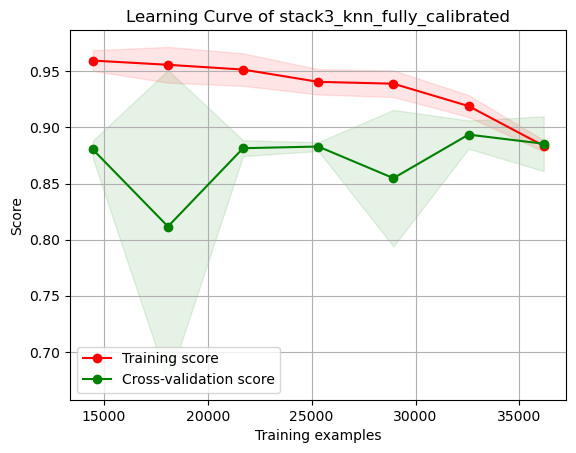

In [34]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# 这里我们使用stack3_knn_fully_calibrated模型和全数据集X, y
train_sizes, train_scores, test_scores = learning_curve(
    stack3_knn_fully_calibrated, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 绘图
plt.figure()
plt.title("Learning Curve of stack3_knn_fully_calibrated")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


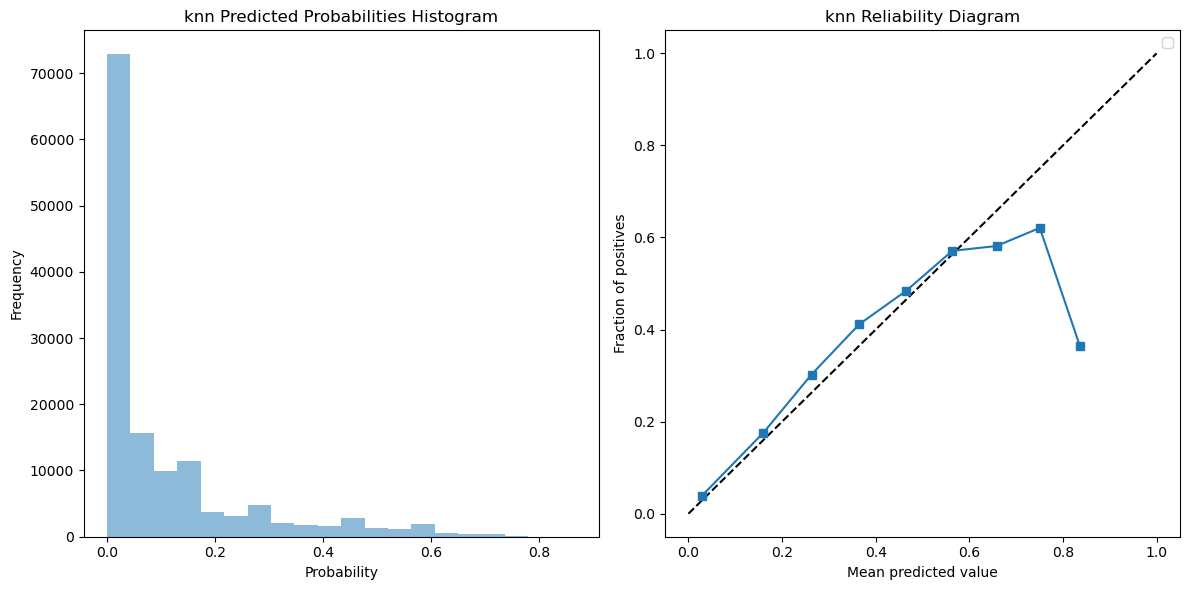

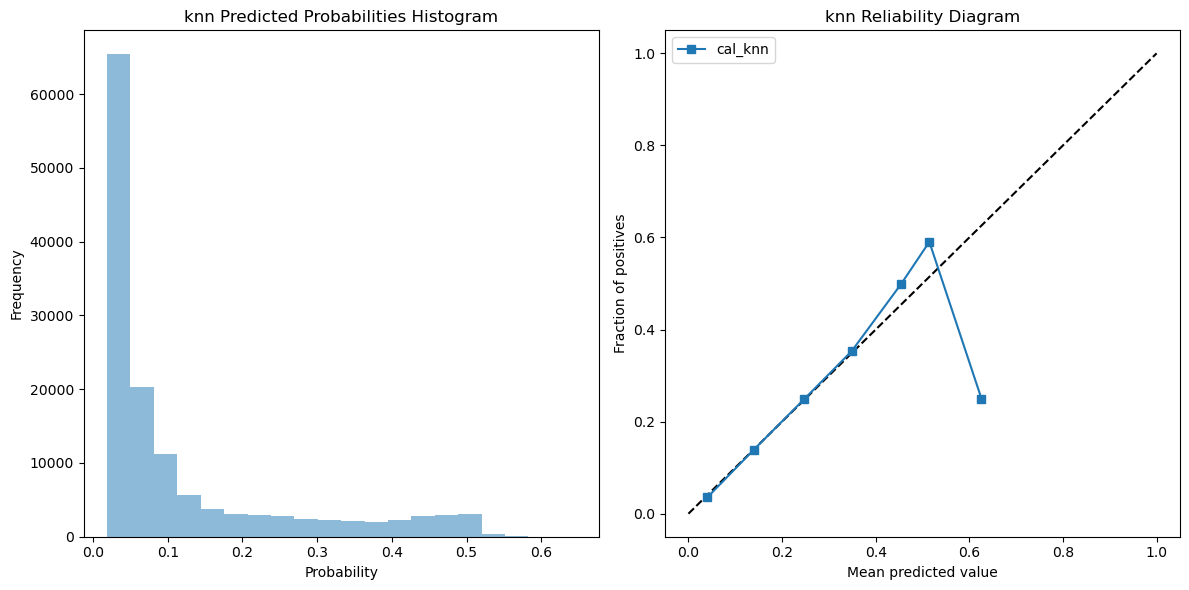

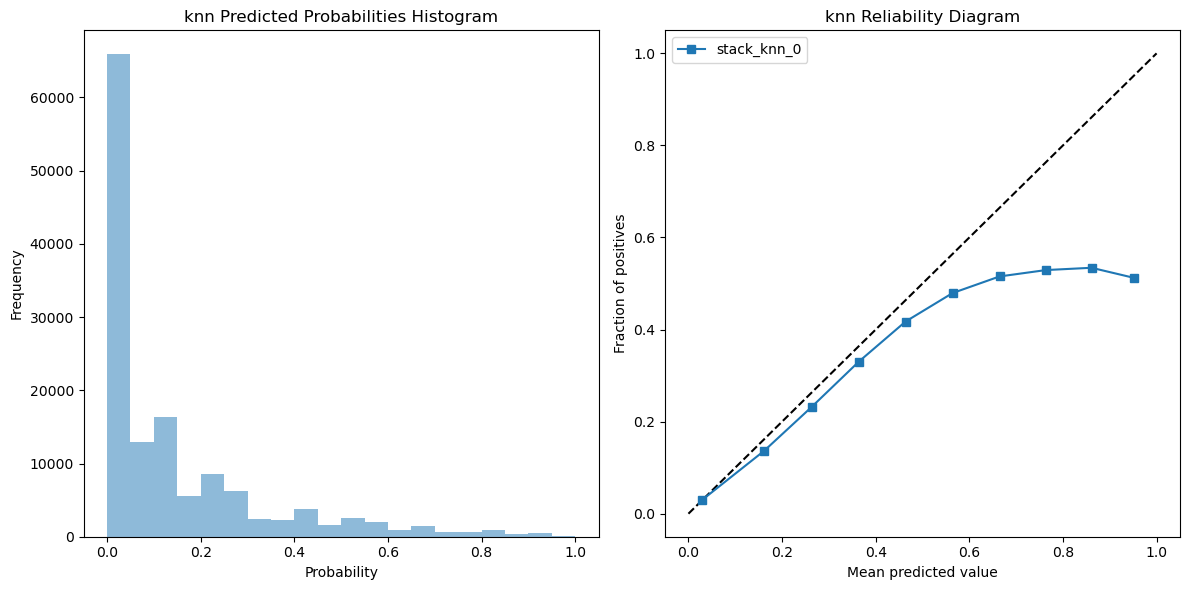

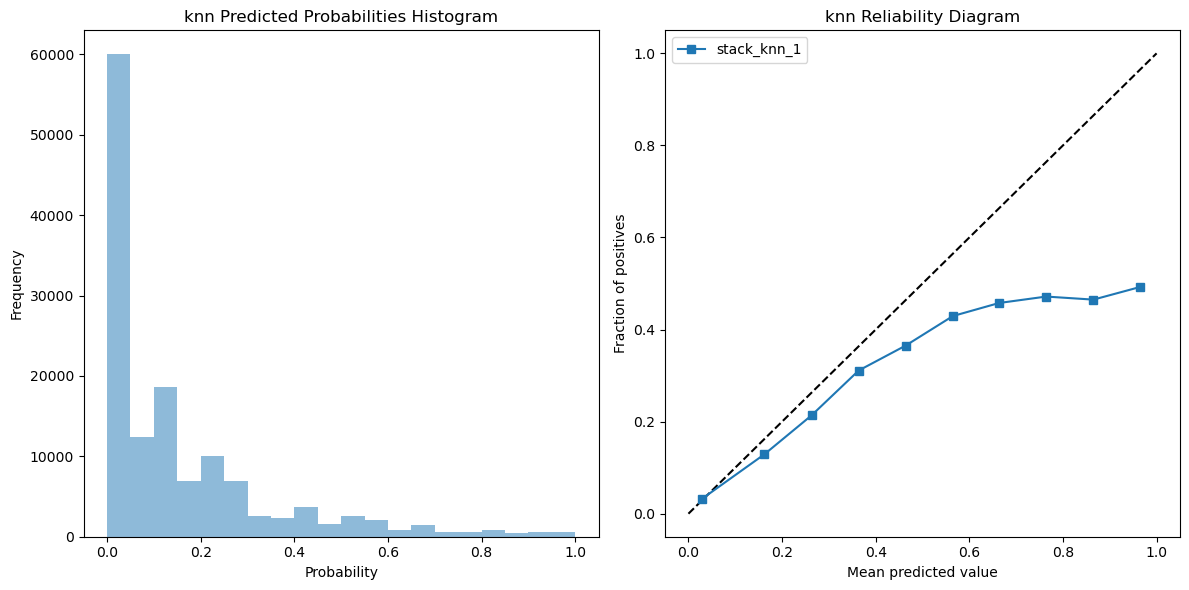

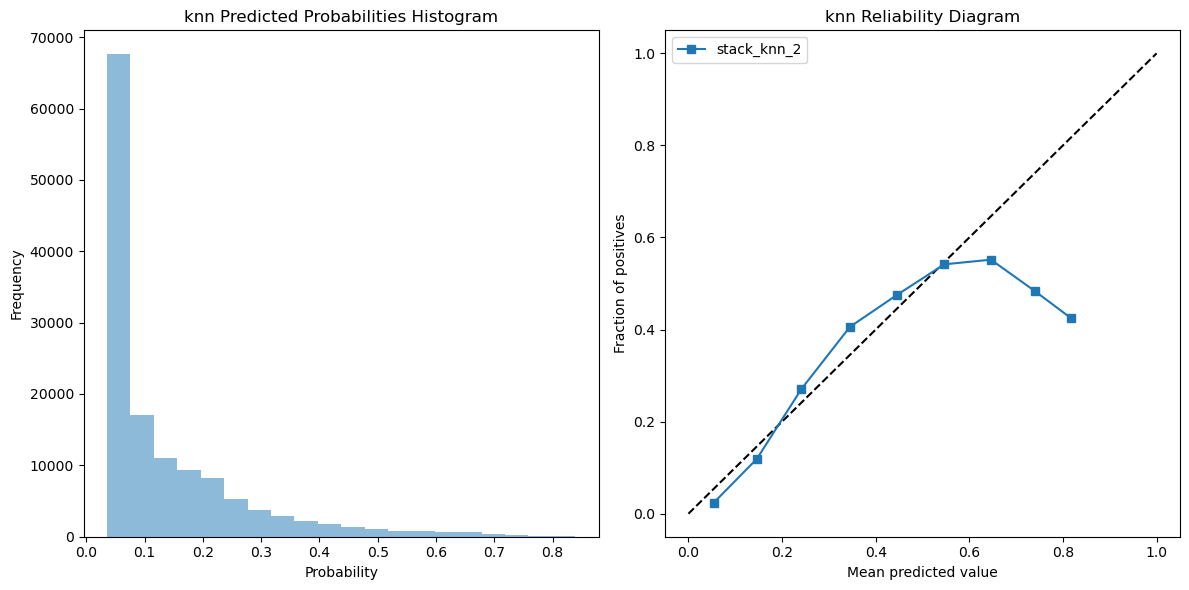

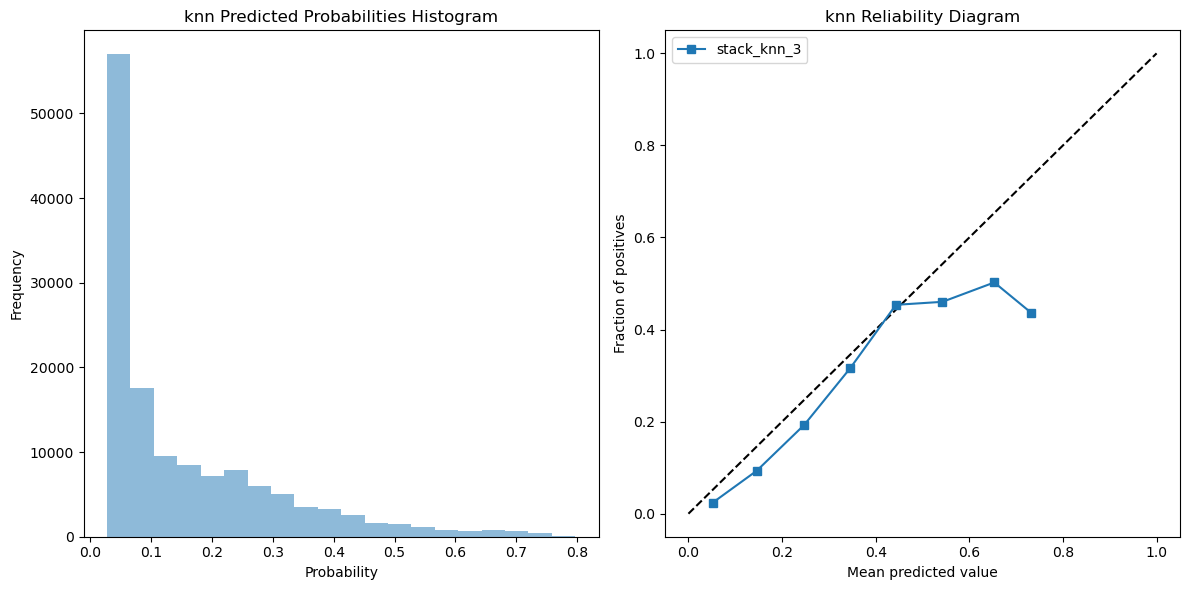

In [23]:
for key in probas_knn_dict.keys():
    all_probas = np.concatenate(probas_knn_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_knn_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('knn Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('knn Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [24]:
base_NB = GaussianNB(var_smoothing=1e-05)
calibrated_final_estimator_NB = CalibratedClassifierCV(base_NB, method='isotonic', cv=5)
probas_NB_dict = {
    "_NB": [],
    "cal_NB": [],
    "stack_NB_0": [],
    "stack_NB_1": [],
    "stack_NB_2": [],
    "stack_NB_3": []
}

true_NB_labels = []

stack0_NB_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_NB, n_jobs=-1)
stack1_NB_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_NB, n_jobs=-1)
stack2_NB_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_NB, n_jobs=-1)
stack3_NB_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_NB, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_NB = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the NB
    base_NB.fit(X_train, y_train)
    probas_base_NB_test = base_NB.predict_proba(X_test)
    probas_NB_dict["_NB"].append(probas_base_NB_test)  # Store the predicted probabilities

    # Train the cal_NB
    calibrated_final_estimator_NB.fit(X_train, y_train)
    probas_cal_NB_test = calibrated_final_estimator_NB.predict_proba(X_test)
    probas_NB_dict["cal_NB"].append(probas_cal_NB_test)  # Store the predicted probabilities      
    
    # Train the stack0
    stack0_NB_uncalibrated.fit(X_train, y_train)
    probas_NB_test_stack0 = stack0_NB_uncalibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_0"].append(probas_NB_test_stack0)  # Store the predicted probabilities    
    # Train the stack1
    stack1_NB_partially_calibrated.fit(X_train, y_train)
    probas_NB_test_stack1 = stack1_NB_partially_calibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_1"].append(probas_NB_test_stack1)  # Store the predicted probabilities

    
    # Train the stack2
    stack2_NB_partially_calibrated.fit(X_train, y_train)
    probas_NB_test_stack2 = stack2_NB_partially_calibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_2"].append(probas_NB_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_NB_fully_calibrated.fit(X_train, y_train)
    probas_NB_test_stack3 = stack3_NB_fully_calibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_3"].append(probas_NB_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_NB_labels.extend(y_test.tolist())

    # Calculate evaluation metrics for NB
    acc_cal_NB = accuracy_score(y_test, np.argmax(probas_base_NB_test, axis=1))
    brier_cal_NB = brier_score(y_true_indicator, probas_base_NB_test)
    ece_cal_NB = ECE(y_true=y_true_indicator, probs=probas_base_NB_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB = MCE(y_true=y_test.values.tolist(), probs=probas_base_NB_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB = cross_entropy(y_true_indicator, probas_base_NB_test)
    roc_auc_cal_NB = roc_auc_score(y_test, probas_base_NB_test[:, 1])    

    # Calculate evaluation metrics for cal_NB
    
    acc_cal_cal_NB = accuracy_score(y_test, np.argmax(probas_cal_NB_test, axis=1))
    brier_cal_cal_NB = brier_score(y_true_indicator, probas_cal_NB_test)
    ece_cal_cal_NB = ECE(y_true=y_true_indicator, probs=probas_cal_NB_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_NB = MCE(y_true=y_test.values.tolist(), probs=probas_cal_NB_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_NB = cross_entropy(y_true_indicator, probas_cal_NB_test)
    roc_auc_cal_cal_NB = roc_auc_score(y_test, probas_cal_NB_test[:, 1])    

    # Calculate evaluation metrics for stack0
    acc_cal_NB_stack0 = accuracy_score(y_test, np.argmax(probas_NB_test_stack0, axis=1))
    brier_cal_NB_stack0 = brier_score(y_true_indicator, probas_NB_test_stack0)
    ece_cal_NB_stack0 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack0 = cross_entropy(y_true_indicator, probas_NB_test_stack0)
    roc_auc_cal_NB_stack0 = roc_auc_score(y_test, probas_NB_test_stack0[:, 1])


    
    # Calculate evaluation metrics for stack1
    acc_cal_NB_stack1 = accuracy_score(y_test, np.argmax(probas_NB_test_stack1, axis=1))
    brier_cal_NB_stack1 = brier_score(y_true_indicator, probas_NB_test_stack1)
    ece_cal_NB_stack1 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack1 = cross_entropy(y_true_indicator, probas_NB_test_stack1)
    roc_auc_cal_NB_stack1 = roc_auc_score(y_test, probas_NB_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_NB_stack2 = accuracy_score(y_test, np.argmax(probas_NB_test_stack2, axis=1))
    brier_cal_NB_stack2 = brier_score(y_true_indicator, probas_NB_test_stack2)
    ece_cal_NB_stack2 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack2 = cross_entropy(y_true_indicator, probas_NB_test_stack2)
    roc_auc_cal_NB_stack2 = roc_auc_score(y_test, probas_NB_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_NB_stack3 = accuracy_score(y_test, np.argmax(probas_NB_test_stack3, axis=1))
    brier_cal_NB_stack3 = brier_score(y_true_indicator, probas_NB_test_stack3)
    ece_cal_NB_stack3 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack3 = cross_entropy(y_true_indicator, probas_NB_test_stack3)
    roc_auc_cal_NB_stack3 = roc_auc_score(y_test, probas_NB_test_stack3[:, 1])

    results_NB.append({
        'Brier Score (base_NB)': brier_cal_NB,
        'ECE (base_NB)': ece_cal_NB,
        'MCE (base_NB)': mce_cal_NB,
        'Cross-Entropy (base_NB)': ce_cal_NB,
        'Accuracy (base_NB)': acc_cal_NB,
        'ROC AUC (base_NB)': roc_auc_cal_NB,

        'Brier Score (cal_NB)': brier_cal_cal_NB,
        'ECE (cal_NB)': ece_cal_cal_NB,
        'MCE (cal_NB)': mce_cal_cal_NB,
        'Cross-Entropy (cal_NB)': ce_cal_cal_NB,
        'Accuracy (cal_NB)': acc_cal_cal_NB,
        'ROC AUC (cal_NB)': roc_auc_cal_cal_NB,
        
        'Brier Score (stack0_NB_partially_calibrated)': brier_cal_NB_stack0,
        'ECE (stack0_NB_partially_calibrated)': ece_cal_NB_stack0,
        'MCE (stack0_NB_partially_calibrated)': mce_cal_NB_stack0,
        'Cross-Entropy (stack0_NB_partially_calibrated)': ce_cal_NB_stack0,
        'Accuracy (stack0_NB_partially_calibrated)': acc_cal_NB_stack0,
        'ROC AUC (stack0_NB_partially_calibrated)': roc_auc_cal_NB_stack0,

        
        'Brier Score (stack1_NB_partially_calibrated)': brier_cal_NB_stack1,
        'ECE (stack1_NB_partially_calibrated)': ece_cal_NB_stack1,
        'MCE (stack1_NB_partially_calibrated)': mce_cal_NB_stack1,
        'Cross-Entropy (stack1_NB_partially_calibrated)': ce_cal_NB_stack1,
        'Accuracy (stack1_NB_partially_calibrated)': acc_cal_NB_stack1,
        'ROC AUC (stack1_NB_partially_calibrated)': roc_auc_cal_NB_stack1,

        'Brier Score (stack2_NB_partially_calibrated)': brier_cal_NB_stack2,
        'ECE (stack2_NB_partially_calibrated)': ece_cal_NB_stack2,
        'MCE (stack2_NB_partially_calibrated)': mce_cal_NB_stack2,
        'Cross-Entropy (stack2_NB_partially_calibrated)': ce_cal_NB_stack2,
        'Accuracy (stack2_NB_partially_calibrated)': acc_cal_NB_stack2,
        'ROC AUC (stack2_NB_partially_calibrated)': roc_auc_cal_NB_stack2,

        'Brier Score (stack3_NB_fully_calibrated)': brier_cal_NB_stack3,
        'ECE (stack3_NB_fully_calibrated)': ece_cal_NB_stack3,
        'MCE (stack3_NB_fully_calibrated)': mce_cal_NB_stack3,
        'Cross-Entropy (stack3_NB_fully_calibrated)': ce_cal_NB_stack3,
        'Accuracy (stack3_NB_fully_calibrated)': acc_cal_NB_stack3,
        'ROC AUC (stack3_NB_fully_calibrated)': roc_auc_cal_NB_stack3,
    })

# Display results
results_NB_df = pd.DataFrame(results_NB)
print("Results for each fold:")
print(results_NB_df)

# Calculate and display the average
avg_results_NB = results_NB_df.mean()
print("\nAverage results:")
print(avg_results_NB)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Results for each fold:
    Brier Score (base_NB)  ECE (base_NB)  MCE (base_NB)  \
0                0.099511       0.232721       0.127791   
1                0.102972       0.229844       0.131023   
2                0.099468       0.229329       0.155197   
3                0.098236       0.228182       0.138834   
4                0.104169       0.227982       0.150781   
5                0.103051       0.231651       0.131606   
6                0.103433       0.230074       0.129586   
7                0.099049       0.232926       0.133714   
8                0.097964       0.229321       0.113197   
9                0.100476       0.230434       0.153385   
10               0.097476       0.230046       0.141645   
11               0.097950       0.228149       0.149444   
12               0.107169       0.232632       0.133759   
13               0.100587       0.230708       0.125381   
14               0.101608       0.229993       0.132779   

    Cross-Entropy (base_NB)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


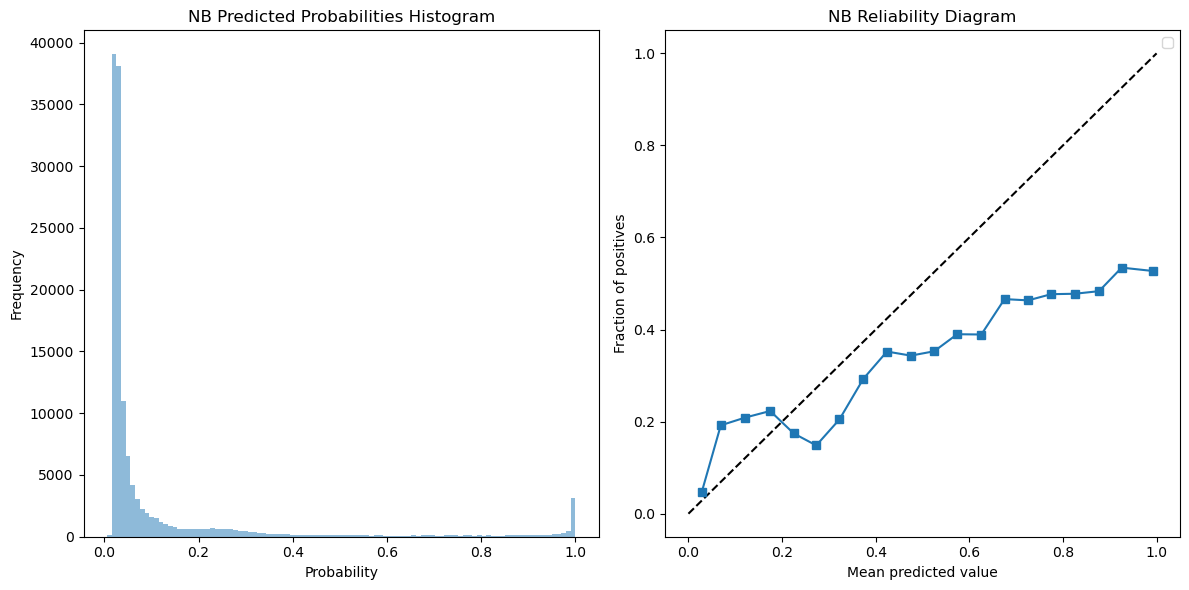

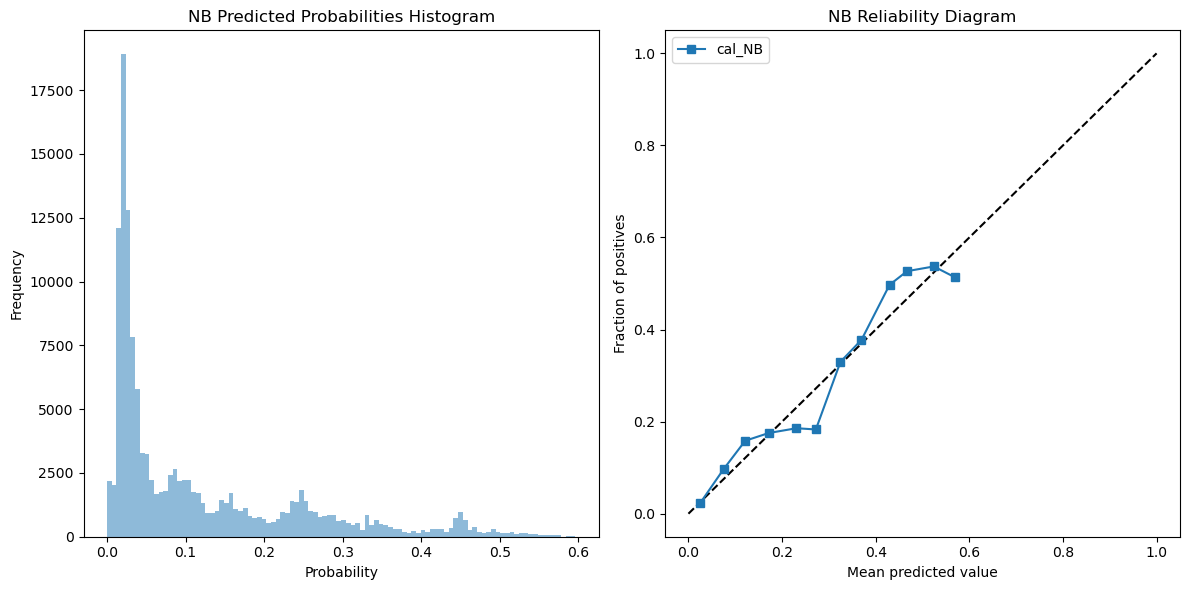

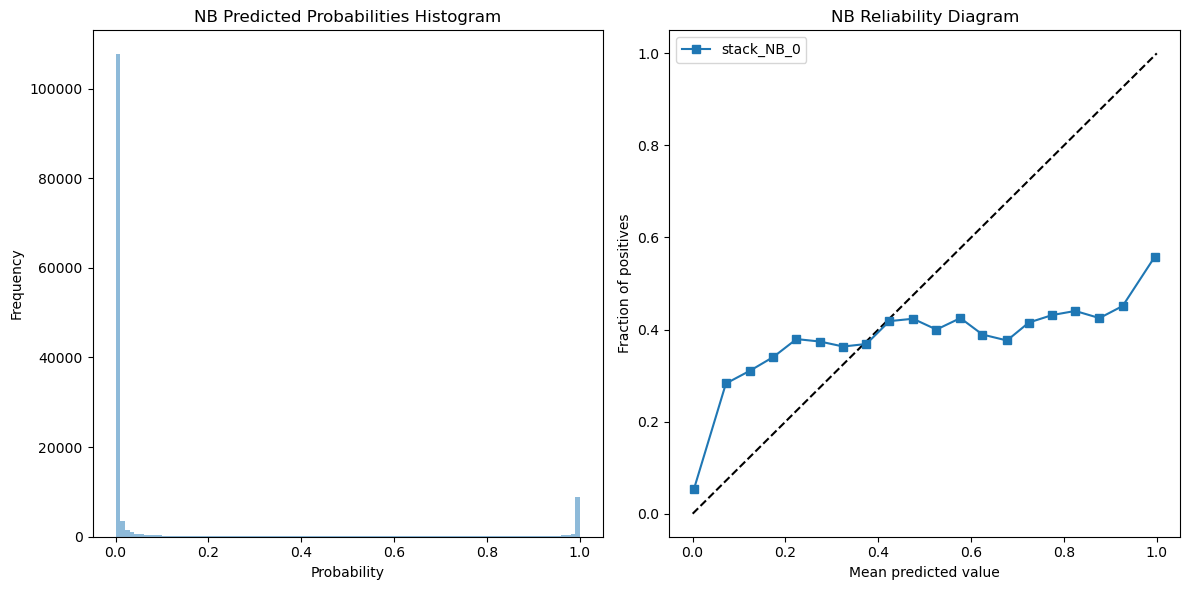

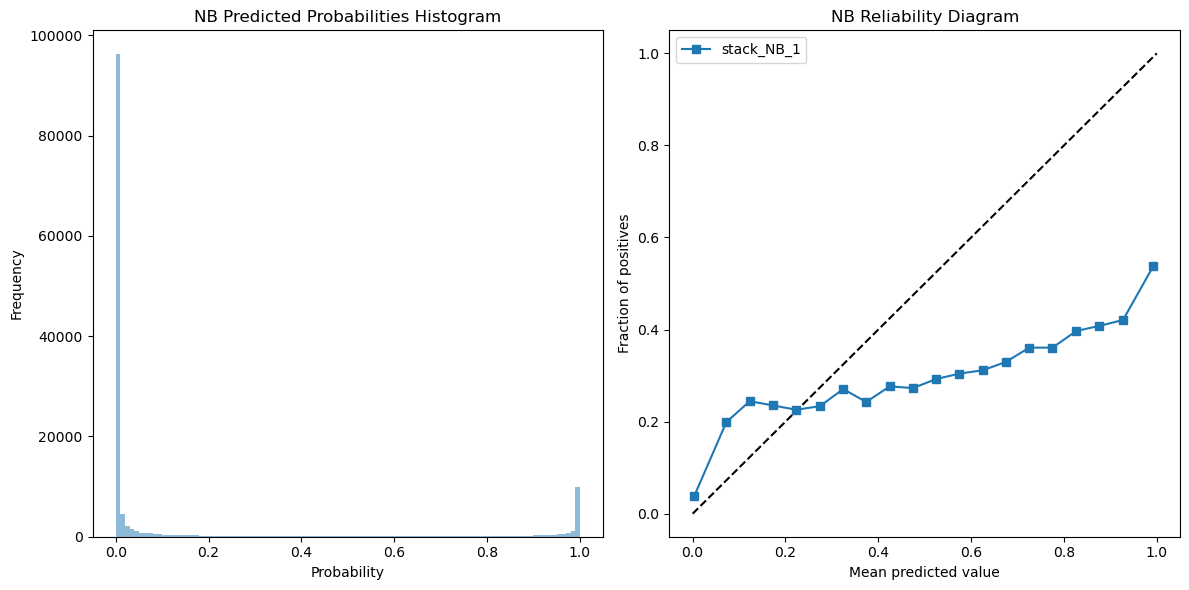

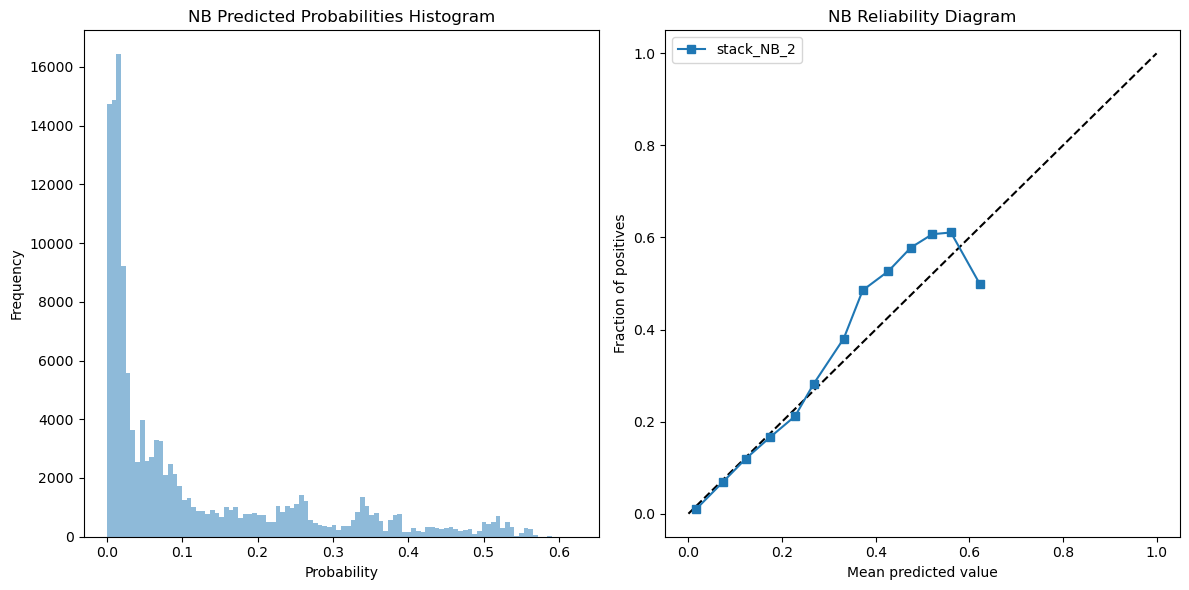

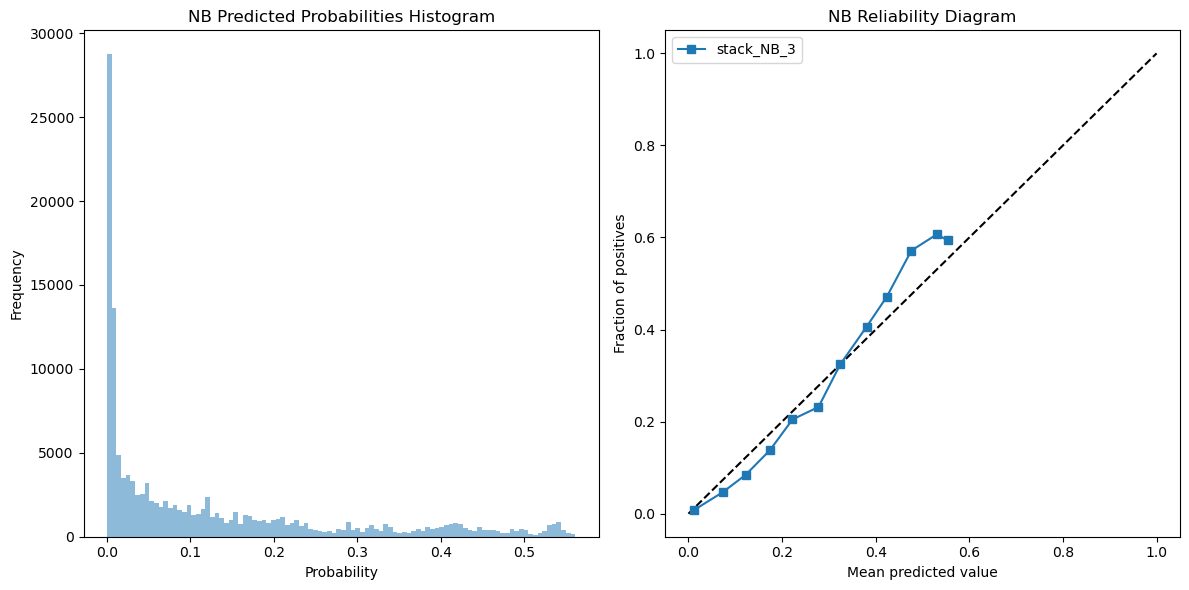

In [25]:
for key in probas_NB_dict.keys():
    all_probas = np.concatenate(probas_NB_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_NB_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=100, alpha=0.5, label=key)
    plt.title('NB Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=20)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('NB Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [13]:
base_QDA2 = QuadraticDiscriminantAnalysis(reg_param=0.0, tol=0.001)
calibrated_final_estimator_QDA2 = CalibratedClassifierCV(base_QDA2, method='isotonic', cv=rskf, n_jobs=-1)

base_LDA2 = LinearDiscriminantAnalysis(priors=None, shrinkage='auto', solver='lsqr')
calibrated_final_estimator_LDA2 = CalibratedClassifierCV(base_LDA2, method='isotonic', cv=rskf, n_jobs=-1)

base_LR2 = LogisticRegression(max_iter=10000, C=0.1, penalty= 'l1' , solver='saga', n_jobs=-1)
calibrated_final_estimator_LR2 = CalibratedClassifierCV(base_LR2, method='isotonic', cv=rskf, n_jobs=-1)

base_DT2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=15, min_samples_split=10, splitter='best')
calibrated_final_estimator_DT2 = CalibratedClassifierCV(base_DT2, method='isotonic', cv=rskf, n_jobs=-1)

base_RF2 = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=30, n_jobs=-1)
calibrated_final_estimator_RF2 = CalibratedClassifierCV(base_RF2, method='isotonic', cv=rskf, n_jobs=-1)

base_KNN2 = KNeighborsClassifier(algorithm='auto', n_neighbors=600, metric= 'manhattan', weights='uniform', n_jobs=-1)
calibrated_final_estimator_KNN2 = CalibratedClassifierCV(base_KNN2, method='isotonic', cv=rskf, n_jobs=-1)

base_NB2 = GaussianNB(var_smoothing=1e-05)
calibrated_final_estimator_NB2 = CalibratedClassifierCV(base_NB2, method='isotonic', cv=rskf, n_jobs=-1)


probas_all_dict = {    
    "QDA": [],
    "cal_QDA2": [],
    "LDA": [],
    "cal_LDA2": [],        
    "LR": [],
    "cal_LR2": [],
    "DT": [],
    "cal_DT2": [],    
    "RF": [],
    "cal_RF2": [],
    "KNN": [],
    "cal_KNN2": [],        
    "NB": [],
    "cal_NB2": [],
}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

true_ALL_labels = []
results_ALL = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index].values.astype('float32'), X.iloc[test_index].values.astype('float32')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # Train the QDA
    base_QDA2.fit(X_train, y_train)
    probas_base_QDA_test2 = base_QDA2.predict_proba(X_test)
    probas_all_dict["QDA"].append(probas_base_QDA_test2)  # Store the predicted probabilities

    # Train the cal_QDA
    calibrated_final_estimator_QDA2.fit(X_train, y_train)
    probas_cal_QDA_test2 = calibrated_final_estimator_QDA2.predict_proba(X_test)
    probas_all_dict["cal_QDA2"].append(probas_cal_QDA_test2)  # Store the predicted probabilities 
    
    
    # Train the LDA
    base_LDA2.fit(X_train, y_train)
    probas_base_LDA_test2 = base_LDA2.predict_proba(X_test)
    probas_all_dict["LDA"].append(probas_base_LDA_test2)  # Store the predicted probabilities

    # Train the cal_LDA
    calibrated_final_estimator_LDA2.fit(X_train, y_train)
    probas_cal_LDA_test2 = calibrated_final_estimator_LDA2.predict_proba(X_test)
    probas_all_dict["cal_LDA2"].append(probas_cal_LDA_test2)  # Store the predicted probabilities 
    

    # Train the LR
    base_LR2.fit(X_train, y_train)
    probas_base_LR_test2 = base_LR2.predict_proba(X_test)
    probas_all_dict["LR"].append(probas_base_LR_test2)  # Store the predicted probabilities

    # Train the cal_LR
    calibrated_final_estimator_LR2.fit(X_train, y_train)
    probas_cal_LR_test2 = calibrated_final_estimator_LR2.predict_proba(X_test)
    probas_all_dict["cal_LR2"].append(probas_cal_LR_test2)  # Store the predicted probabilities 


    # Train the DT
    base_DT2.fit(X_train, y_train)
    probas_base_DT_test2 = base_DT2.predict_proba(X_test)
    probas_all_dict["DT"].append(probas_base_DT_test2)  # Store the predicted probabilities

    # Train the cal_DT
    calibrated_final_estimator_DT2.fit(X_train, y_train)
    probas_cal_DT_test2 = calibrated_final_estimator_DT2.predict_proba(X_test)
    probas_all_dict["cal_DT2"].append(probas_cal_DT_test2)  # Store the predicted probabilities 


   # Train the RF
    base_RF2.fit(X_train, y_train)
    probas_base_RF_test2 = base_RF2.predict_proba(X_test)
    probas_all_dict["RF"].append(probas_base_RF_test2)  # Store the predicted probabilities

    # Train the cal_RF
    calibrated_final_estimator_RF2.fit(X_train, y_train)
    probas_cal_RF_test2 = calibrated_final_estimator_RF2.predict_proba(X_test)
    probas_all_dict["cal_RF2"].append(probas_cal_RF_test2)  # Store the predicted probabilities     
    
   # Train the KNN
    base_KNN2.fit(X_train, y_train)
    probas_base_KNN_test2 = base_KNN2.predict_proba(X_test)
    probas_all_dict["KNN"].append(probas_base_KNN_test2)  # Store the predicted probabilities

    # Train the cal_KNN
    calibrated_final_estimator_KNN2.fit(X_train, y_train)
    probas_cal_KNN_test2 = calibrated_final_estimator_KNN2.predict_proba(X_test)
    probas_all_dict["cal_KNN2"].append(probas_cal_KNN_test2)  # Store the predicted probabilities 
    
    
    # Train the NB
    base_NB2.fit(X_train, y_train)
    probas_base_NB_test2 = base_NB2.predict_proba(X_test)
    probas_all_dict["NB"].append(probas_base_NB_test2)  # Store the predicted probabilities

    # Train the cal_NB
    calibrated_final_estimator_NB2.fit(X_train, y_train)
    probas_cal_NB_test2 = calibrated_final_estimator_NB2.predict_proba(X_test)
    probas_all_dict["cal_NB2"].append(probas_cal_NB_test2)  # Store the predicted probabilities 
#-------------------------------------------------------------
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_ALL_labels.extend(y_test.tolist())

    
    # Calculate evaluation metrics for QDA
    acc_cal_QDA2 = accuracy_score(y_test, np.argmax(probas_base_QDA_test2, axis=1))
    brier_cal_QDA2 = brier_score(y_true_indicator, probas_base_QDA_test2)
    ece_cal_QDA2 = ECE(y_true=y_true_indicator, probs=probas_base_QDA_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_QDA2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_QDA_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_QDA2 = cross_entropy(y_true_indicator, probas_base_QDA_test2)
    roc_auc_cal_QDA2 = roc_auc_score(y_test, probas_base_QDA_test2[:, 1])    

    # Calculate evaluation metrics for cal_QDA
    
    acc_cal_cal_QDA2 = accuracy_score(y_test, np.argmax(probas_cal_QDA_test2, axis=1))
    brier_cal_cal_QDA2 = brier_score(y_true_indicator, probas_cal_QDA_test2)
    ece_cal_cal_QDA2 = ECE(y_true=y_true_indicator, probs=probas_cal_QDA_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_QDA2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_QDA_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_QDA2 = cross_entropy(y_true_indicator, probas_cal_QDA_test2)
    roc_auc_cal_cal_QDA2 = roc_auc_score(y_test, probas_cal_QDA_test2[:, 1])     
    
    # Calculate evaluation metrics for LDA
    acc_cal_LDA2 = accuracy_score(y_test, np.argmax(probas_base_LDA_test2, axis=1))
    brier_cal_LDA2 = brier_score(y_true_indicator, probas_base_LDA_test2)
    ece_cal_LDA2 = ECE(y_true=y_true_indicator, probs=probas_base_LDA_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_LDA2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_LDA_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_LDA2 = cross_entropy(y_true_indicator, probas_base_LDA_test2)
    roc_auc_cal_LDA2 = roc_auc_score(y_test, probas_base_LDA_test2[:, 1])    

    # Calculate evaluation metrics for cal_LDA
    
    acc_cal_cal_LDA2 = accuracy_score(y_test, np.argmax(probas_cal_LDA_test2, axis=1))
    brier_cal_cal_LDA2 = brier_score(y_true_indicator, probas_cal_LDA_test2)
    ece_cal_cal_LDA2 = ECE(y_true=y_true_indicator, probs=probas_cal_LDA_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_LDA2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_LDA_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_LDA2 = cross_entropy(y_true_indicator, probas_cal_LDA_test2)
    roc_auc_cal_cal_LDA2 = roc_auc_score(y_test, probas_cal_LDA_test2[:, 1])     
        
    
    # Calculate evaluation metrics for LR
    acc_cal_LR2 = accuracy_score(y_test, np.argmax(probas_base_LR_test2, axis=1))
    brier_cal_LR2 = brier_score(y_true_indicator, probas_base_LR_test2)
    ece_cal_LR2 = ECE(y_true=y_true_indicator, probs=probas_base_LR_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_LR2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_LR_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_LR2 = cross_entropy(y_true_indicator, probas_base_LR_test2)
    roc_auc_cal_LR2 = roc_auc_score(y_test, probas_base_LR_test2[:, 1])    

    # Calculate evaluation metrics for cal_LR
    
    acc_cal_cal_LR2 = accuracy_score(y_test, np.argmax(probas_cal_LR_test2, axis=1))
    brier_cal_cal_LR2 = brier_score(y_true_indicator, probas_cal_LR_test2)
    ece_cal_cal_LR2 = ECE(y_true=y_true_indicator, probs=probas_cal_LR_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_LR2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_LR_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_LR2 = cross_entropy(y_true_indicator, probas_cal_LR_test2)
    roc_auc_cal_cal_LR2 = roc_auc_score(y_test, probas_cal_LR_test2[:, 1])     
    
    # Calculate evaluation metrics for DT
    acc_cal_DT2 = accuracy_score(y_test, np.argmax(probas_base_DT_test2, axis=1))
    brier_cal_DT2 = brier_score(y_true_indicator, probas_base_DT_test2)
    ece_cal_DT2 = ECE(y_true=y_true_indicator, probs=probas_base_DT_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_DT2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_DT_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_DT2 = cross_entropy(y_true_indicator, probas_base_DT_test2)
    roc_auc_cal_DT2 = roc_auc_score(y_test, probas_base_DT_test2[:, 1])    

    # Calculate evaluation metrics for cal_DT
    
    acc_cal_cal_DT2 = accuracy_score(y_test, np.argmax(probas_cal_DT_test2, axis=1))
    brier_cal_cal_DT2 = brier_score(y_true_indicator, probas_cal_DT_test2)
    ece_cal_cal_DT2 = ECE(y_true=y_true_indicator, probs=probas_cal_DT_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_DT2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_DT_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_DT2 = cross_entropy(y_true_indicator, probas_cal_DT_test2)
    roc_auc_cal_cal_DT2 = roc_auc_score(y_test, probas_cal_DT_test2[:, 1])        
    
    # Calculate evaluation metrics for RF
    acc_cal_RF2 = accuracy_score(y_test, np.argmax(probas_base_RF_test2, axis=1))
    brier_cal_RF2 = brier_score(y_true_indicator, probas_base_RF_test2)
    ece_cal_RF2 = ECE(y_true=y_true_indicator, probs=probas_base_RF_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_RF2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_RF_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_RF2 = cross_entropy(y_true_indicator, probas_base_RF_test2)
    roc_auc_cal_RF2 = roc_auc_score(y_test, probas_base_RF_test2[:, 1])    

    # Calculate evaluation metrics for cal_RF
    
    acc_cal_cal_RF2 = accuracy_score(y_test, np.argmax(probas_cal_RF_test2, axis=1))
    brier_cal_cal_RF2 = brier_score(y_true_indicator, probas_cal_RF_test2)
    ece_cal_cal_RF2 = ECE(y_true=y_true_indicator, probs=probas_cal_RF_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_RF2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_RF_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_RF2 = cross_entropy(y_true_indicator, probas_cal_RF_test2)
    roc_auc_cal_cal_RF2 = roc_auc_score(y_test, probas_cal_RF_test2[:, 1])       
    
    # Calculate evaluation metrics for KNN
    acc_cal_KNN2 = accuracy_score(y_test, np.argmax(probas_base_KNN_test2, axis=1))
    brier_cal_KNN2 = brier_score(y_true_indicator, probas_base_KNN_test2)
    ece_cal_KNN2 = ECE(y_true=y_true_indicator, probs=probas_base_KNN_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_KNN2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_KNN_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_KNN2 = cross_entropy(y_true_indicator, probas_base_KNN_test2)
    roc_auc_cal_KNN2 = roc_auc_score(y_test, probas_base_KNN_test2[:, 1])    

    # Calculate evaluation metrics for cal_KNN
    
    acc_cal_cal_KNN2 = accuracy_score(y_test, np.argmax(probas_cal_KNN_test2, axis=1))
    brier_cal_cal_KNN2 = brier_score(y_true_indicator, probas_cal_KNN_test2)
    ece_cal_cal_KNN2 = ECE(y_true=y_true_indicator, probs=probas_cal_KNN_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_KNN2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_KNN_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_KNN2 = cross_entropy(y_true_indicator, probas_cal_KNN_test2)
    roc_auc_cal_cal_KNN2 = roc_auc_score(y_test, probas_cal_KNN_test2[:, 1])    
   
    
    # Calculate evaluation metrics for NB
    acc_cal_NB2 = accuracy_score(y_test, np.argmax(probas_base_NB_test2, axis=1))
    brier_cal_NB2 = brier_score(y_true_indicator, probas_base_NB_test2)
    ece_cal_NB2 = ECE(y_true=y_true_indicator, probs=probas_base_NB_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB2 = MCE(y_true=y_test.values.tolist(), probs=probas_base_NB_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB2 = cross_entropy(y_true_indicator, probas_base_NB_test2)
    roc_auc_cal_NB2 = roc_auc_score(y_test, probas_base_NB_test2[:, 1])    

    # Calculate evaluation metrics for cal_NB
    
    acc_cal_cal_NB2 = accuracy_score(y_test, np.argmax(probas_cal_NB_test2, axis=1))
    brier_cal_cal_NB2 = brier_score(y_true_indicator, probas_cal_NB_test2)
    ece_cal_cal_NB2 = ECE(y_true=y_true_indicator, probs=probas_cal_NB_test2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_NB2 = MCE(y_true=y_test.values.tolist(), probs=probas_cal_NB_test2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_NB2 = cross_entropy(y_true_indicator, probas_cal_NB_test2)
    roc_auc_cal_cal_NB2 = roc_auc_score(y_test, probas_cal_NB_test2[:, 1])    
#-----------------------------
    results_ALL.append({

        'Brier Score (base_QDA)': brier_cal_QDA2,
        'ECE (base_QDA)': ece_cal_QDA2,
        'MCE (base_QDA)': mce_cal_QDA2,
        'Cross-Entropy (base_QDA)': ce_cal_QDA2,
        'Accuracy (base_QDA)': acc_cal_QDA2,
        'ROC AUC (base_QDA)': roc_auc_cal_QDA2,

        'Brier Score (cal_QDA)': brier_cal_cal_QDA2,
        'ECE (cal_QDA)': ece_cal_cal_QDA2,
        'MCE (cal_QDA)': mce_cal_cal_QDA2,
        'Cross-Entropy (cal_QDA)': ce_cal_cal_QDA2,
        'Accuracy (cal_QDA)': acc_cal_cal_QDA2,
        'ROC AUC (cal_QDA)': roc_auc_cal_cal_QDA2,                   
        
        'Brier Score (base_LDA)': brier_cal_LDA2,
        'ECE (base_LDA)': ece_cal_LDA2,
        'MCE (base_LDA)': mce_cal_LDA2,
        'Cross-Entropy (base_LDA)': ce_cal_LDA2,
        'Accuracy (base_LDA)': acc_cal_LDA2,
        'ROC AUC (base_LDA)': roc_auc_cal_LDA2,

        'Brier Score (cal_LDA)': brier_cal_cal_LDA2,
        'ECE (cal_LDA)': ece_cal_cal_LDA2,
        'MCE (cal_LDA)': mce_cal_cal_LDA2,
        'Cross-Entropy (cal_LDA)': ce_cal_cal_LDA2,
        'Accuracy (cal_LDA)': acc_cal_cal_LDA2,
        'ROC AUC (cal_LDA)': roc_auc_cal_cal_LDA2,                
                
        
        'Brier Score (base_LR)': brier_cal_LR2,
        'ECE (base_LR)': ece_cal_LR2,
        'MCE (base_LR)': mce_cal_LR2,
        'Cross-Entropy (base_LR)': ce_cal_LR2,
        'Accuracy (base_LR)': acc_cal_LR2,
        'ROC AUC (base_LR)': roc_auc_cal_LR2,

        'Brier Score (cal_LR)': brier_cal_cal_LR2,
        'ECE (cal_LR)': ece_cal_cal_LR2,
        'MCE (cal_LR)': mce_cal_cal_LR2,
        'Cross-Entropy (cal_LR)': ce_cal_cal_LR2,
        'Accuracy (cal_LR)': acc_cal_cal_LR2,
        'ROC AUC (cal_LR)': roc_auc_cal_cal_LR2,                
        
        'Brier Score (base_DT)': brier_cal_DT2,
        'ECE (base_DT)': ece_cal_DT2,
        'MCE (base_DT)': mce_cal_DT2,
        'Cross-Entropy (base_DT)': ce_cal_DT2,
        'Accuracy (base_DT)': acc_cal_DT2,
        'ROC AUC (base_DT)': roc_auc_cal_DT2,

        'Brier Score (cal_DT)': brier_cal_cal_DT2,
        'ECE (cal_DT)': ece_cal_cal_DT2,
        'MCE (cal_DT)': mce_cal_cal_DT2,
        'Cross-Entropy (cal_DT)': ce_cal_cal_DT2,
        'Accuracy (cal_DT)': acc_cal_cal_DT2,
        'ROC AUC (cal_DT)': roc_auc_cal_cal_DT2,        
        
        'Brier Score (base_RF)': brier_cal_RF2,
        'ECE (base_RF)': ece_cal_RF2,
        'MCE (base_RF)': mce_cal_RF2,
        'Cross-Entropy (base_RF)': ce_cal_RF2,
        'Accuracy (base_RF)': acc_cal_RF2,
        'ROC AUC (base_RF)': roc_auc_cal_RF2,

        'Brier Score (cal_RF)': brier_cal_cal_RF2,
        'ECE (cal_RF)': ece_cal_cal_RF2,
        'MCE (cal_RF)': mce_cal_cal_RF2,
        'Cross-Entropy (cal_RF)': ce_cal_cal_RF2,
        'Accuracy (cal_RF)': acc_cal_cal_RF2,
        'ROC AUC (cal_RF)': roc_auc_cal_cal_RF2,        
        
        'Brier Score (base_KNN)': brier_cal_KNN2,
        'ECE (base_KNN)': ece_cal_KNN2,
        'MCE (base_KNN)': mce_cal_KNN2,
        'Cross-Entropy (base_KNN)': ce_cal_KNN2,
        'Accuracy (base_KNN)': acc_cal_KNN2,
        'ROC AUC (base_KNN)': roc_auc_cal_KNN2,

        'Brier Score (cal_KNN)': brier_cal_cal_KNN2,
        'ECE (cal_KNN)': ece_cal_cal_KNN2,
        'MCE (cal_KNN)': mce_cal_cal_KNN2,
        'Cross-Entropy (cal_KNN)': ce_cal_cal_KNN2,
        'Accuracy (cal_KNN)': acc_cal_cal_KNN2,
        'ROC AUC (cal_KNN)': roc_auc_cal_cal_KNN2,
        
        
        'Brier Score (base_NB)': brier_cal_NB2,
        'ECE (base_NB)': ece_cal_NB2,
        'MCE (base_NB)': mce_cal_NB2,
        'Cross-Entropy (base_NB)': ce_cal_NB2,
        'Accuracy (base_NB)': acc_cal_NB2,
        'ROC AUC (base_NB)': roc_auc_cal_NB2,

        'Brier Score (cal_NB)': brier_cal_cal_NB2,
        'ECE (cal_NB)': ece_cal_cal_NB2,
        'MCE (cal_NB)': mce_cal_cal_NB2,
        'Cross-Entropy (cal_NB)': ce_cal_cal_NB2,
        'Accuracy (cal_NB)': acc_cal_cal_NB2,
        'ROC AUC (cal_NB)': roc_auc_cal_cal_NB2,
    })    
#---------------------
# Display results
results_ALL_df = pd.DataFrame(results_ALL)
print("Results for each fold:")
print(results_ALL_df)

# Calculate and display the average
avg_results_ALL = results_ALL_df.mean()
print("\nAverage results:")
print(avg_results_ALL)


Results for each fold:
    Brier Score (base_QDA)  ECE (base_QDA)  MCE (base_QDA)  \
0                 0.121468        0.240177        0.128022   
1                 0.115266        0.233662        0.085922   
2                 0.111055        0.234414        0.069507   
3                 0.114252        0.230242        0.072627   
4                 0.111294        0.232107        0.070870   
5                 0.116658        0.234263        0.076718   
6                 0.118142        0.233850        0.119204   
7                 0.117473        0.239924        0.128259   
8                 0.116302        0.232520        0.068157   
9                 0.106573        0.235116        0.115289   
10                0.110767        0.234387        0.062335   
11                0.111742        0.230864        0.061766   
12                0.121400        0.239327        0.116017   
13                0.115848        0.235285        0.077246   
14                0.115888        0.233837     

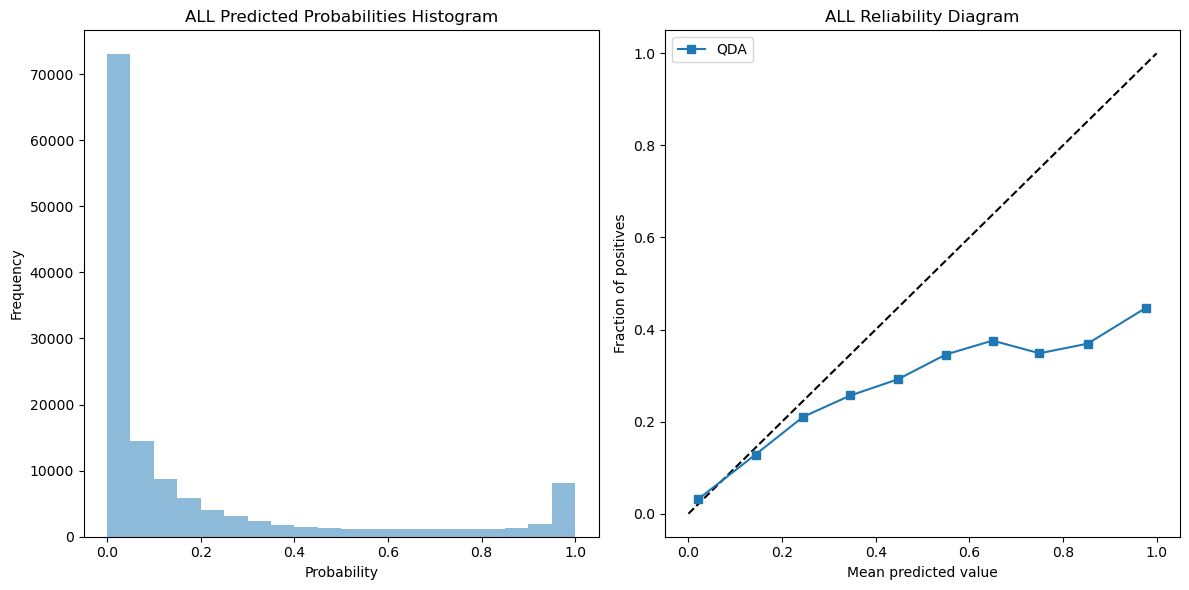

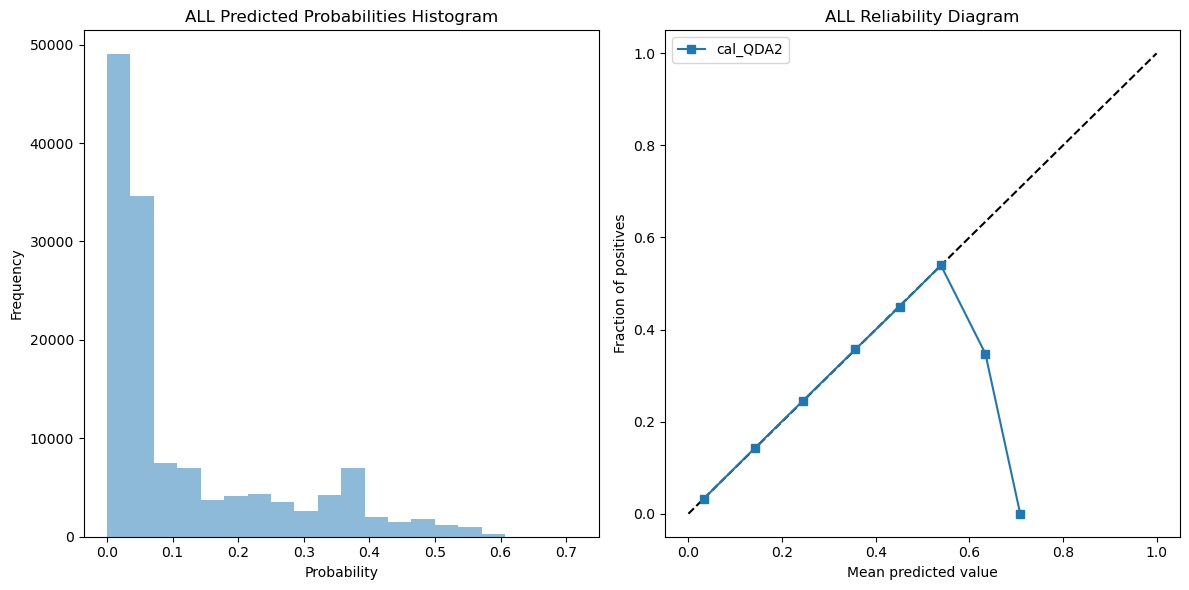

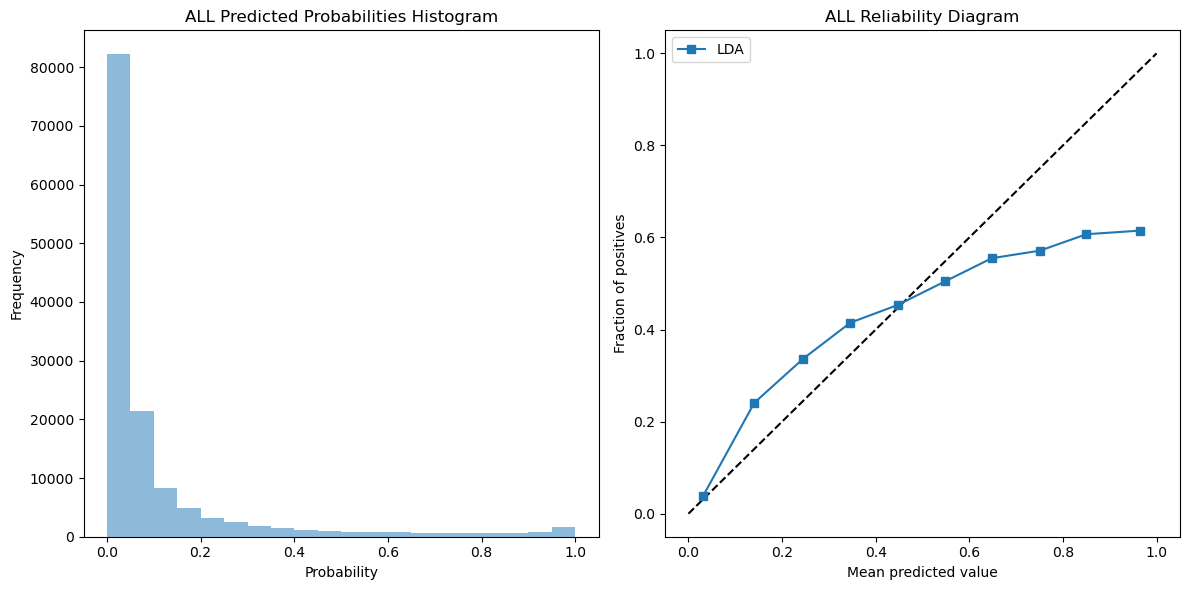

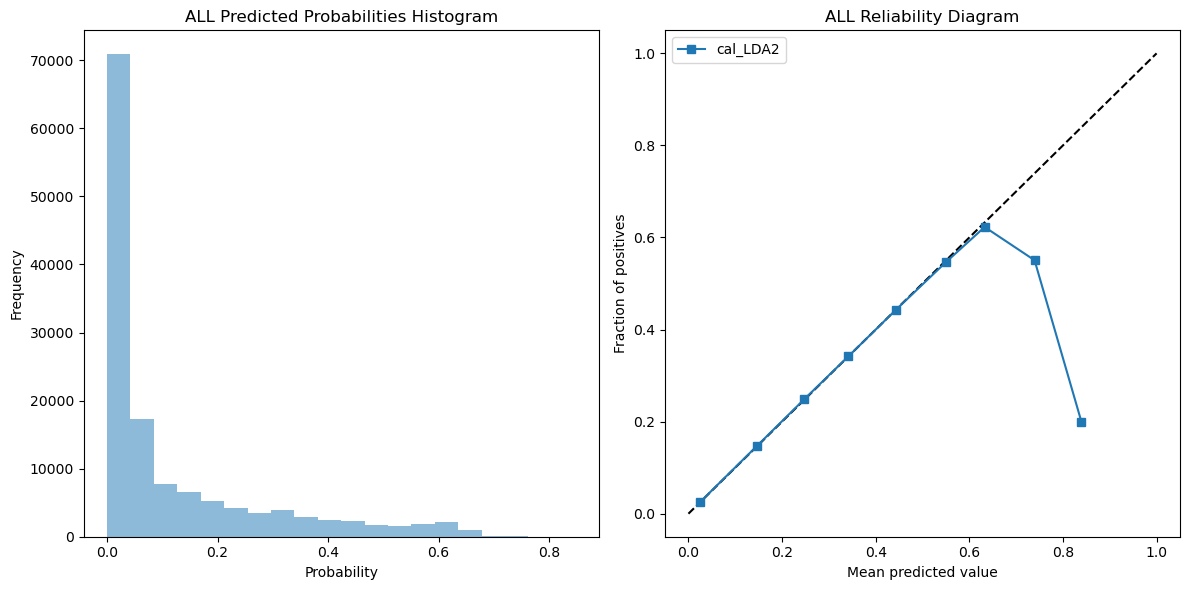

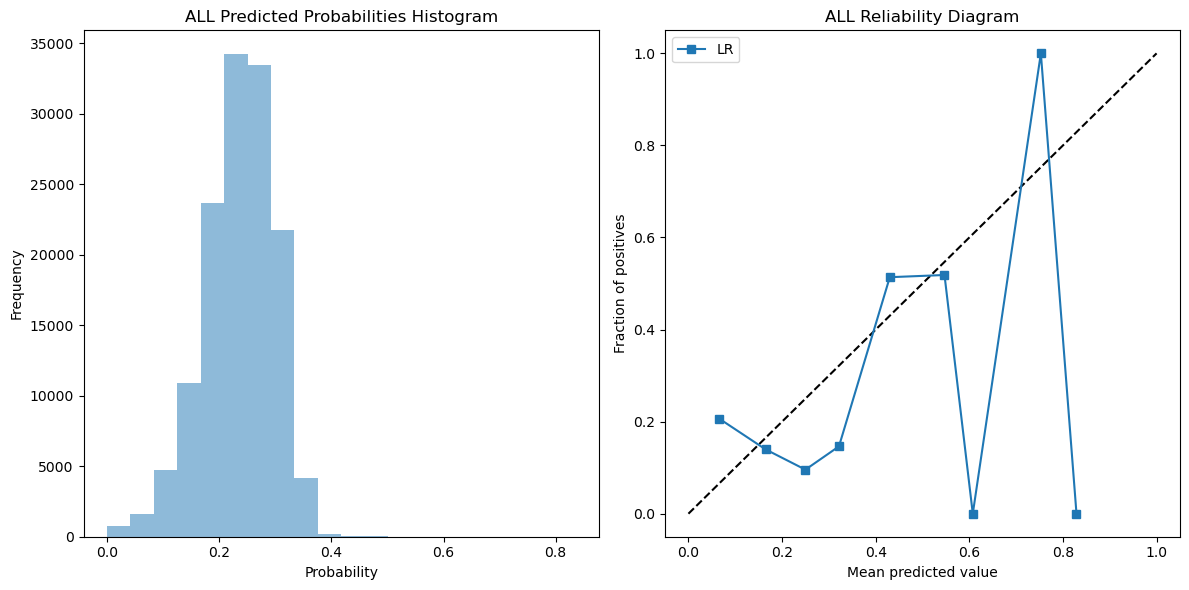

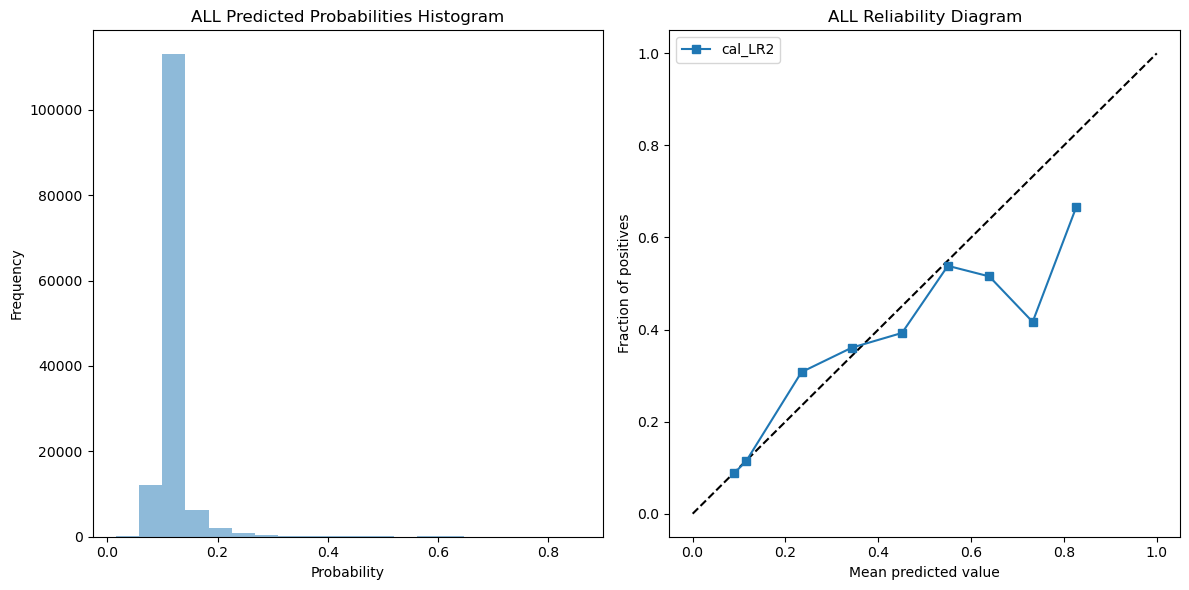

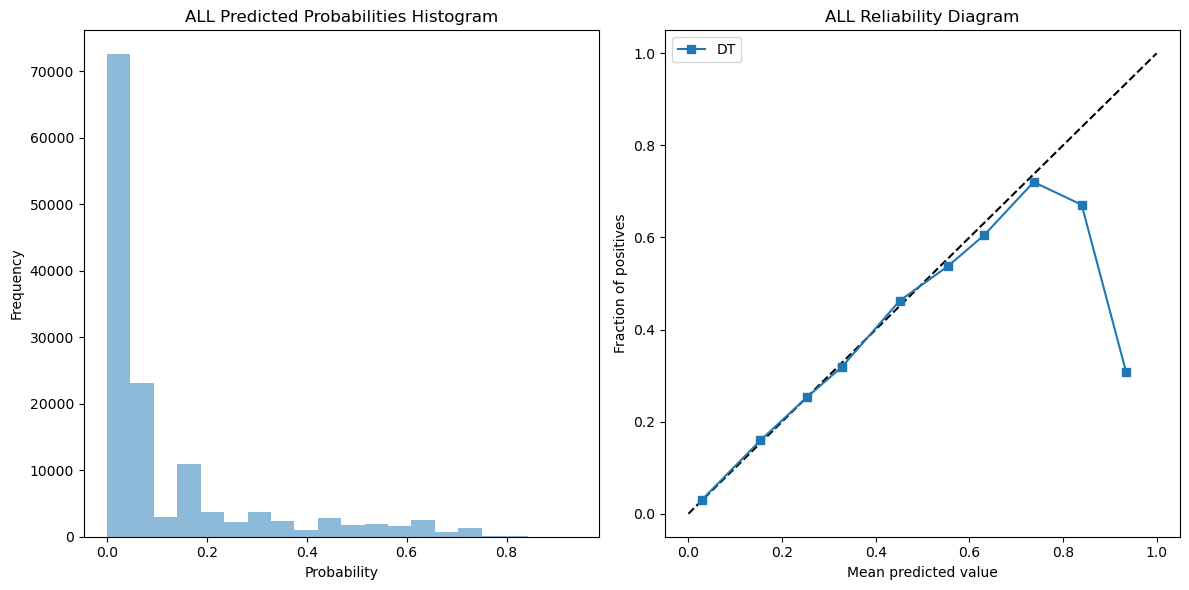

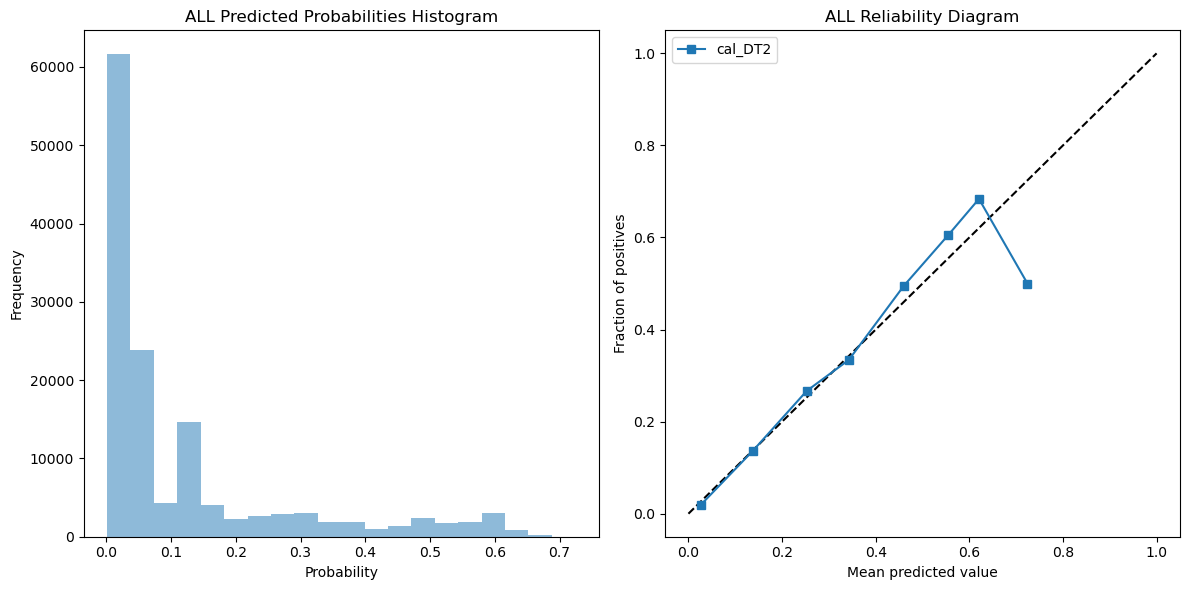

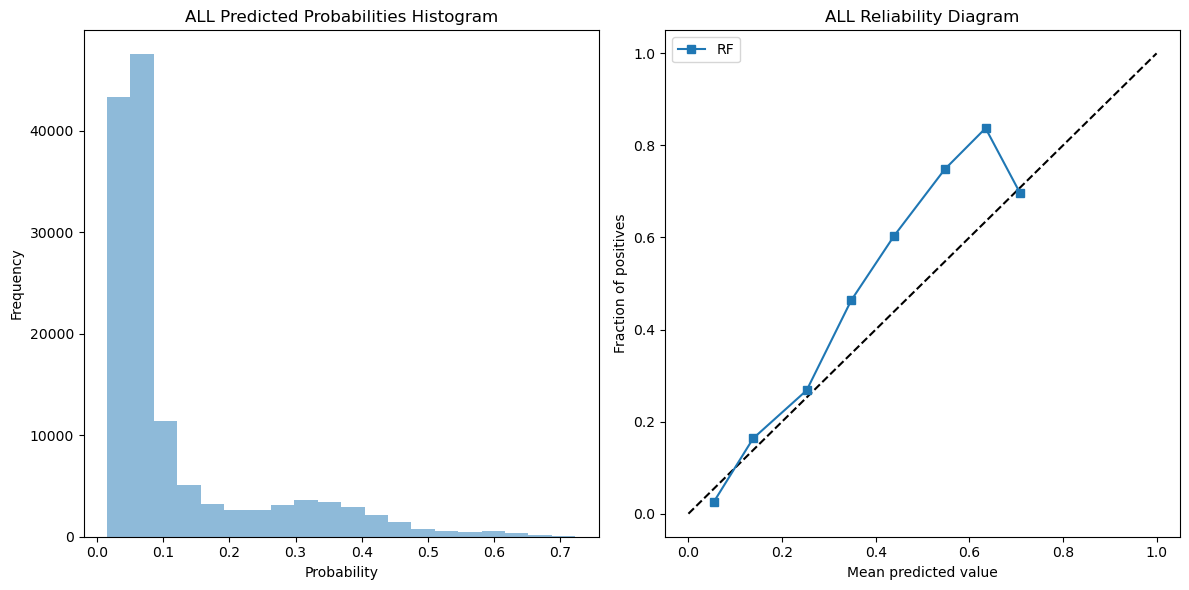

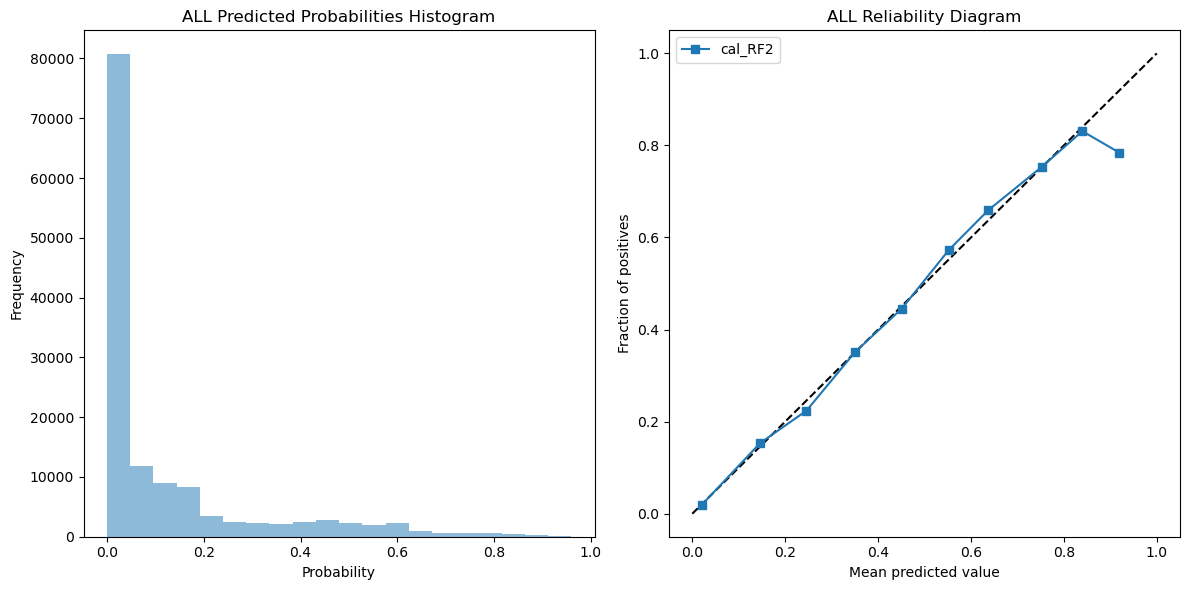

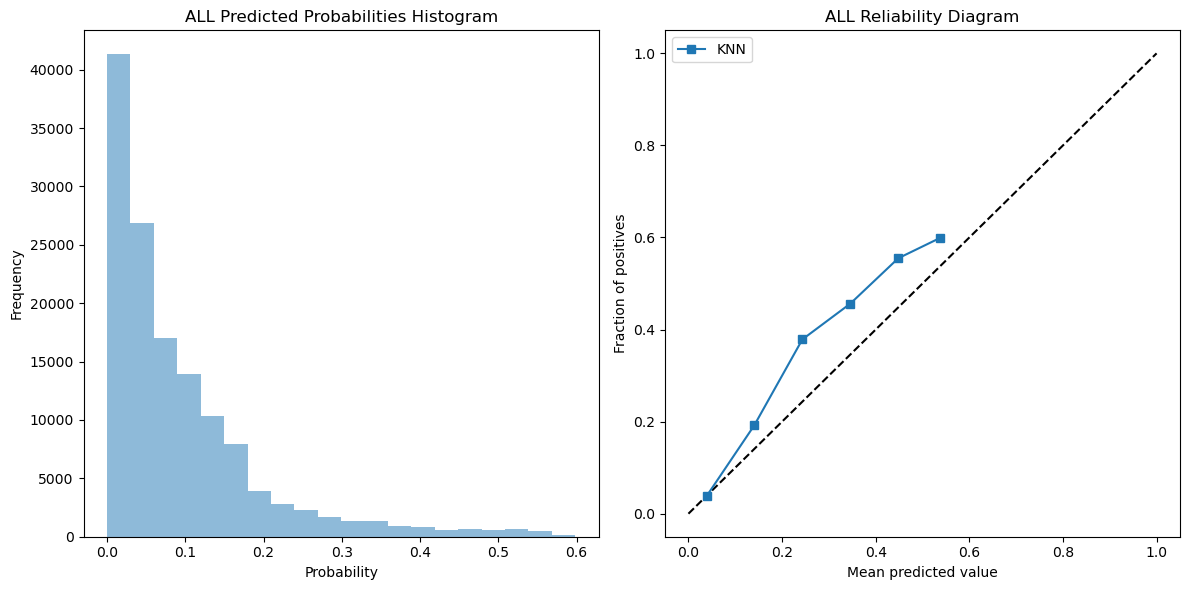

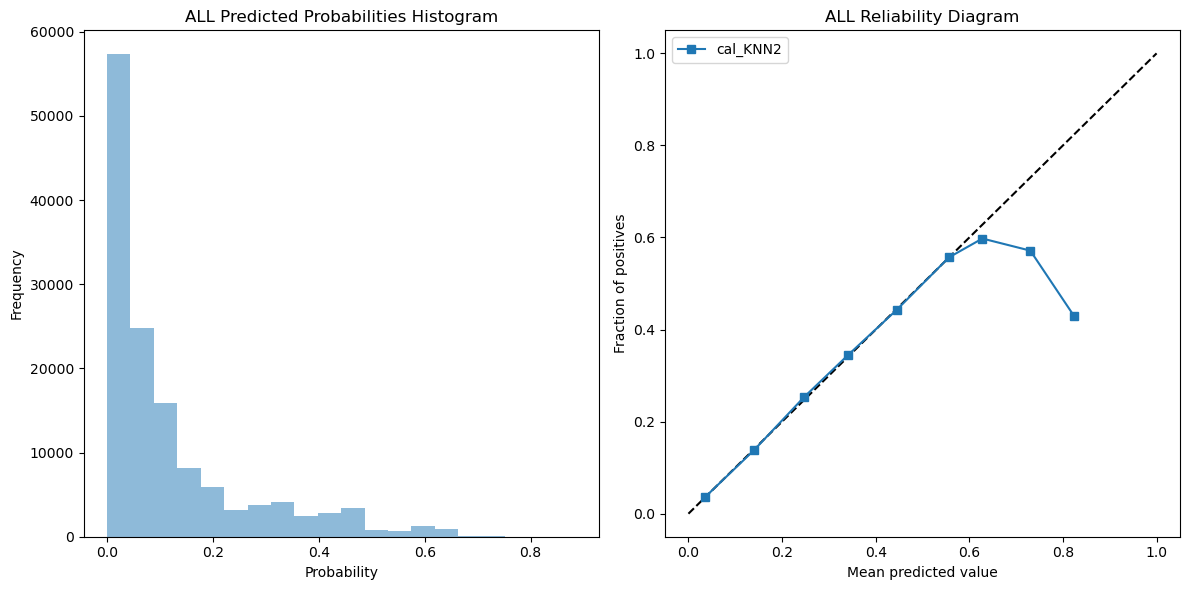

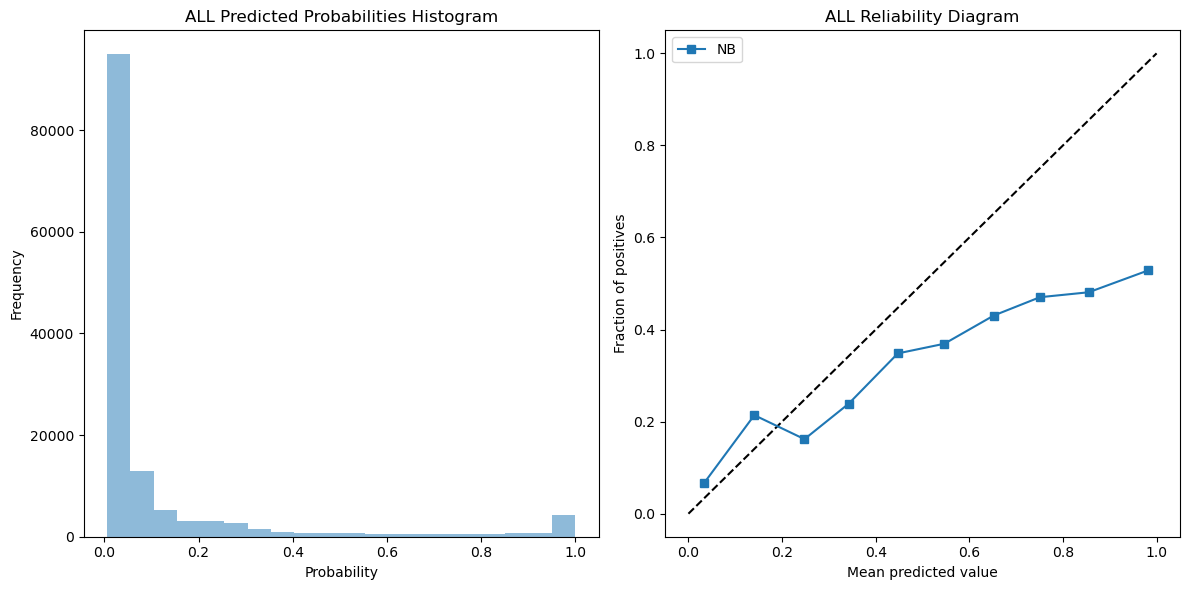

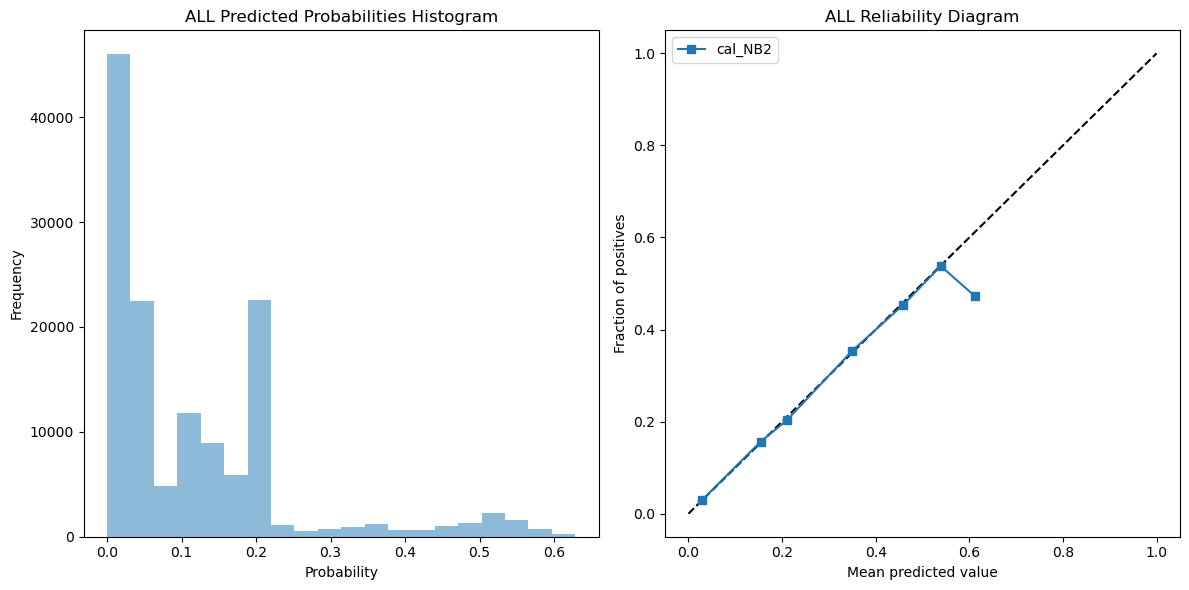

In [14]:
for key in probas_all_dict.keys():
    all_probas = np.concatenate(probas_all_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_ALL_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('ALL Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('ALL Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [15]:
import matplotlib.pyplot as plt

In [16]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
print(avg_results_ALL)

Brier Score (base_QDA)      0.114942
ECE (base_QDA)              0.234665
MCE (base_QDA)              0.090648
Cross-Entropy (base_QDA)    0.598888
Accuracy (base_QDA)         0.855625
                              ...   
ECE (cal_NB)                0.222053
MCE (cal_NB)                0.065070
Cross-Entropy (cal_NB)      0.291149
Accuracy (cal_NB)           0.885677
ROC AUC (cal_NB)            0.807340
Length: 84, dtype: float64


Brier Score (base_QDA)      0.114942
ECE (base_QDA)              0.234665
MCE (base_QDA)              0.090648
Cross-Entropy (base_QDA)    0.598888
Accuracy (base_QDA)         0.855625
                              ...   
ECE (cal_NB)                0.222053
MCE (cal_NB)                0.065070
Cross-Entropy (cal_NB)      0.291149
Accuracy (cal_NB)           0.885677
ROC AUC (cal_NB)            0.807340
Length: 84, dtype: float64
